EDA(Exploratory Data Analsys) 탐색적 데이터 분석 

* 실제로 어떤 종류의 데이터를 갖고 있으며 다른 유형을 어떻게 다뤄야 하는가?
* 변수의 분포는 무엇인가?
    * 데이터에 특이값이 있는가? 어떻게 처리할 수 있는가?
    * 변환이 필요한가? 예를 들어, 일부 모델은 정규 분포 변수와 더 잘 작동하거나 로그 변환과 같은 기술을 사용할 수 있다.
    * 분포는 그룹마다 다른가?(예: 성별 또는 교육 수준)
* 데이터가 누락된 경우가 있는가? 얼마나 빈번하고 어떤 변수에 있는가?
* 일부 변수 간에 선형(상관) 관계가 있는가?
* 기존 변수 집합을 사용해 새 특징을 생성할 수 있는가? 타임 스탬프에서 시간/분, 날짜에서 요일 등을 예로 들수 있다
* 분석과 관련이 없기 때문에 제거할 수 있는 변수가 있는가? 무작위로 생성된 고객 식별자를 예로 들 수 있다. 


In [93]:
df = pd.read_csv("train.csv")


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('ggplot') # 스타일 
plt.style.use('ggplot') # 스타일 
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.family'] = 'NanumGothic'


In [94]:
df.shape

(1056, 46)

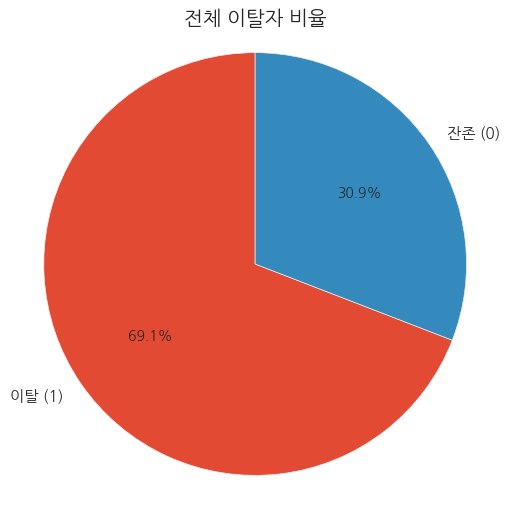

In [95]:
# 이탈자 비율 시각화 (기본)
withdrawal_counts = df['withdrawal'].value_counts()
withdrawal_labels = ['이탈 (1)', '잔존 (0)']

plt.figure(figsize=(6, 6))
plt.pie(withdrawal_counts, labels=withdrawal_labels, autopct='%1.1f%%', startangle=90)
plt.title("전체 이탈자 비율")
plt.axis('equal')
plt.show()

In [97]:
df.desired_career_path.value_counts()

desired_career_path
취업                             754
대학원 진학                         248
미정                              11
창업                               9
대학원 혹은 취업                        1
고시준비                             1
편입                               1
스타트업 및 중견                        1
현재 직장인, 추후 대학원 진학 예정             1
아직 정해지지않음                        1
이직                               1
고민 중                             1
대학원 진학 혹은 취업                     1
대학원 진학과 취업 중 어느 것을 선택할지 고민중      1
취업 및 취업 중 특수대학원 계획               1
아직 고민 중..                        1
아직 미정입니다.                        1
대학원 진학과 취업 중 고민                  1
대학원 진학과 취업중에 하나를 고민하고 있습니다.      1
재직중                              1
취업 또는 대학원 진학                     1
-                                1
대학원과 취업중 고민중입니다                  1
싸피                               1
대학원진학과 취업 둘중 고민입니다.              1
아직 미정                            1
아직 확실한 계획이 없습니다.                 1
Name: count, dtype: int64

In [ ]:
df.incumbents_lecture_scale_reason # 강의 요청사항

0                              인원이 너무 많지 않아야 편하게 들을 수 있어서
1                              인원이 적어야 집중할 수 있고 질문 하기 쉽다.
2                너무 소수인원은 조금 부담스럽고 너무 많은 인원은 집중도가 떨어질거같아서
3                        너무 많은 인원이 있을 경우 집중도가 떨어질 거 같습니다.
4                                    많은 현직자분들의 이야기를 듣고싶어서
                              ...                        
1051                            1명의 현직자에게 집중하는 게 좋을 것 같아서
1052                   사람이 너무 많으면 집중할 수 없고, 너무 적으면 부담스러워서
1053      온라인은 사람이 너무 많으면 질문을 많이 할 수 없기에 적절한 규모가 필요하다고 생각
1054    인원이 너무 적으면 예산이 부담될 것 같고 너무 많으면 집중이 안 될 것 같아서 중...
1055    인원이 적어야 집중하기 더 쉽지만, 너무 적은 인원을 수용할 경우 참여할 수 있는 ...
Name: incumbents_lecture_scale_reason, Length: 1056, dtype: object

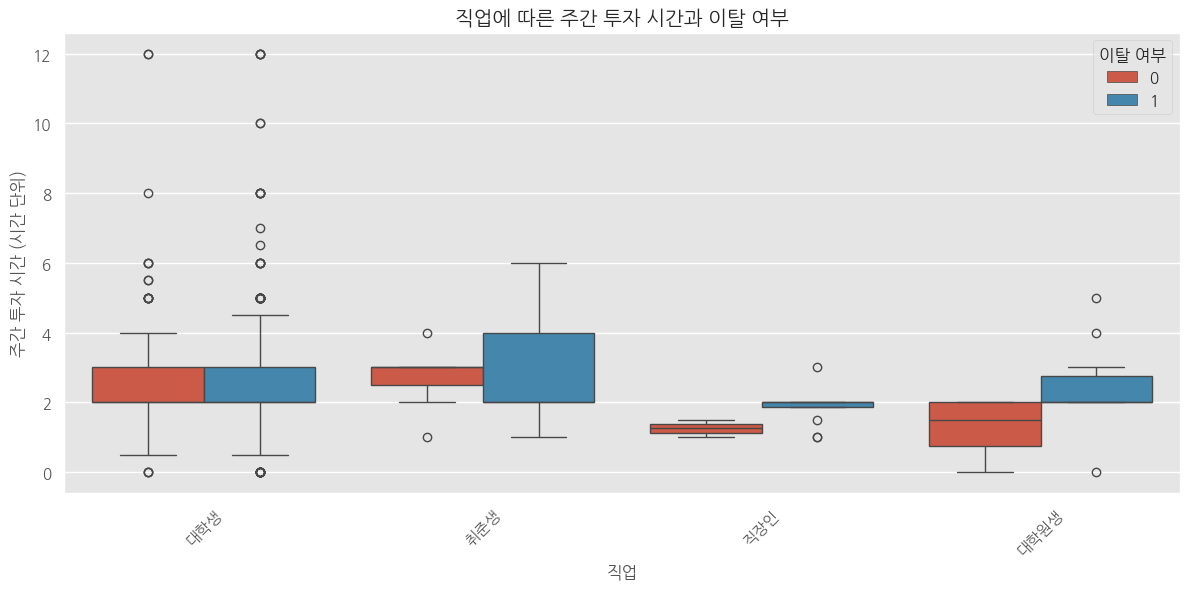

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


# 가설 1: 직업에 따라 투자 시간 (time_input) 분포가 다를 것이다.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job', y='time_input', hue='withdrawal')
plt.title("직업에 따른 주간 투자 시간과 이탈 여부")
plt.xlabel("직업")
plt.ylabel("주간 투자 시간 (시간 단위)")
plt.xticks(rotation=45)
plt.legend(title='이탈 여부')
plt.tight_layout()
plt.show()

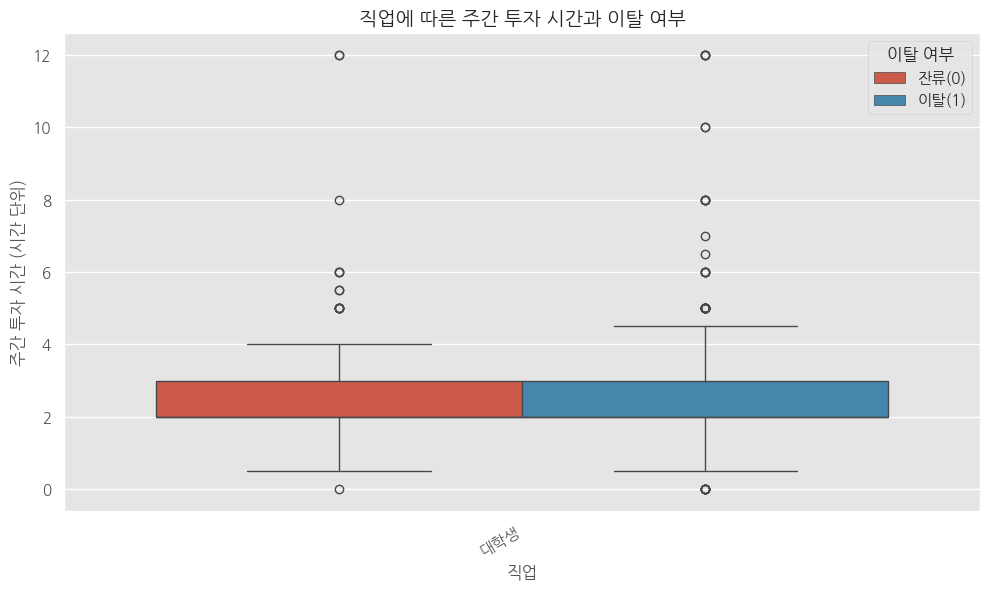

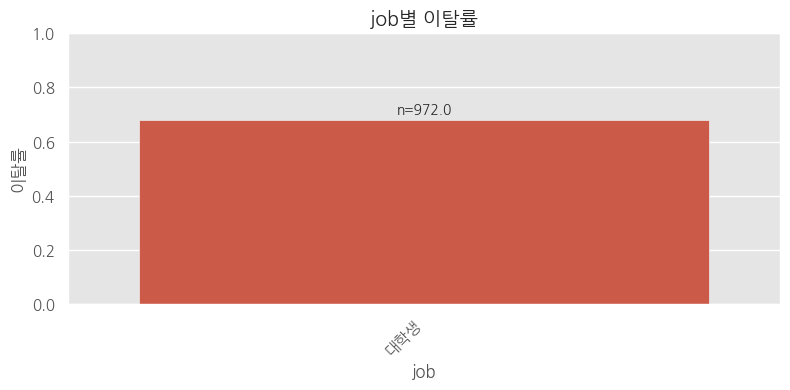

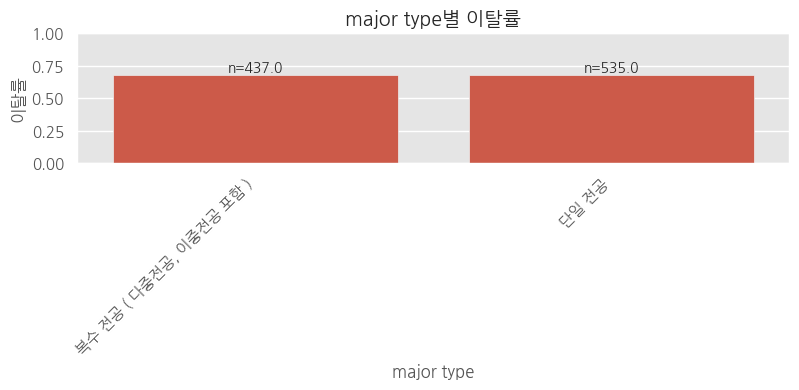

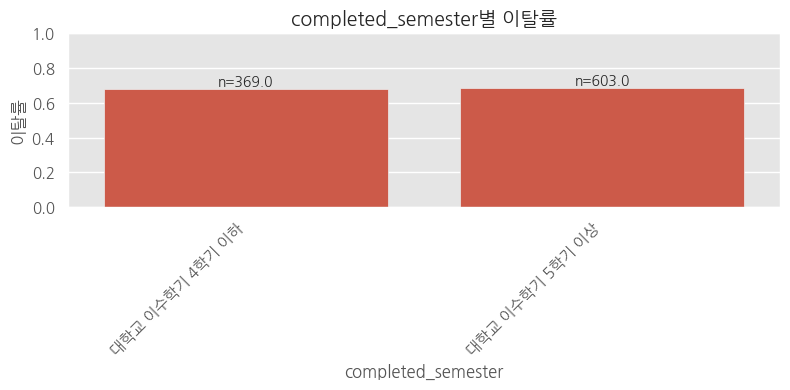

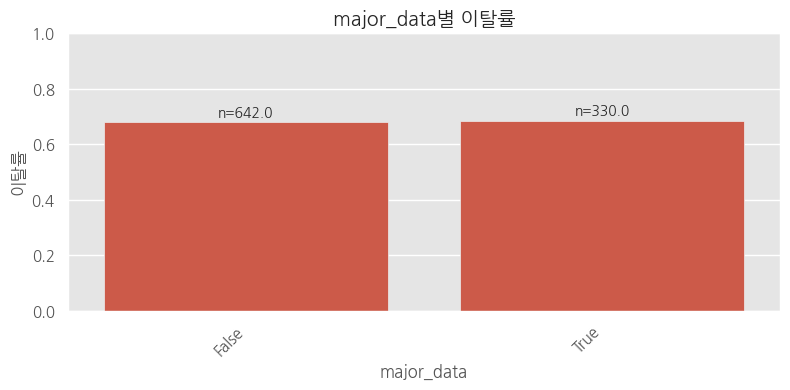

/tmp/ipykernel_6636/4239086267.py:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


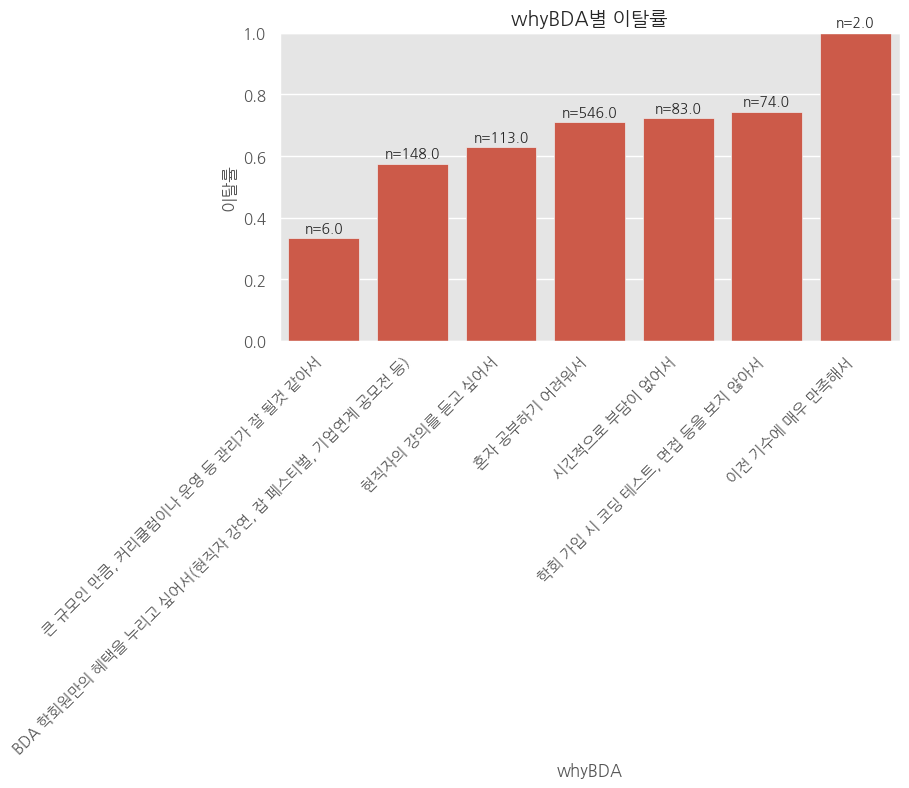

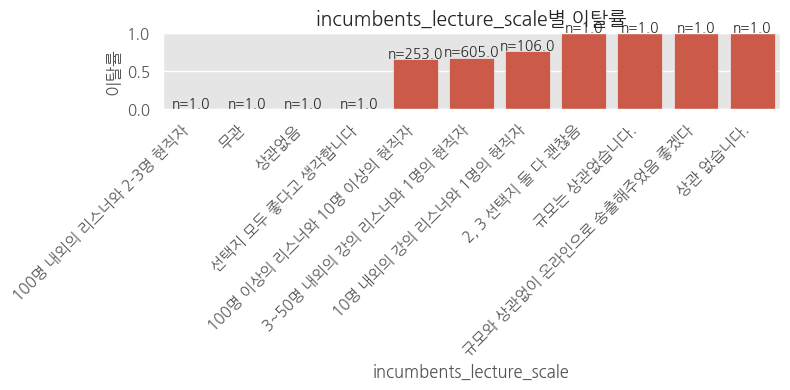

/tmp/ipykernel_6636/4239086267.py:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


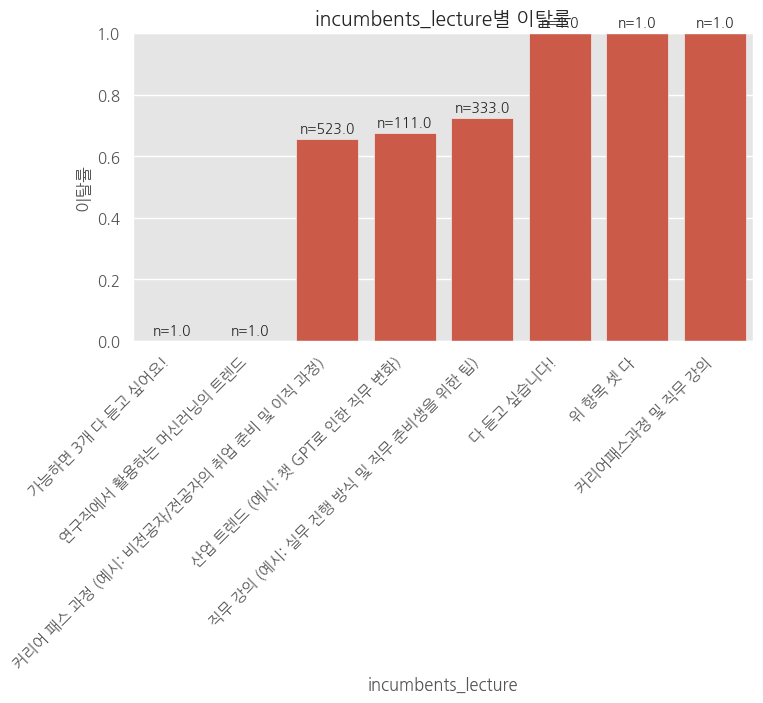

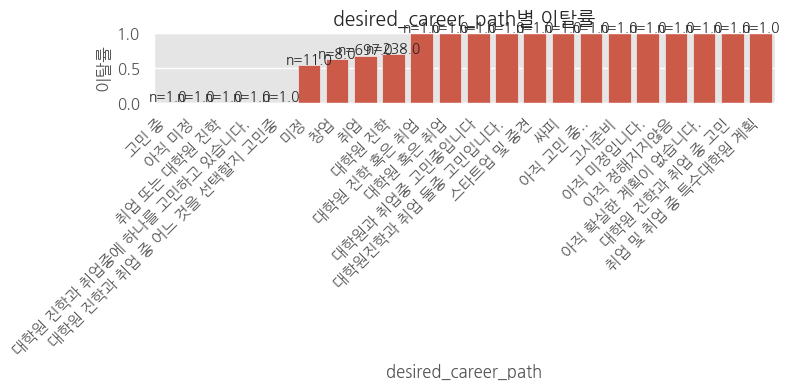

/tmp/ipykernel_6636/4239086267.py:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


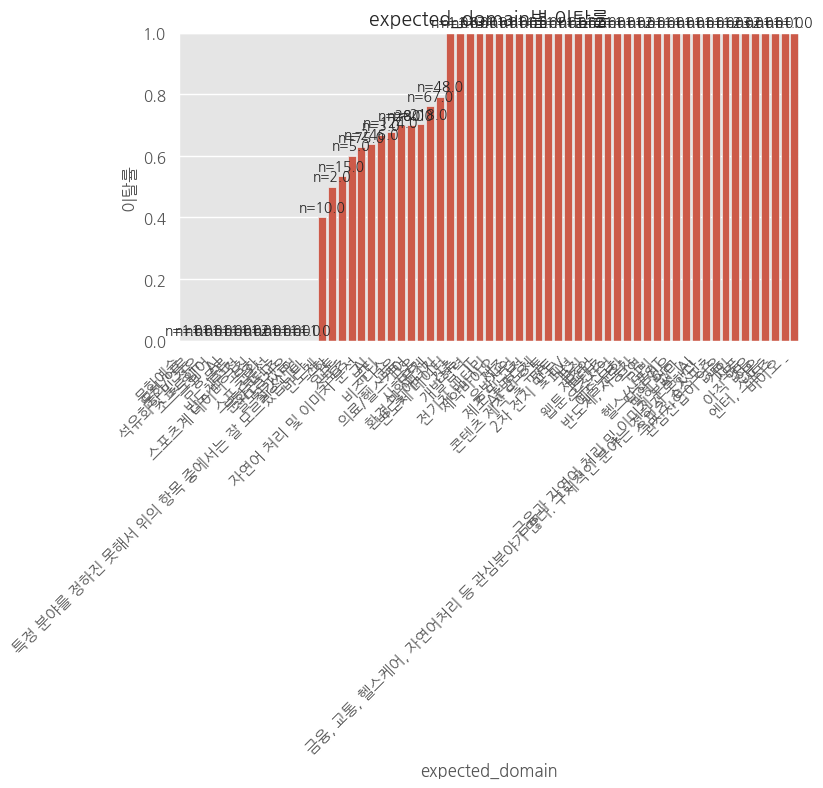

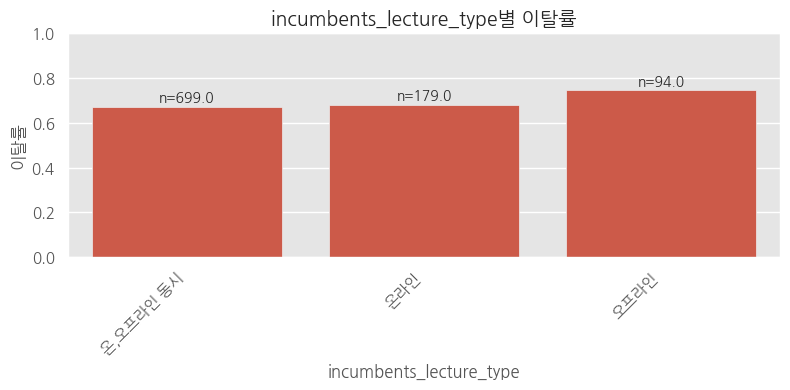

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 데이터 불러오기

# 2) 시각화 대상 변수
continuous_feats = ["time_input"]   # 가설⑦: 주간 투자 시간
categorical_feats = [
    "job",                     # 가설① 직업
    "major type",              # 가설② 전공자/비전공자
    "completed_semester",      # 가설② 수강 학기
    "major_data",              # 가설③ 학구열 여부
    "whyBDA",                  # 가설④ 강의 목적
    "incumbents_lecture_scale",# 가설④ 강의 규모
    "incumbents_lecture",      # 가설④ 현직자 여부
    "desired_career_path",     # 가설⑤ 희망 진로 그룹
    "expected_domain",         # 가설⑥ 희망 직무 숙련도
    "incumbents_lecture_type"  # 가설⑧ 온라인/오프라인 여부
]

# 3) 결측치 제거 (withdrawal도 함께 dropna)
df = df[continuous_feats + categorical_feats + ["withdrawal"]].dropna()



# 5) 연속형 박스플롯 그리기
for feat in continuous_feats:
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(
        x="job",
        y=feat,
        hue="withdrawal",
        data=df,
        showfliers=True
    )
    ax.set_title("직업에 따른 주간 투자 시간과 이탈 여부", fontsize=14)
    ax.set_xlabel("직업", fontsize=12)
    ax.set_ylabel("주간 투자 시간 (시간 단위)", fontsize=12)
    # 범례 이름 바꾸기
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["잔류(0)", "이탈(1)"], title="이탈 여부", loc="upper right")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

# 6) 범주형 이탈률 막대그래프 그리기
for feat in categorical_feats:
    # 그룹별 이탈률 계산 및 정렬
    stats = df.groupby(feat)["withdrawal"].agg(rate="mean", n="count").sort_values("rate")
    plt.figure(figsize=(8,4))
    ax = sns.barplot(x=stats.index.astype(str), y="rate", data=stats)
    # 막대 위에 n 표시
    for i, (_, row) in enumerate(stats.iterrows()):
        ax.text(i, row.rate + 0.02, f"n={row.n}", ha="center")
    ax.set_title(f"{feat}별 이탈률", fontsize=14)
    ax.set_xlabel(feat, fontsize=12)
    ax.set_ylabel("이탈률", fontsize=12)
    ax.set_ylim(0,1)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [67]:
df2 = pd.read_csv("combined_df.csv")
df = pd.read_csv("train.csv")

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap  # 긴 레이블 줄바꿈용

In [86]:
df.isnull().sum()

ID                                   0
generation                           0
school1                              0
major type                           0
major1_1                             0
major1_2                           513
major_data                           0
job                                  0
class1                               0
class2                             889
class3                             973
class4                             974
re_registration                      0
contest_award                      974
nationality                          0
inflow_route                         0
whyBDA                               0
what_to_gain                         0
hope_for_group                       0
previous_class_3                   819
previous_class_4                   819
previous_class_5                   819
previous_class_6                   819
previous_class_7                   819
major_field                          0
desired_career_path      

In [84]:
df.columns

Index(['ID', 'generation', 'school1', 'major type', 'major1_1', 'major1_2',
       'major_data', 'job', 'class1', 'class2', 'class3', 'class4',
       're_registration', 'contest_award', 'nationality', 'inflow_route',
       'whyBDA', 'what_to_gain', 'hope_for_group', 'previous_class_3',
       'previous_class_4', 'previous_class_5', 'previous_class_6',
       'previous_class_7', 'major_field', 'desired_career_path',
       'completed_semester', 'project_type', 'time_input', 'desired_job',
       'certificate_acquisition', 'desired_certificate',
       'certificate_study_period', 'desired_job_except_data',
       'incumbents_level', 'incumbents_lecture', 'incumbents_company_level',
       'incumbents_lecture_type', 'incumbents_lecture_scale',
       'incumbents_lecture_scale_reason', 'interested_company',
       'expected_domain', 'contest_participitation', 'idea_contest',
       'onedayclass_topic', 'withdrawal'],
      dtype='object')

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


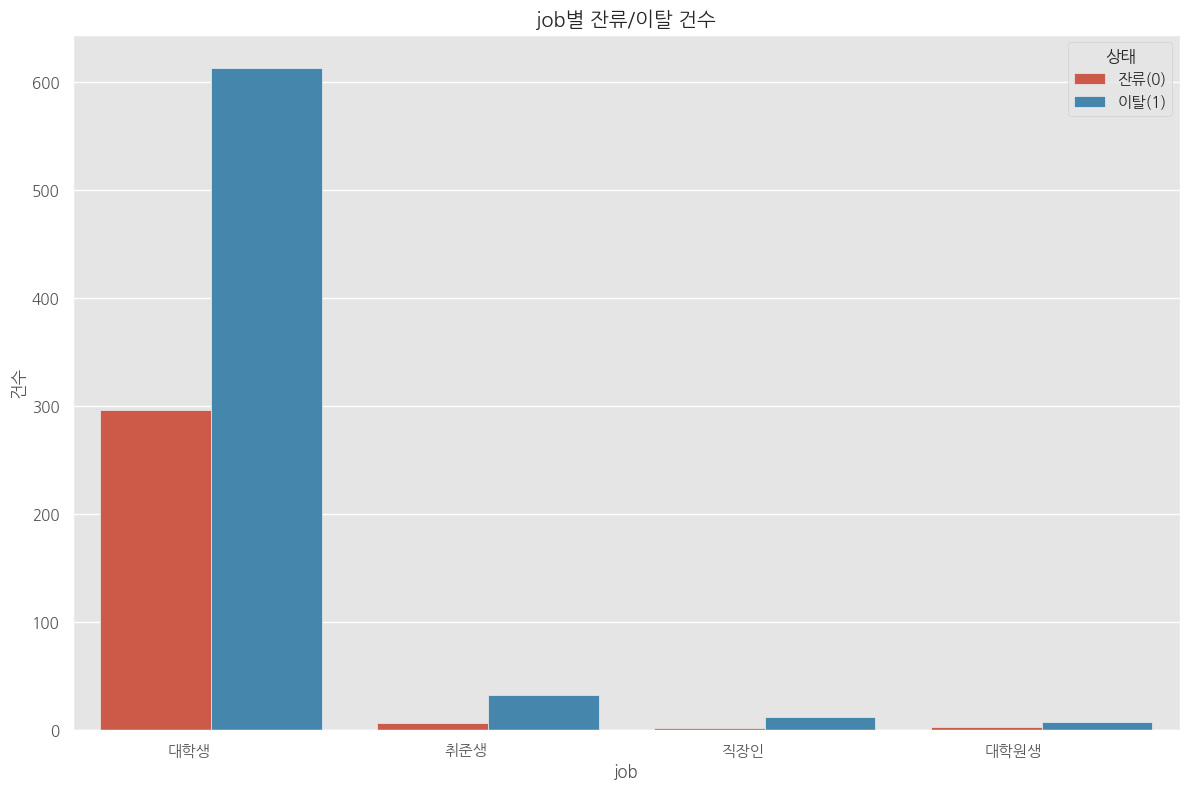

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


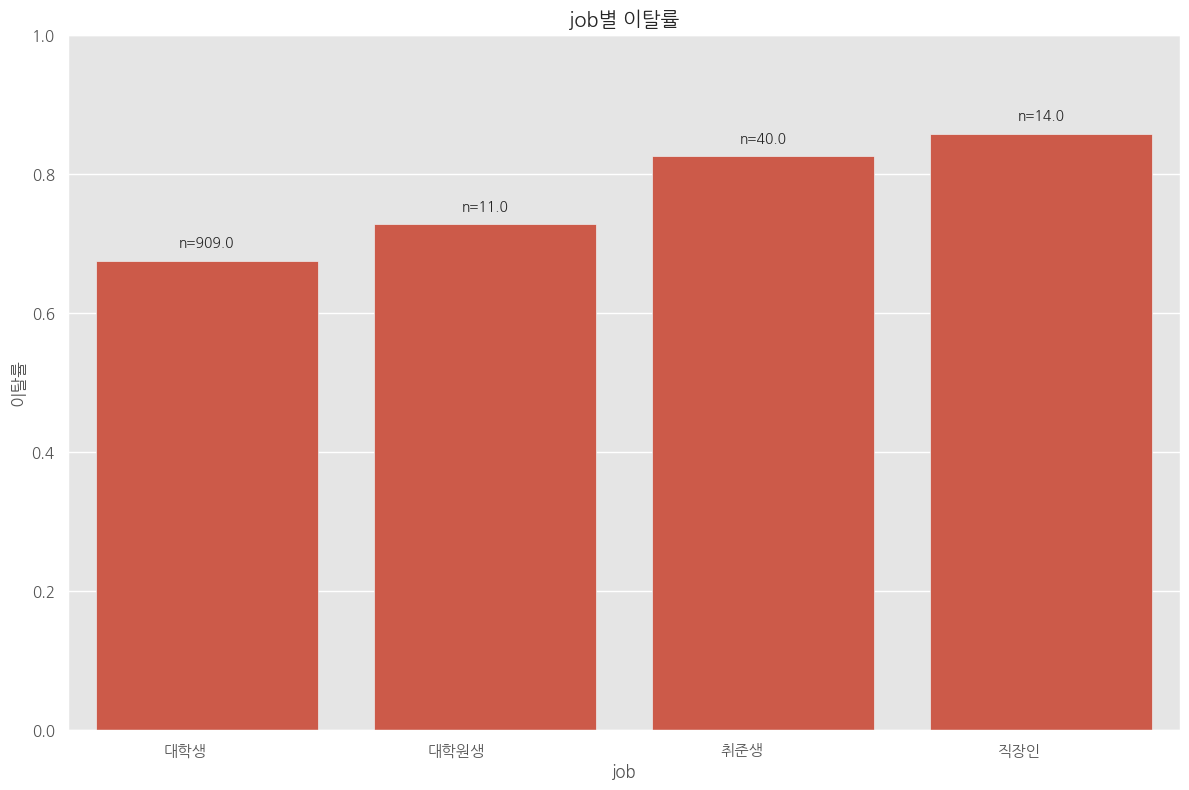

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


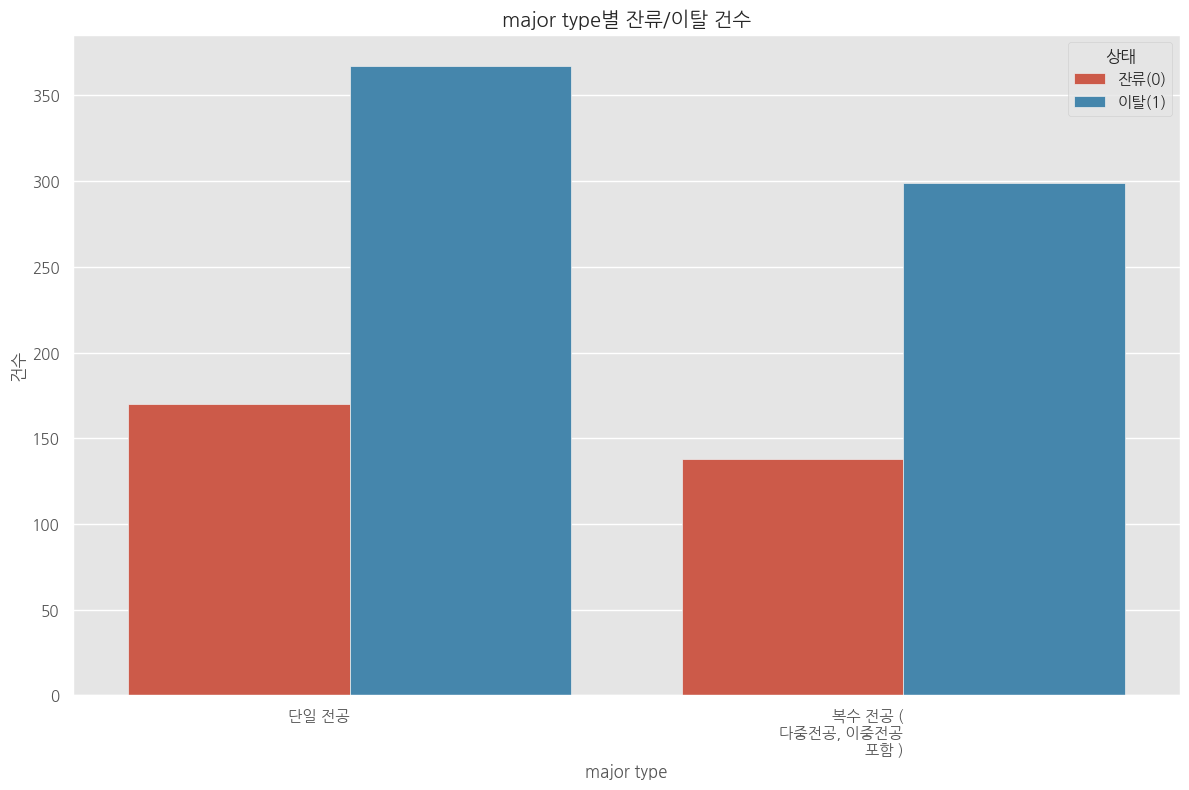

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


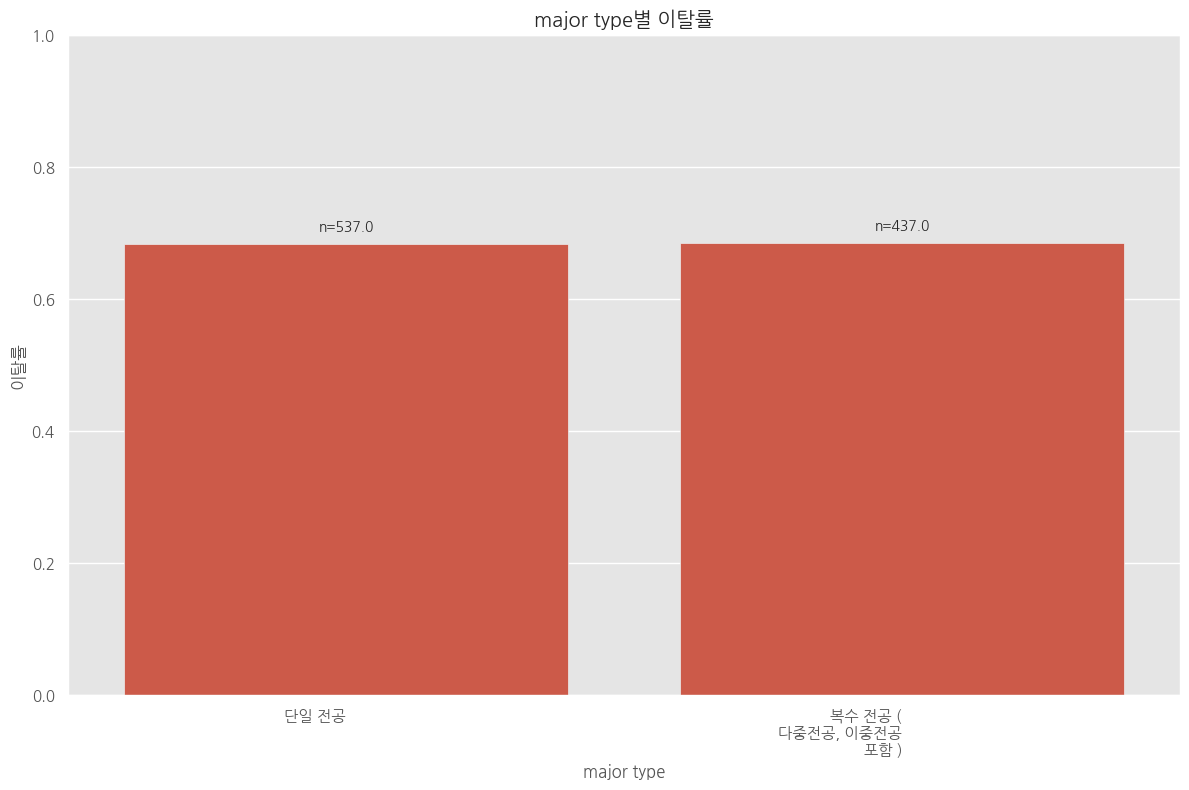

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


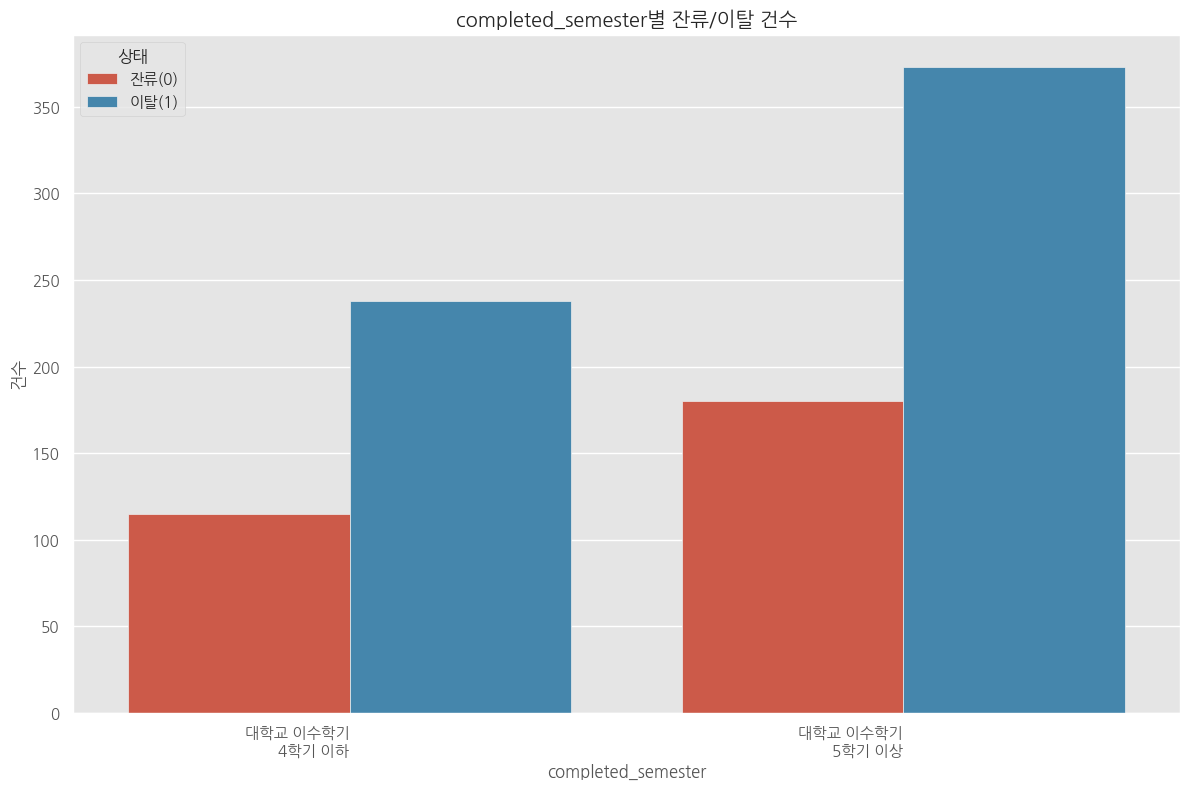

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


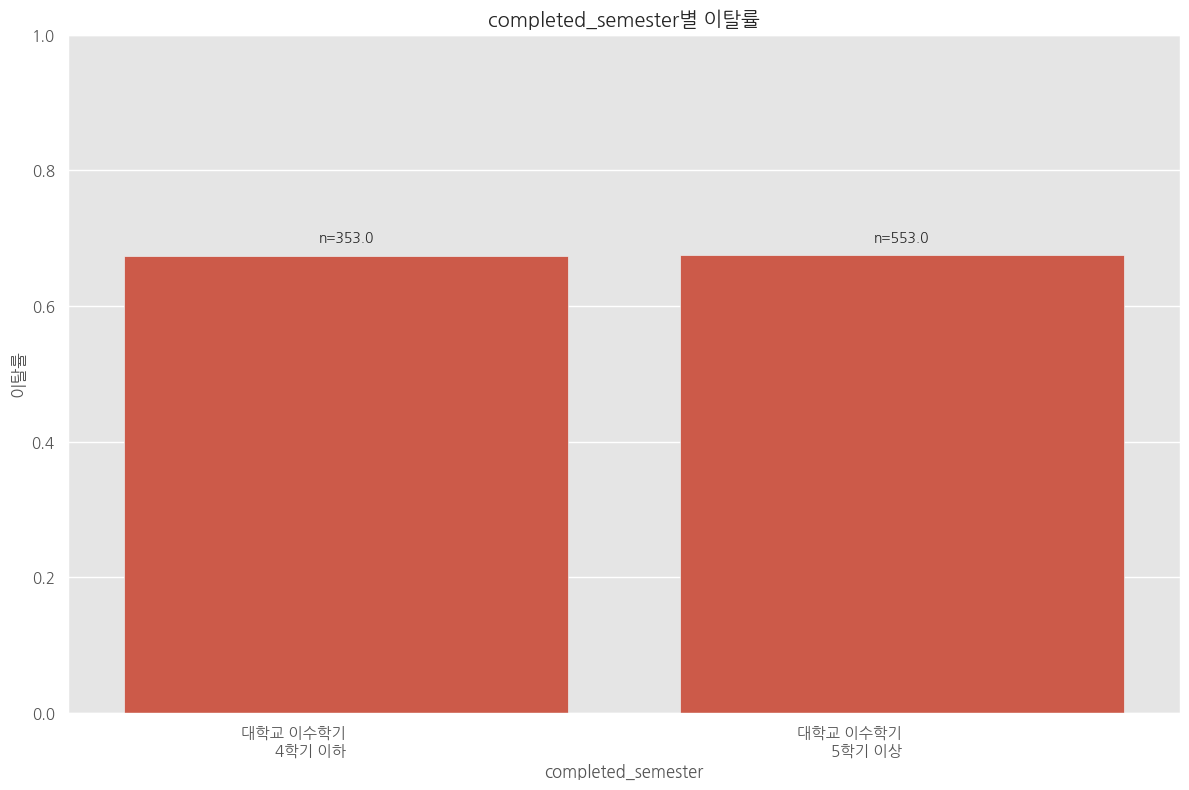

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


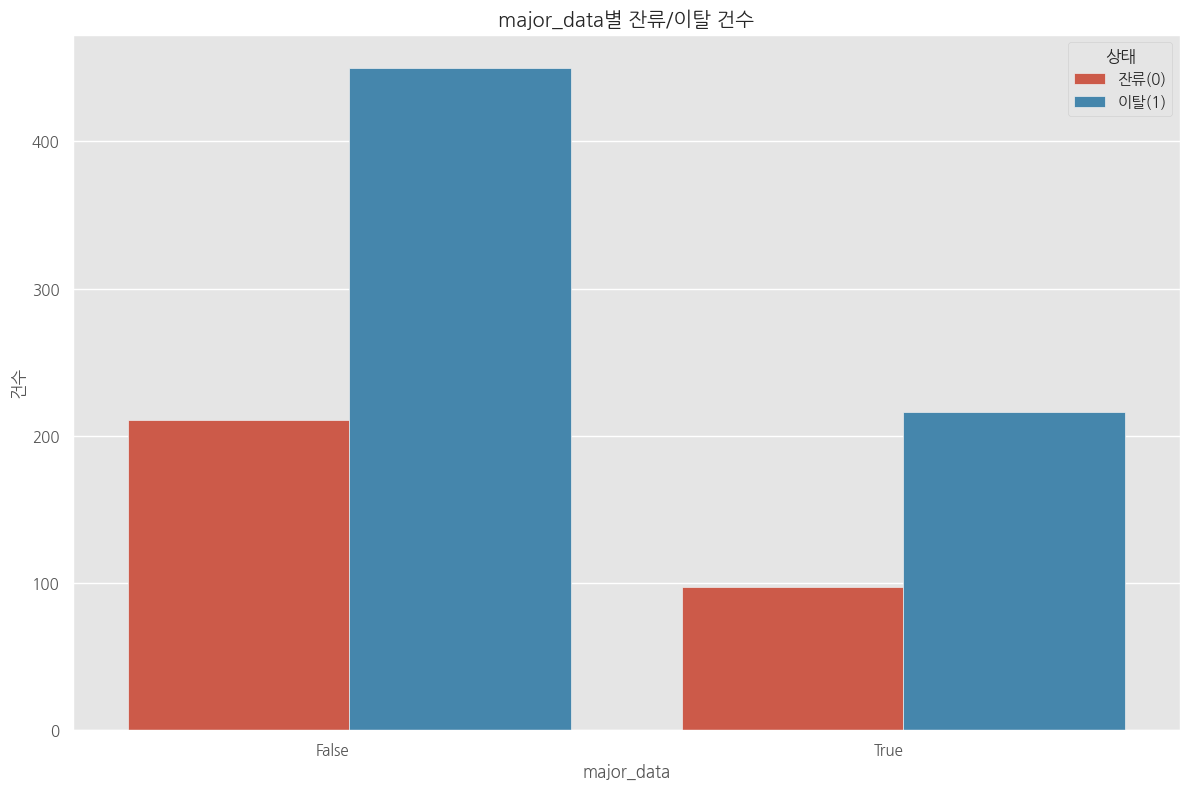

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


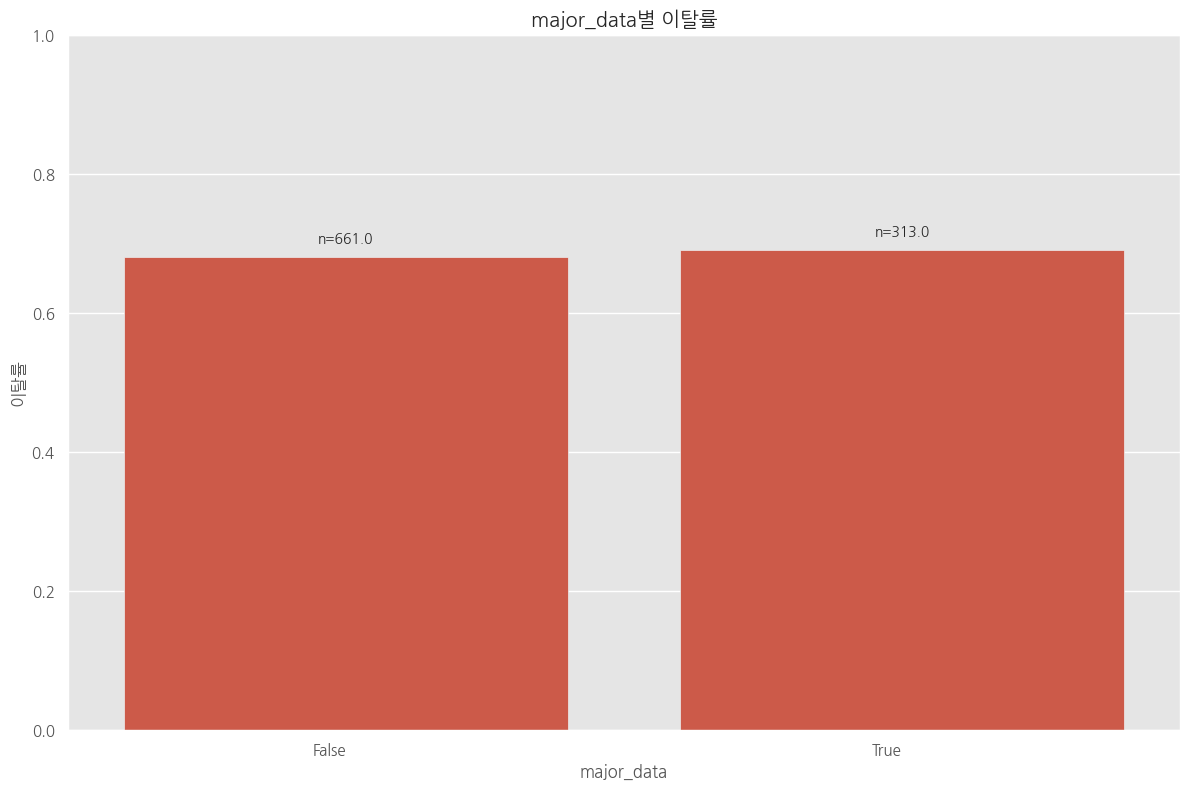

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


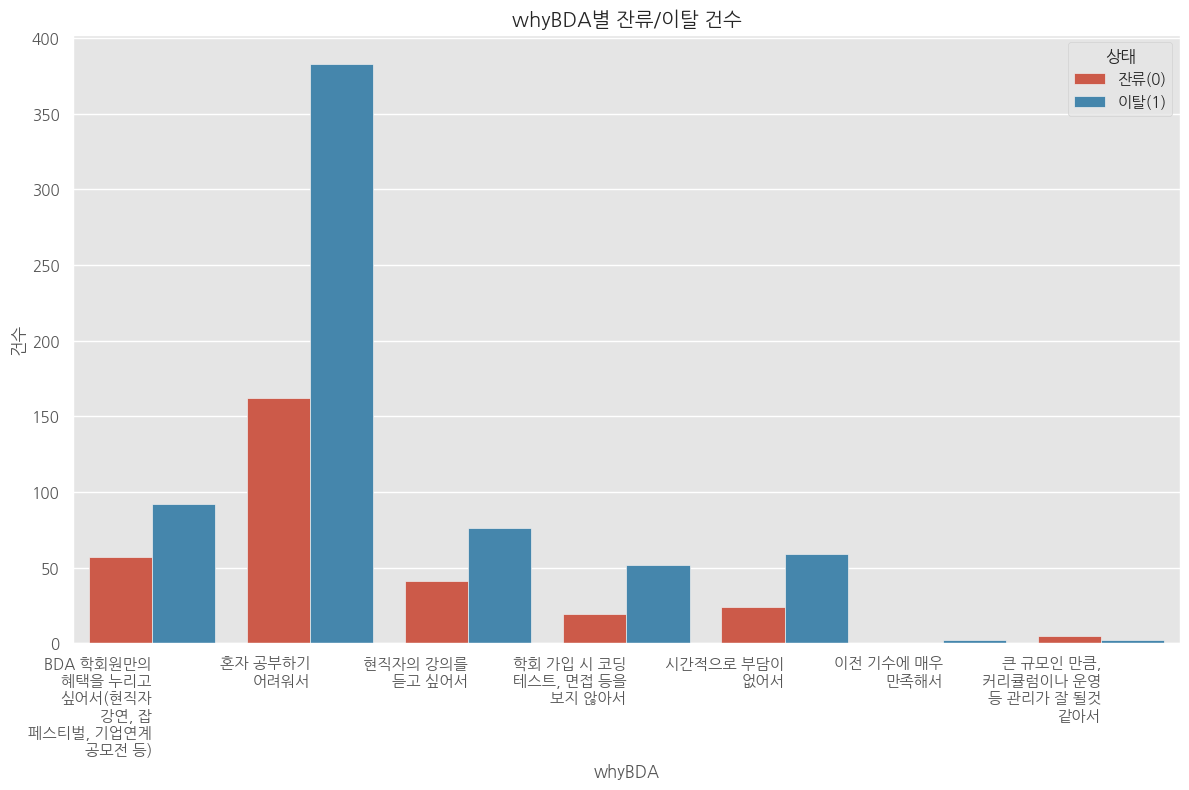

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


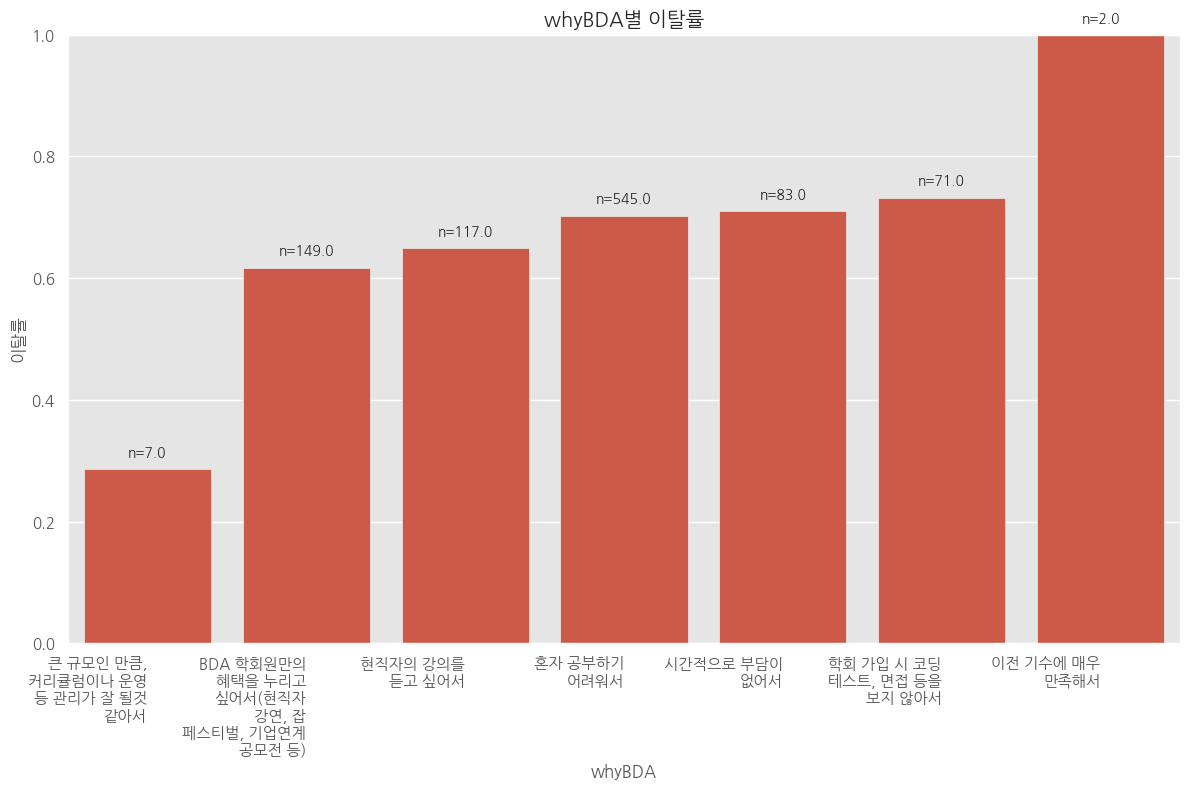

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


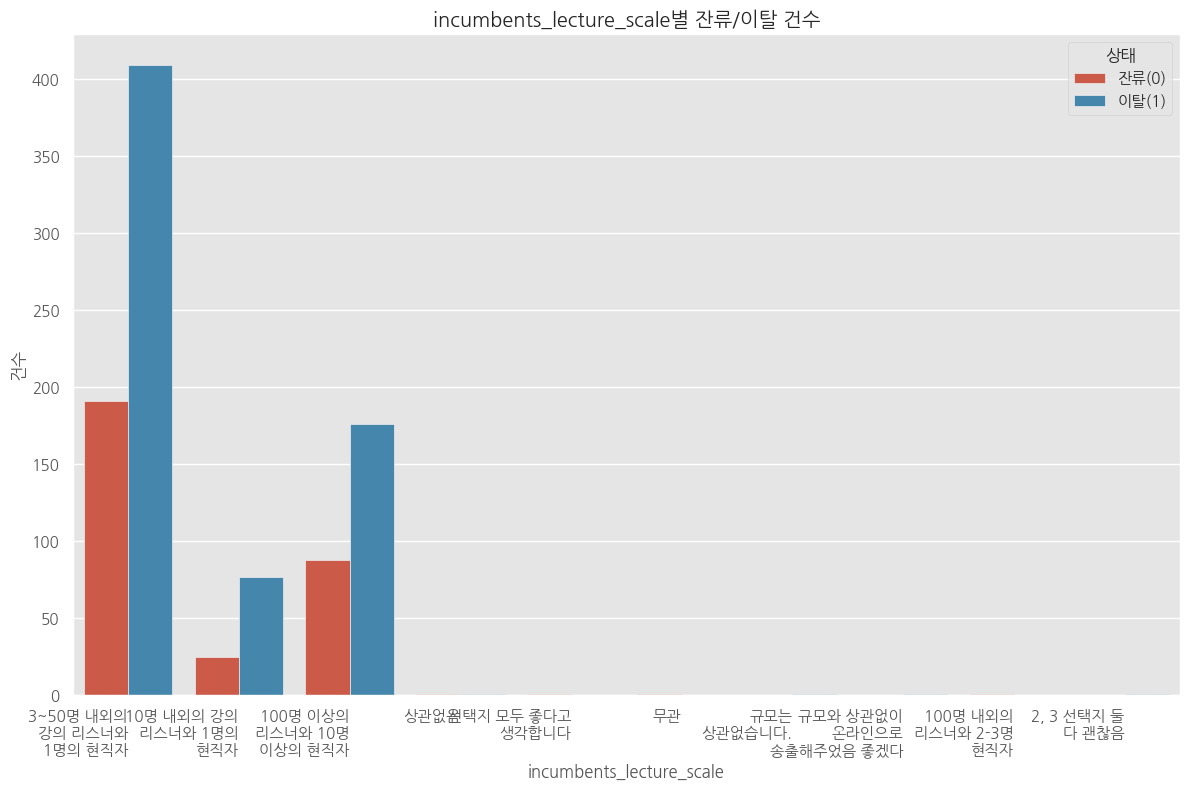

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


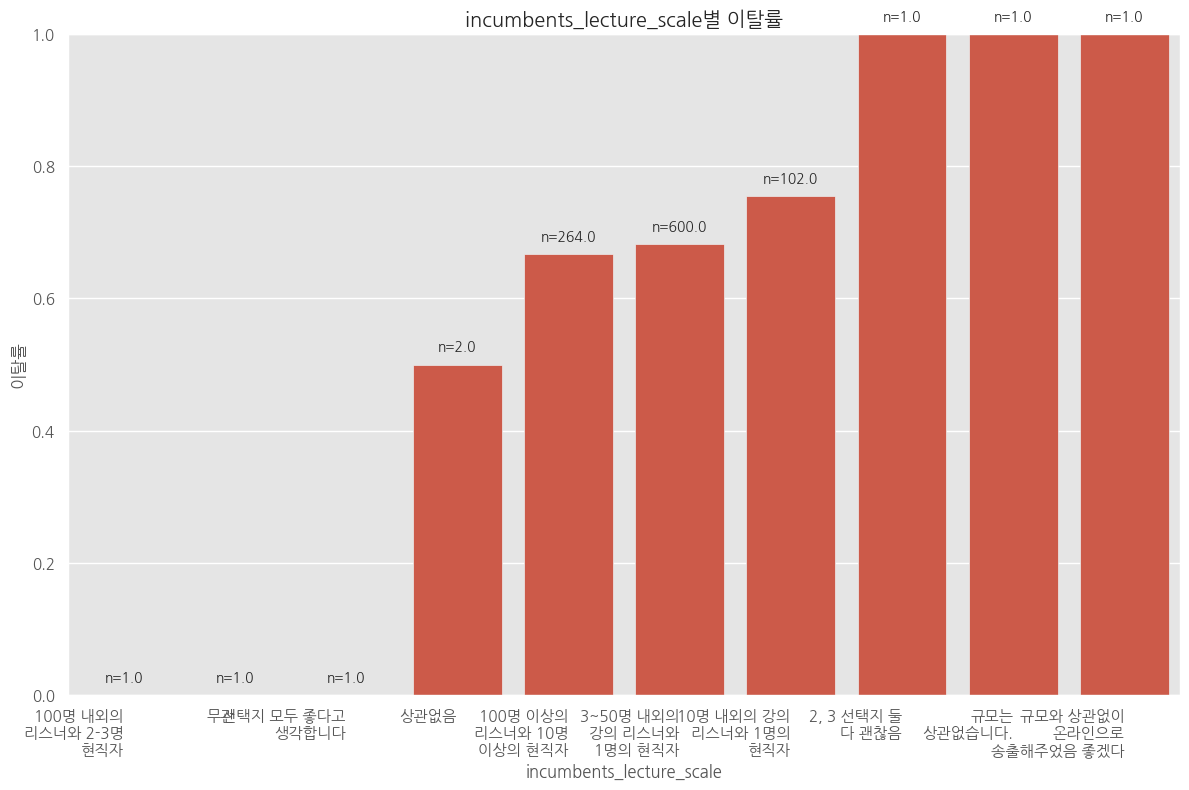

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


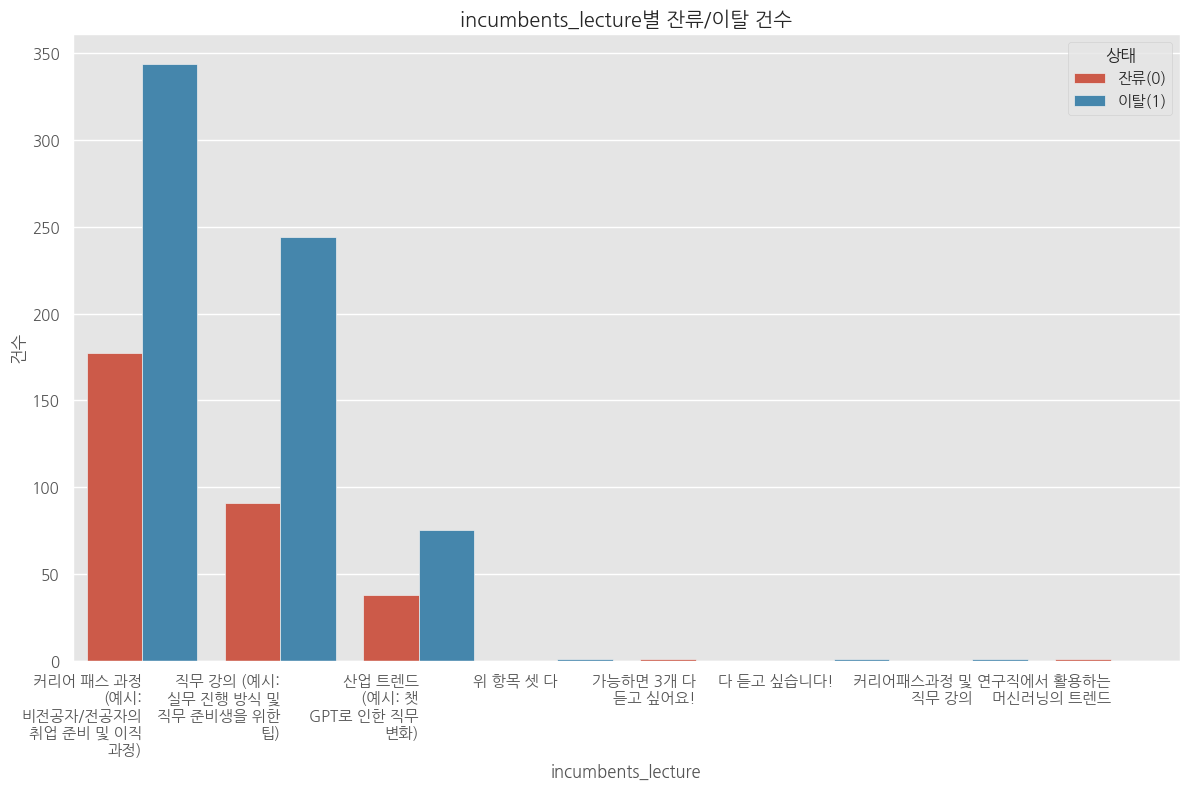

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


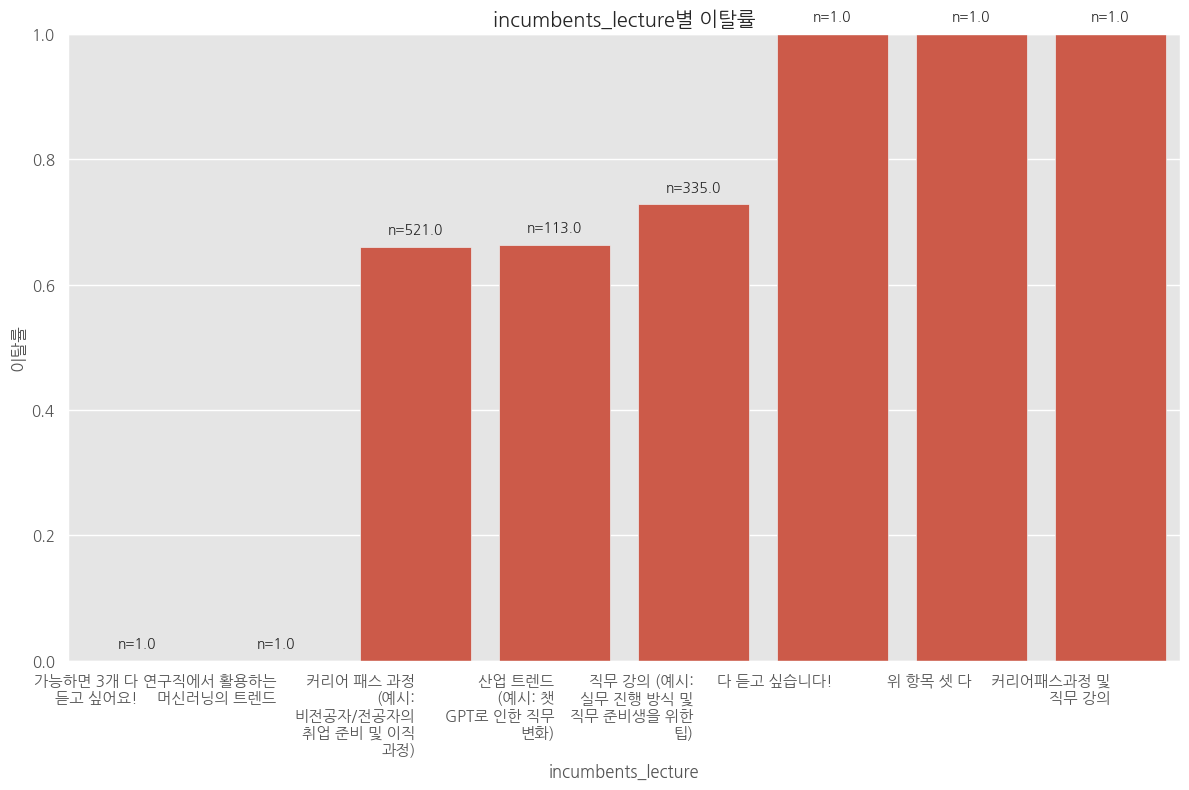

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


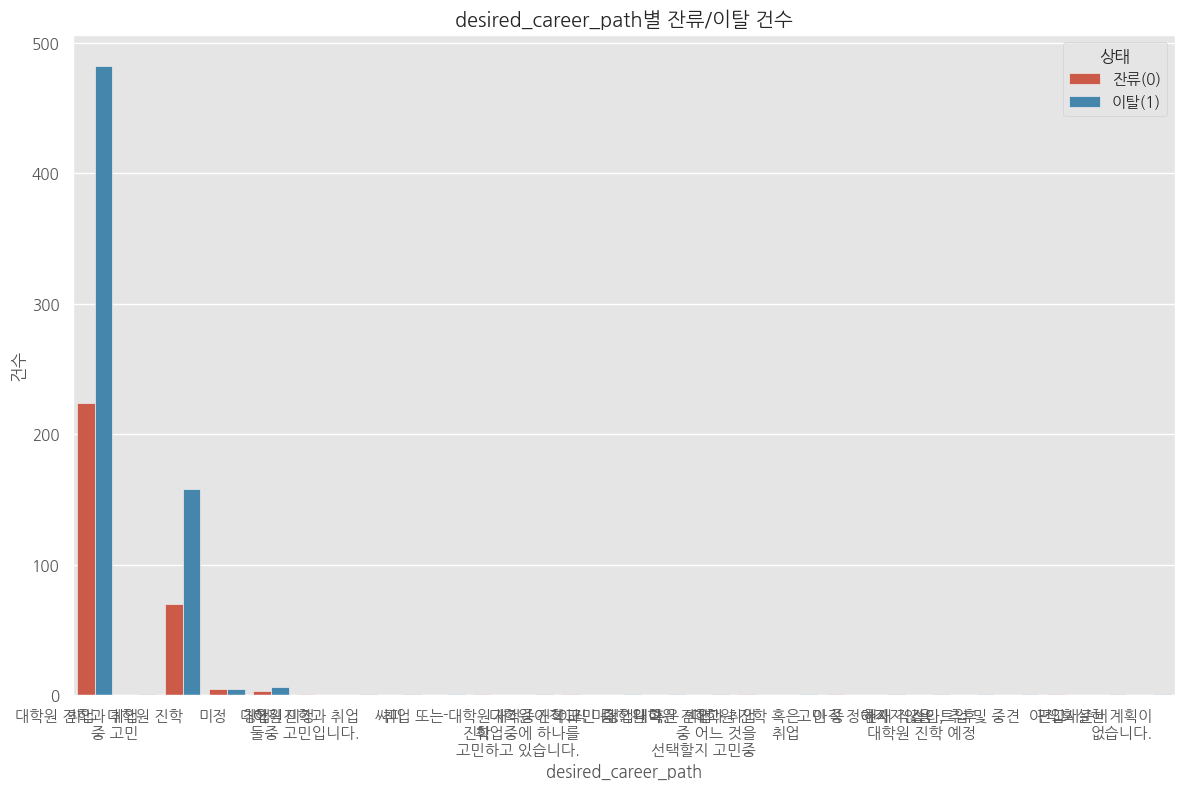

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


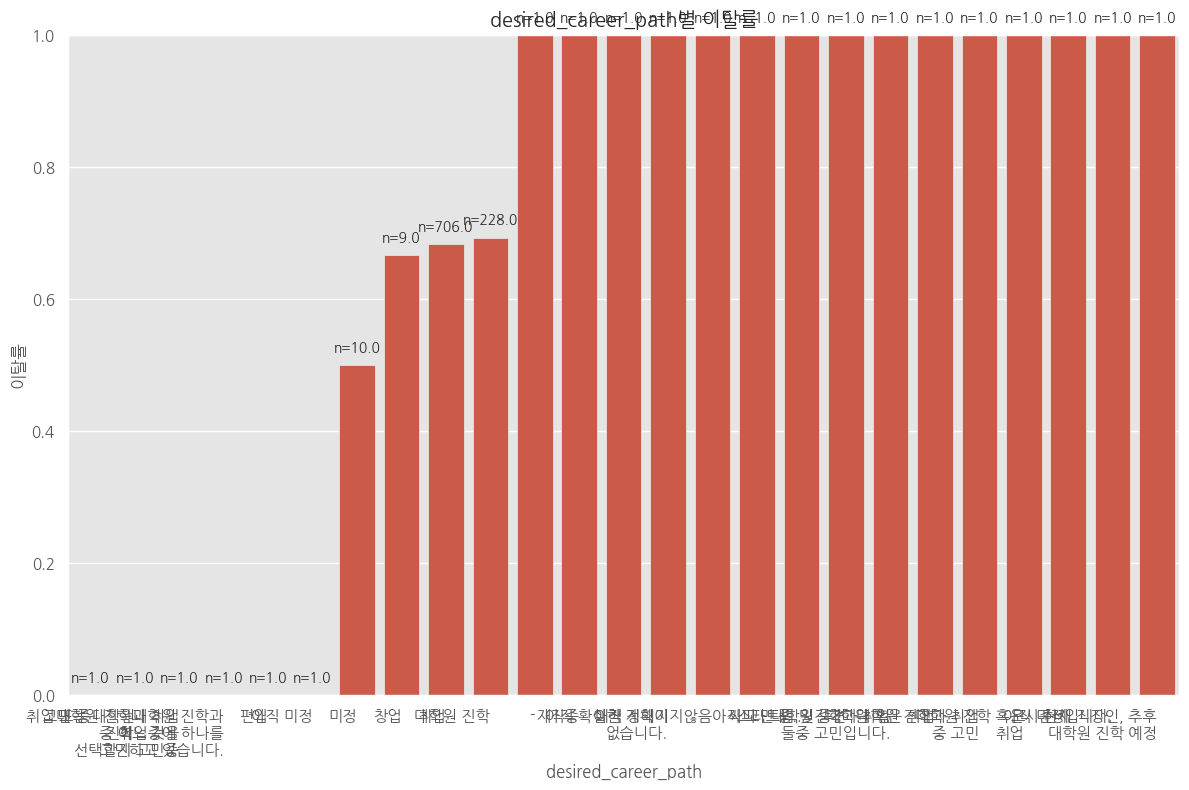

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


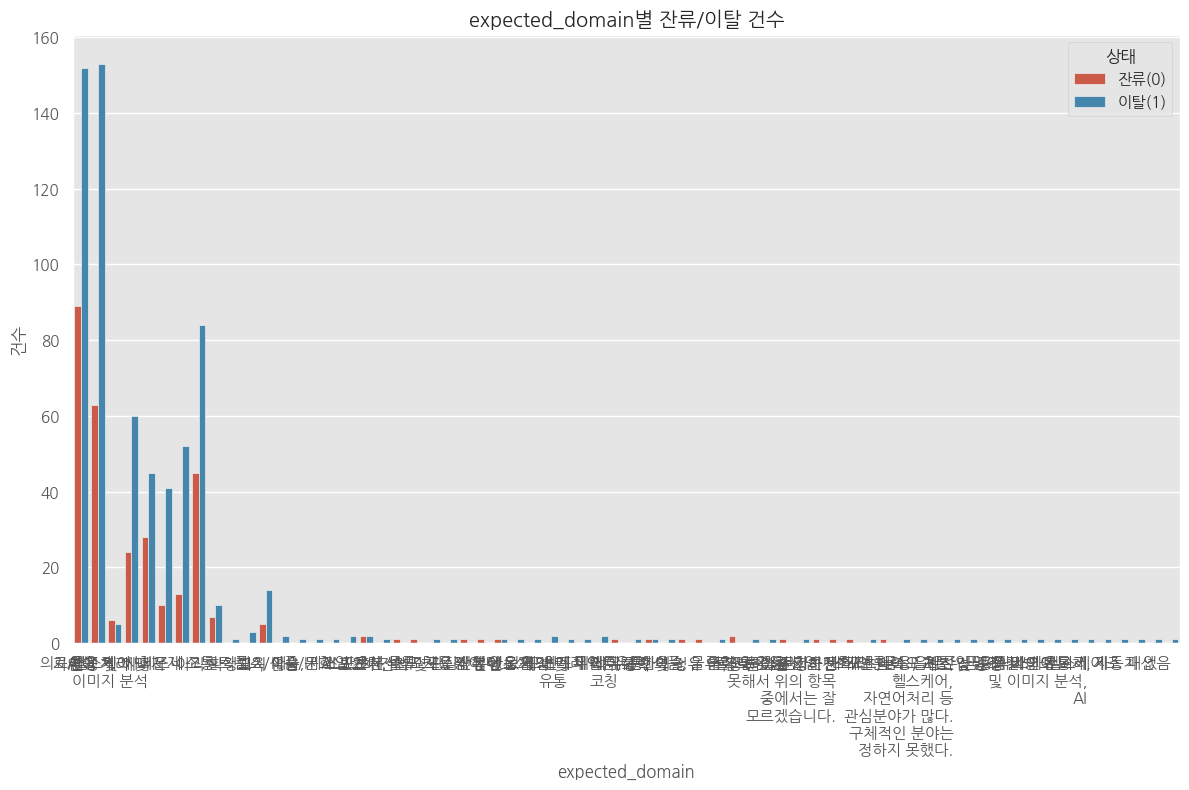

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


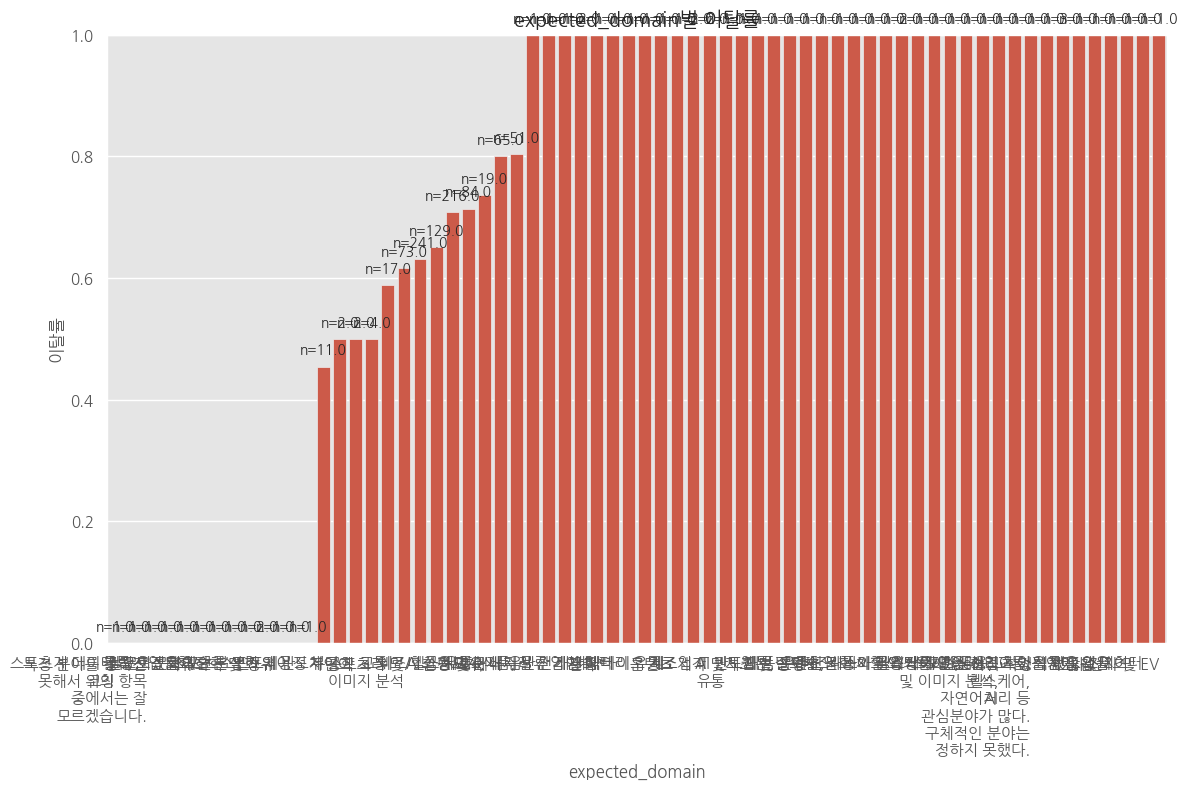

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


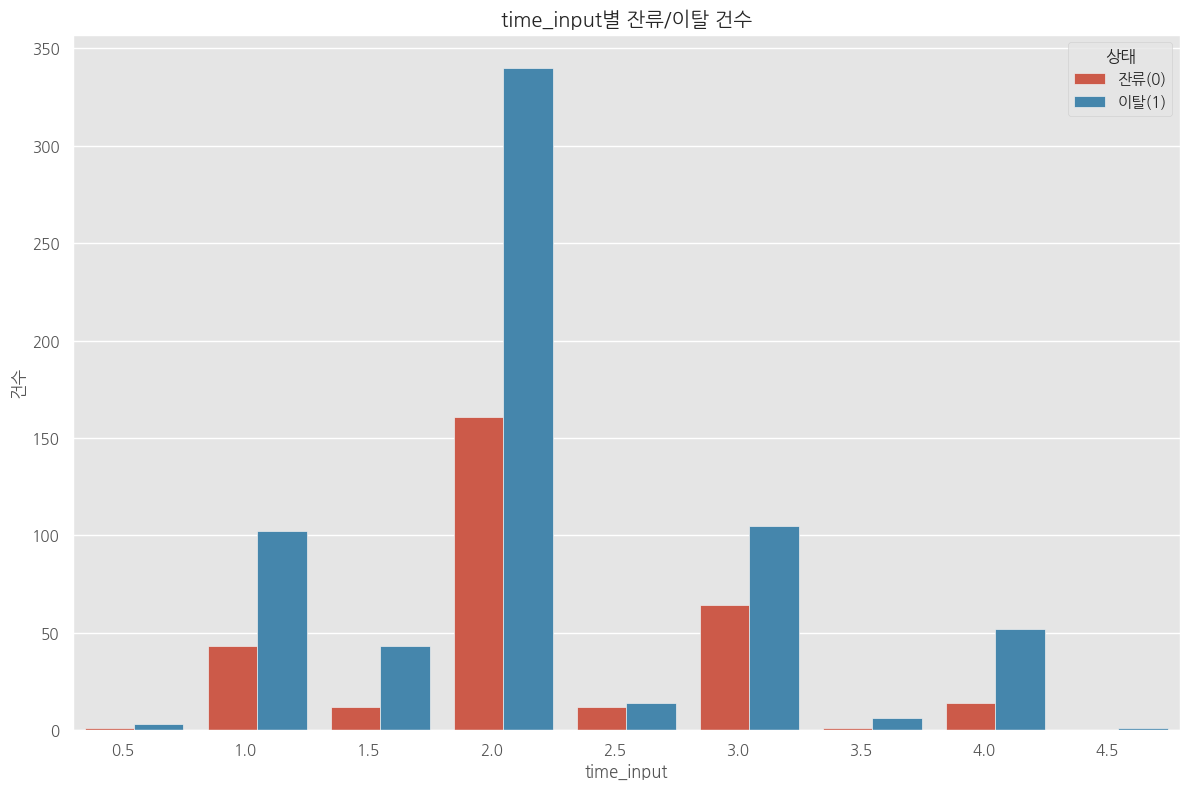

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


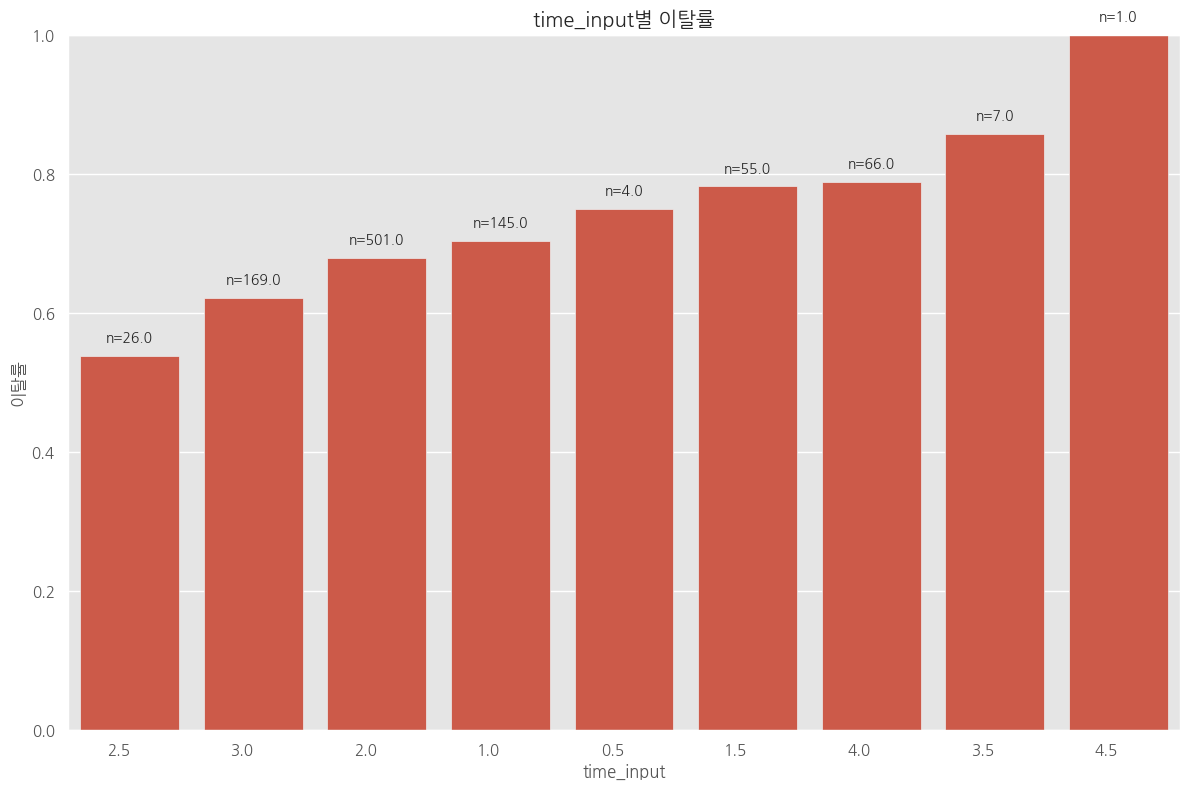

/tmp/ipykernel_6636/3946069878.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0, ha="right")


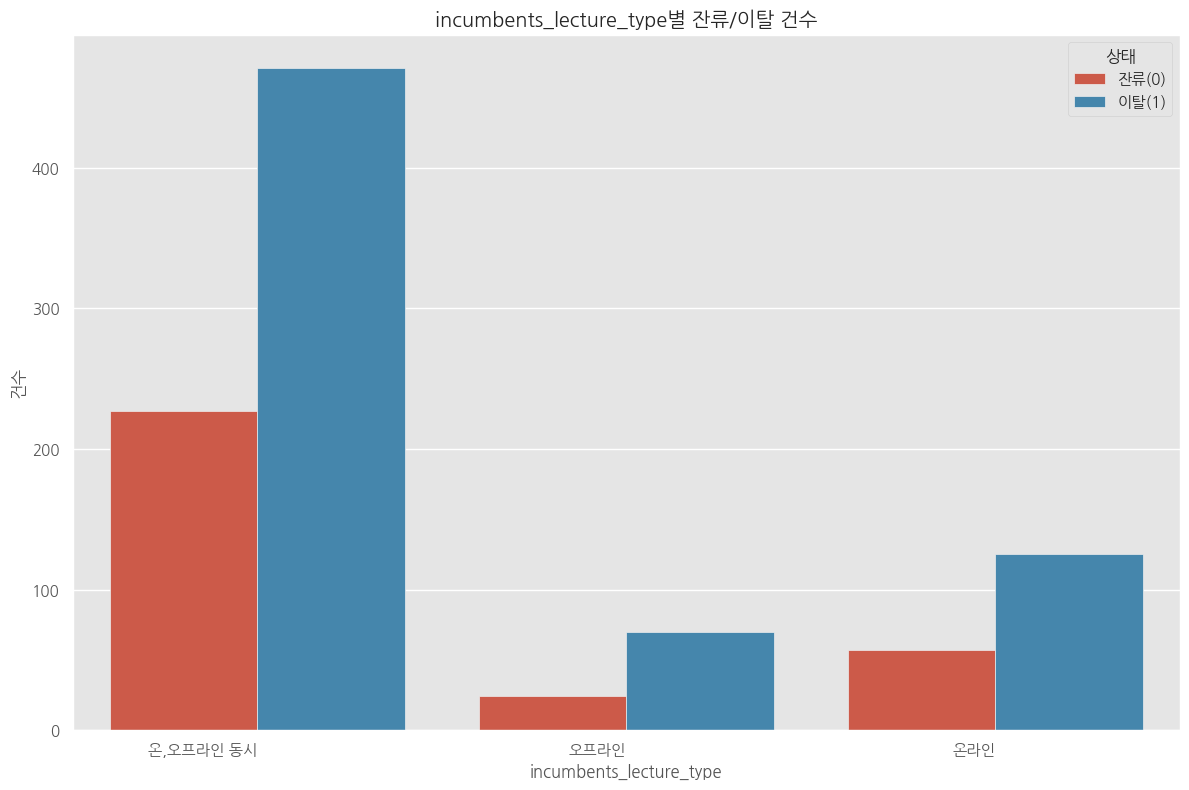

/tmp/ipykernel_6636/3946069878.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")


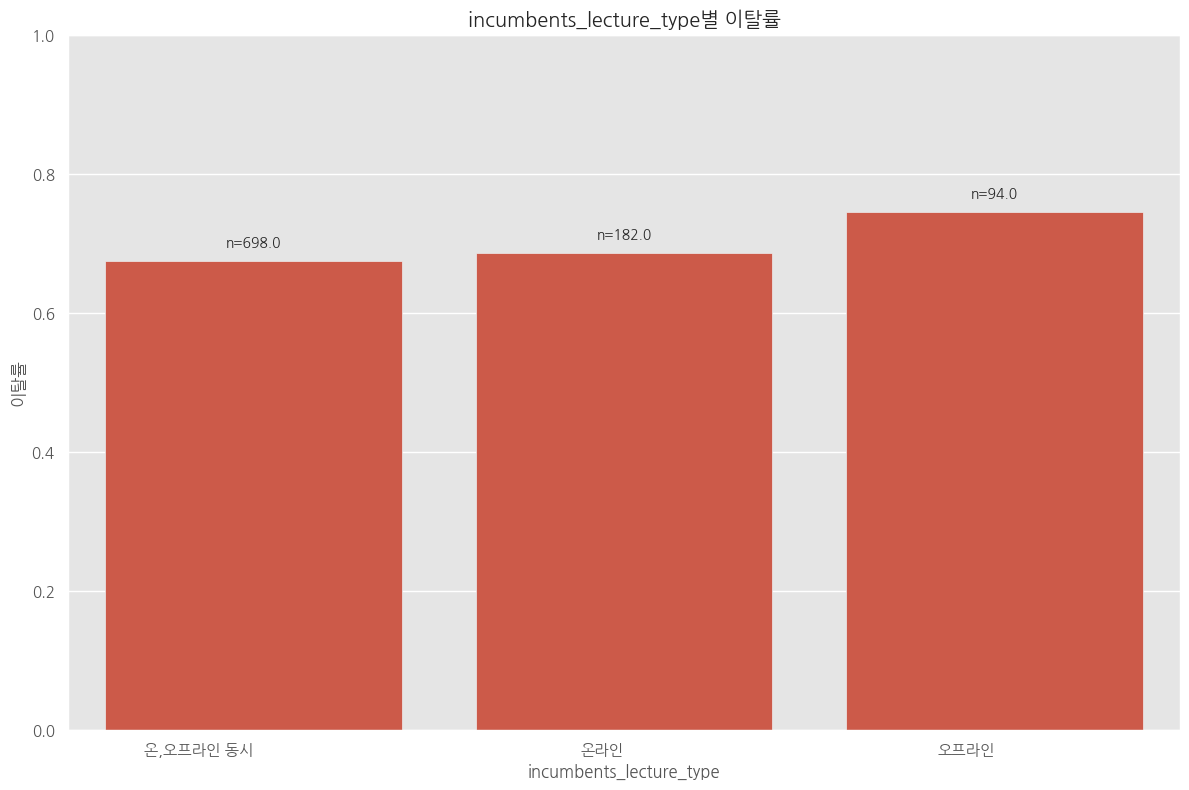

In [85]:

# 2) 분석할 범주형 컬럼 리스트 (가설 ①~⑥,⑧)
categorical_feats = [
    "job",                       
    "major type",                
    "completed_semester",        
    "major_data",                
    "whyBDA",                    
    "incumbents_lecture_scale",  
    "incumbents_lecture",        
    "desired_career_path",       
    "expected_domain",           
    "time_input",
    "incumbents_lecture_type"    
    
]

# 3) 결측치 제거 (withdrawal도 함께)

# 4) 줄바꿈 폭 설정 (한 줄에 최대 글자 수)
wrap_width = 10

# 5) 각 컬럼별로
for feat in categorical_feats:
    # (A) countplot: 카테고리별 잔류(0)/이탈(1) 건수
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(data=df, x=feat, hue="withdrawal")
    plt.title(f"{feat}별 잔류/이탈 건수")
    plt.xlabel(feat);  plt.ylabel("건수")
    plt.legend(["잔류(0)", "이탈(1)"], title="상태")
    # 레이블 줄바꿈
    labels = [textwrap.fill(lbl.get_text(), wrap_width) for lbl in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=0, ha="right")
    plt.tight_layout();  plt.show()

    # (B) barplot: 카테고리별 이탈률
    stats = df.groupby(feat)["withdrawal"] \
              .agg(rate="mean", n="count") \
              .sort_values("rate")
    wrapped_idx = [textwrap.fill(str(lbl), wrap_width) for lbl in stats.index]

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=wrapped_idx, y="rate", data=stats)
    for i, (_, row) in enumerate(stats.iterrows()):
        ax.text(i, row.rate + 0.02, f"n={row.n}", ha="center")
    plt.title(f"{feat}별 이탈률");  plt.xlabel(feat);  plt.ylabel("이탈률")
    plt.ylim(0,1)
    ax.set_xticklabels(wrapped_idx, rotation=0, ha="right")
    plt.tight_layout();  plt.show()

In [89]:
df.expected_domain.value_counts()

expected_domain
AI                 241
금융                 216
비즈니스               129
의료/헬스케어             84
자연어 처리 및 이미지 분석     73
                  ... 
웹툰, 콘텐츠              1
문화예술                 1
석유화학 및 정유            1
유통, 식품, 물류           1
없음                   1
Name: count, Length: 66, dtype: int64

In [70]:
df.job.value_counts()

job
대학생     985
취준생      43
직장인      14
대학원생     14
Name: count, dtype: int64

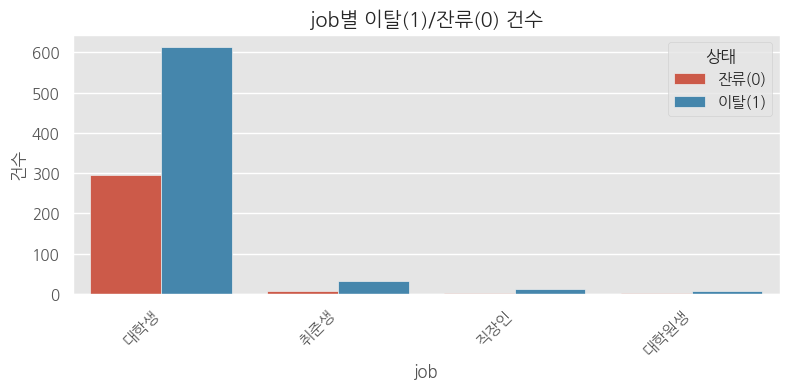

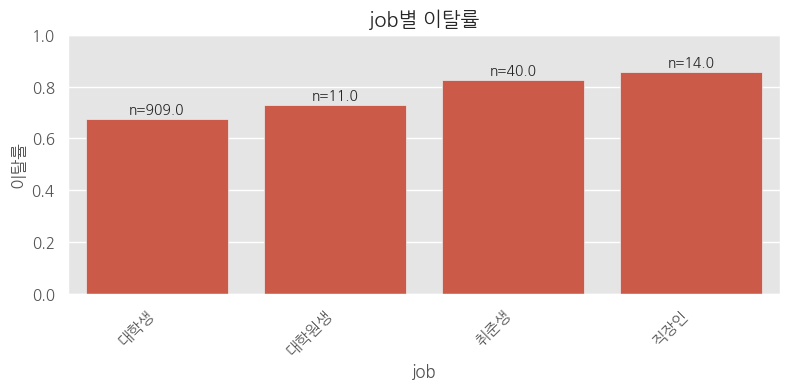

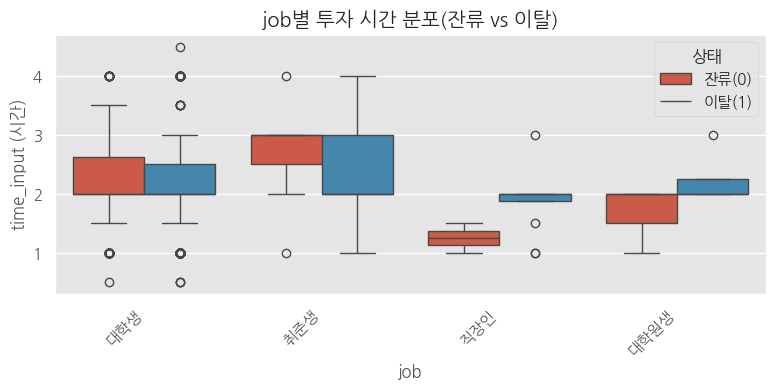

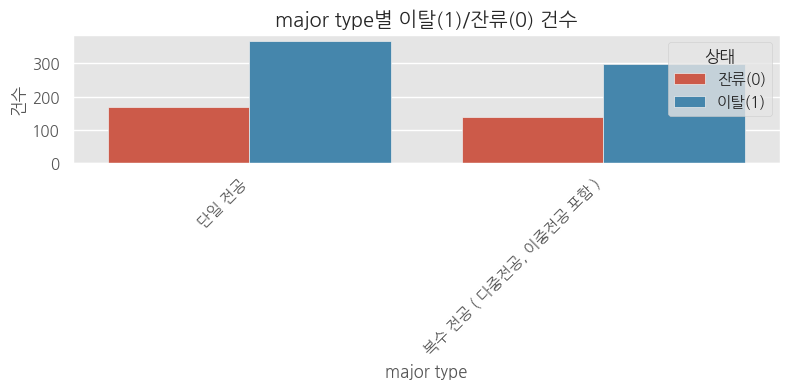

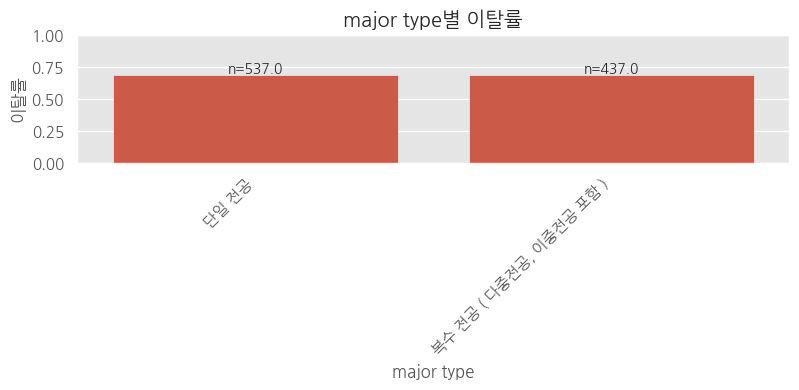

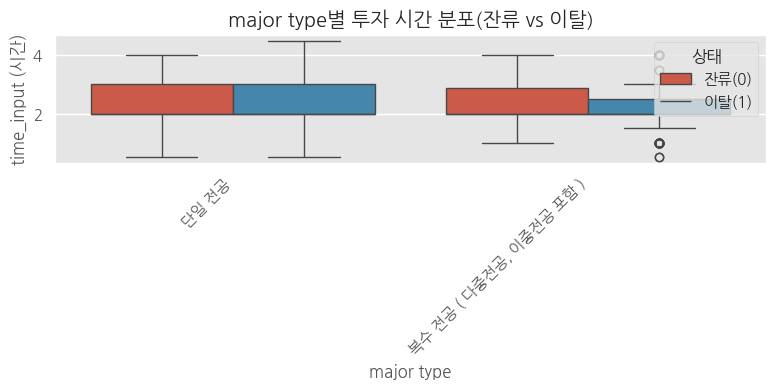

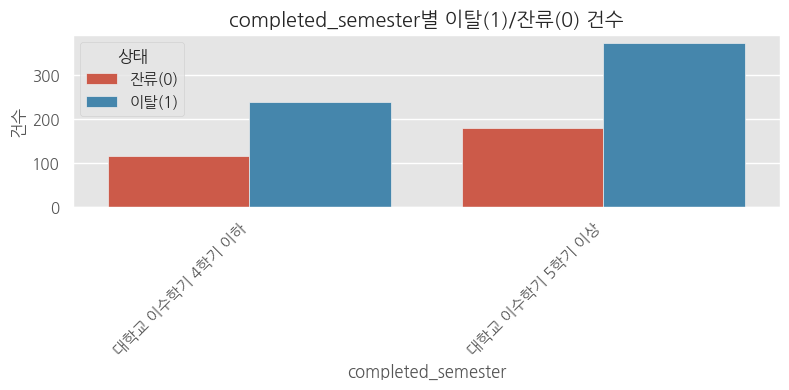

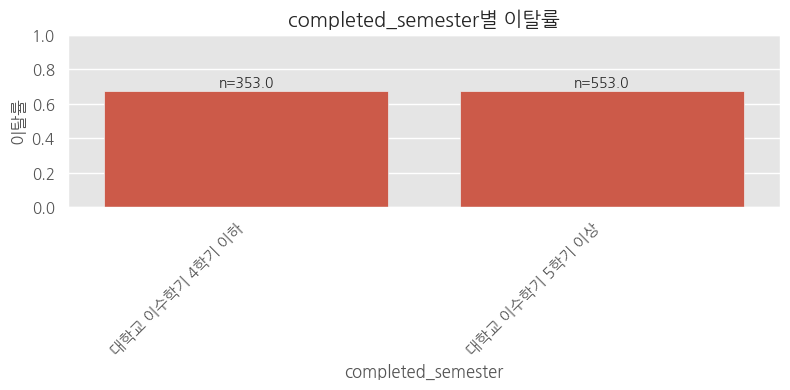

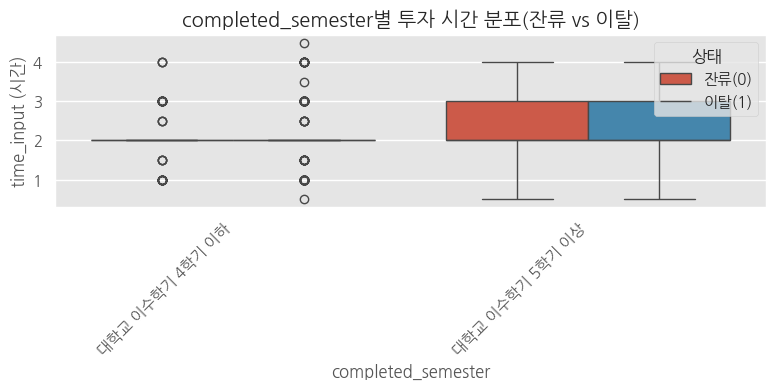

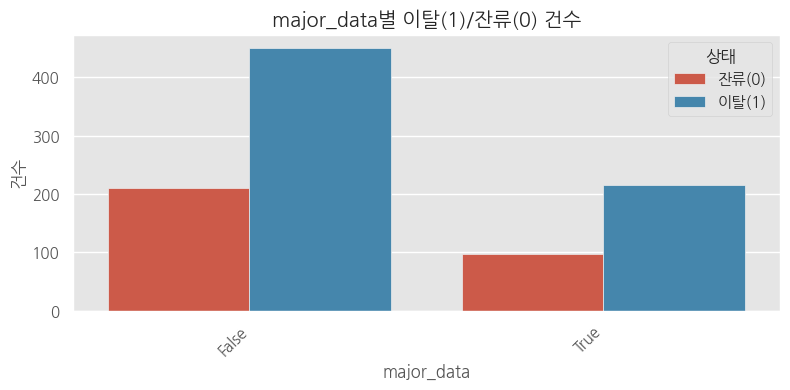

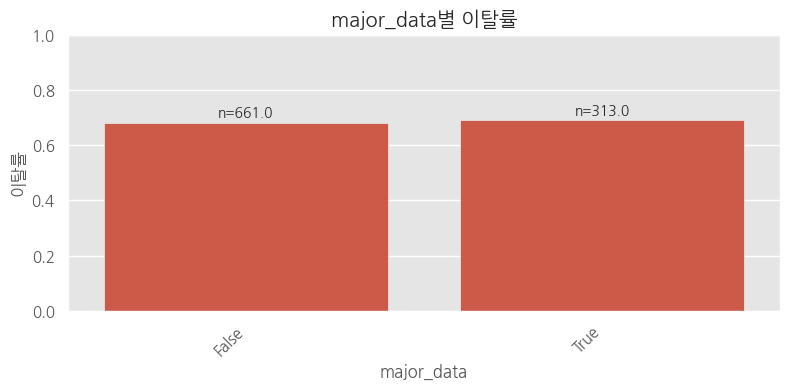

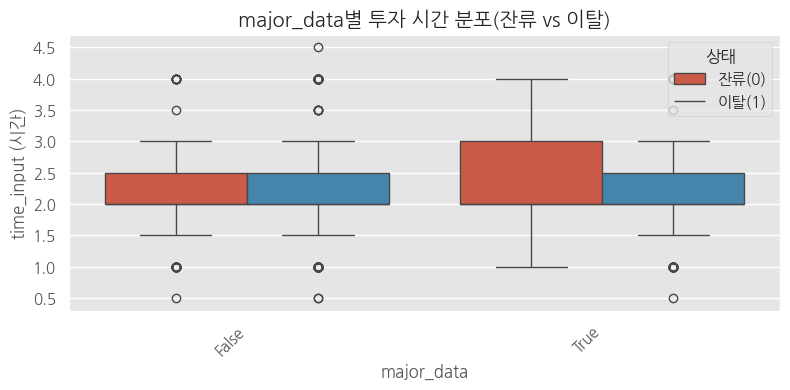

/tmp/ipykernel_6636/4273639836.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


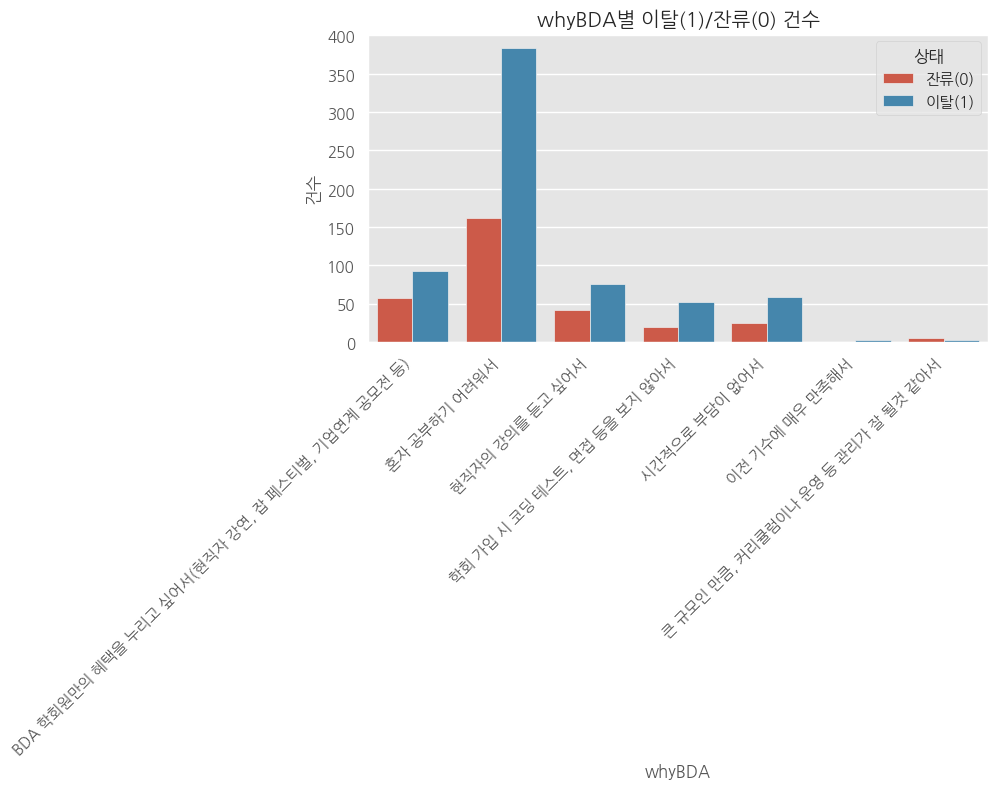

/tmp/ipykernel_6636/4273639836.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


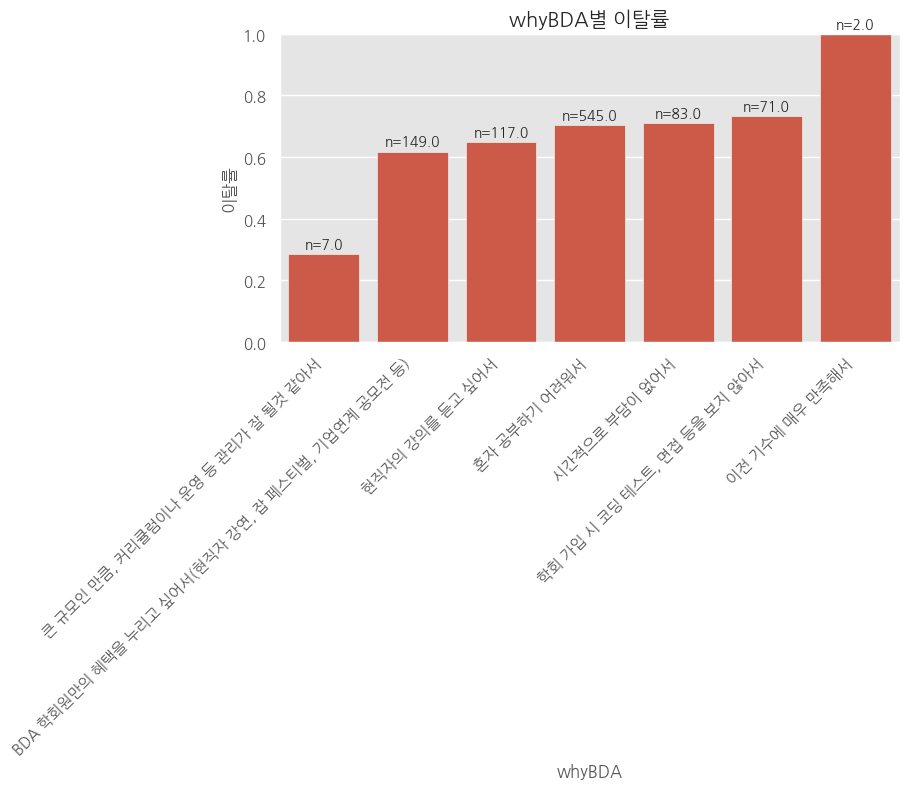

/tmp/ipykernel_6636/4273639836.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


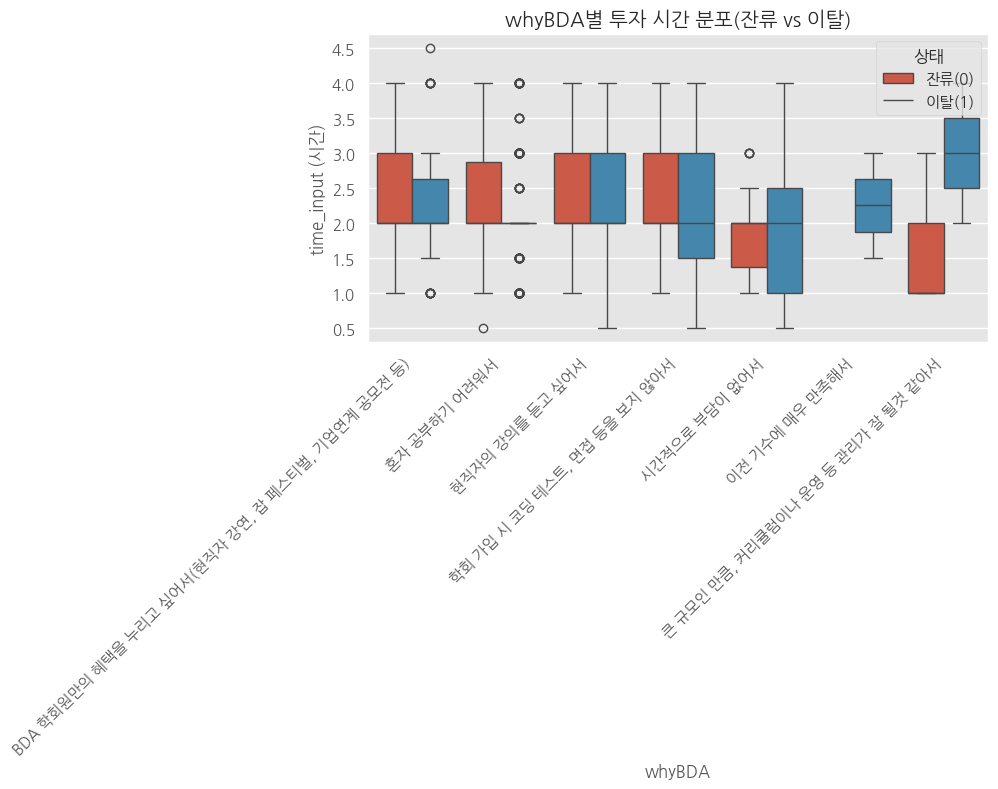

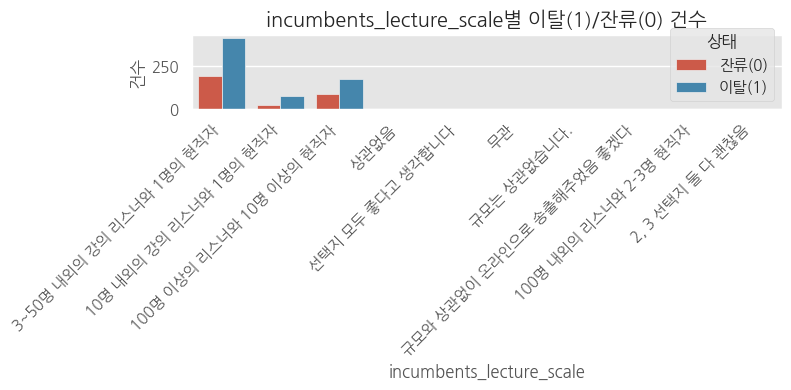

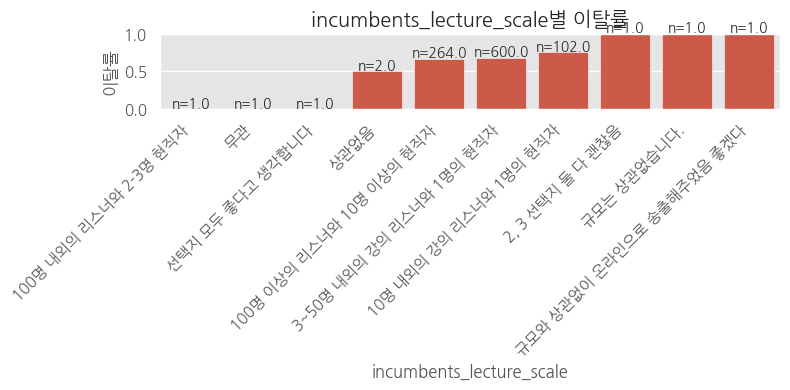

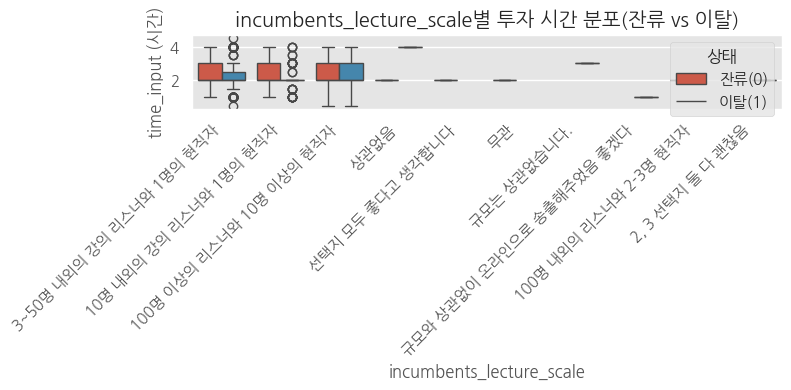

/tmp/ipykernel_6636/4273639836.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


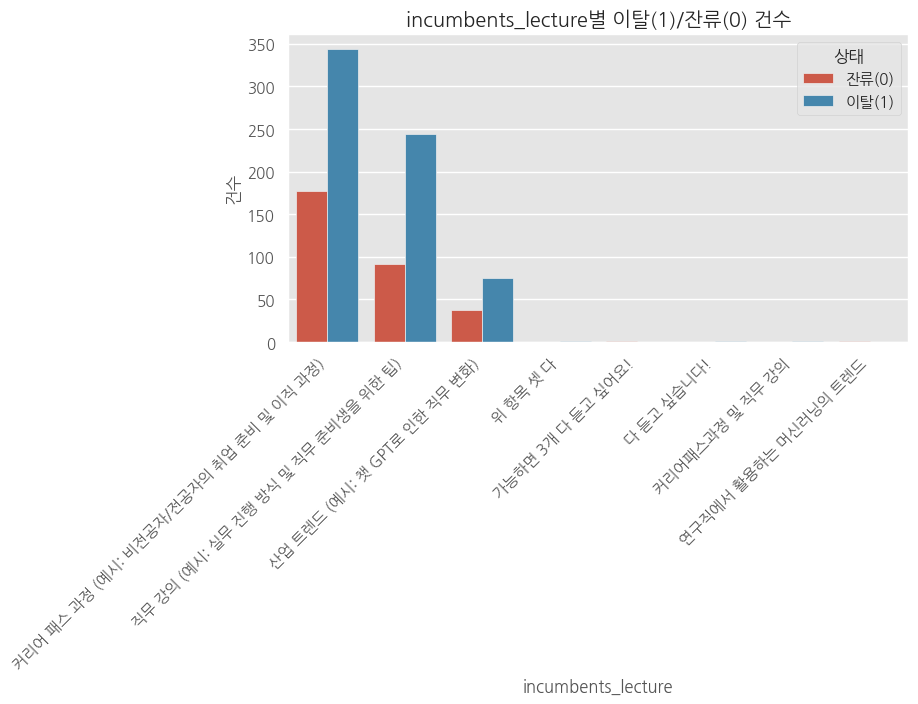

/tmp/ipykernel_6636/4273639836.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


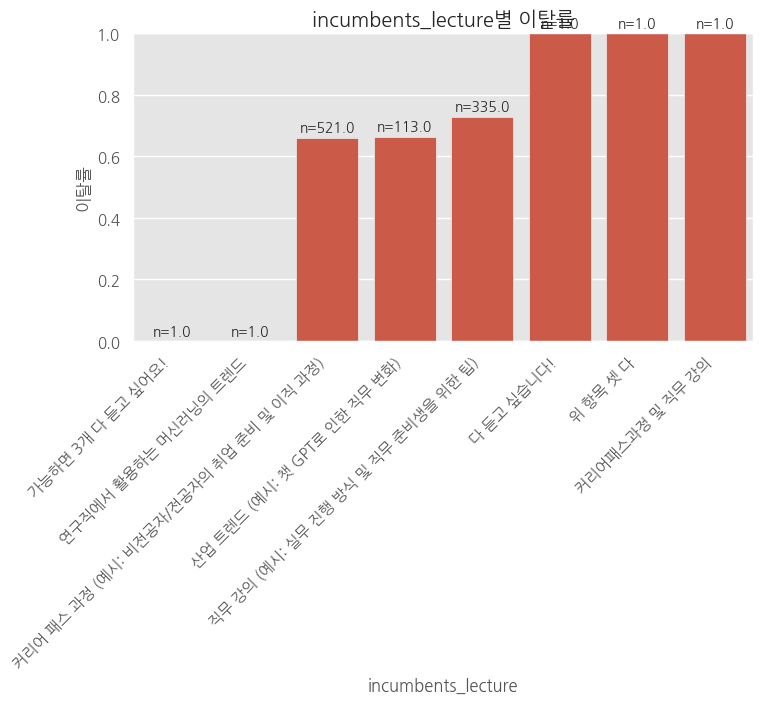

/tmp/ipykernel_6636/4273639836.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


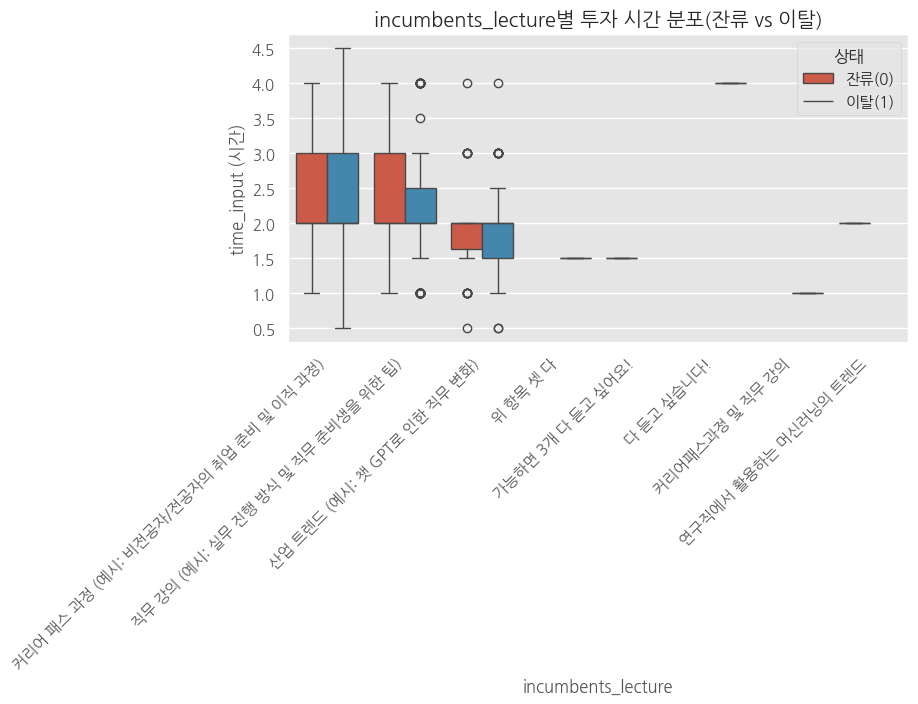

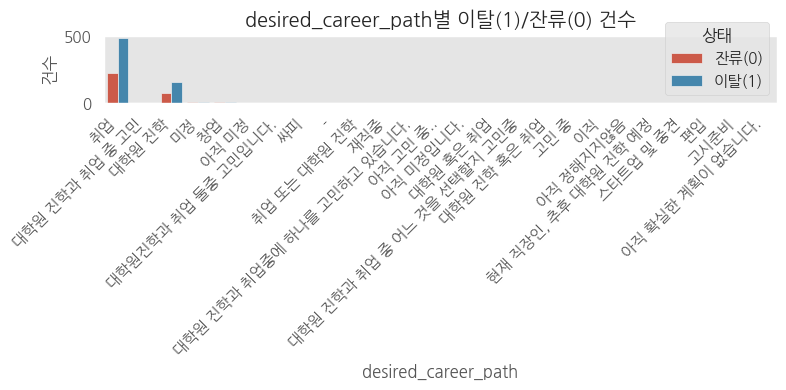

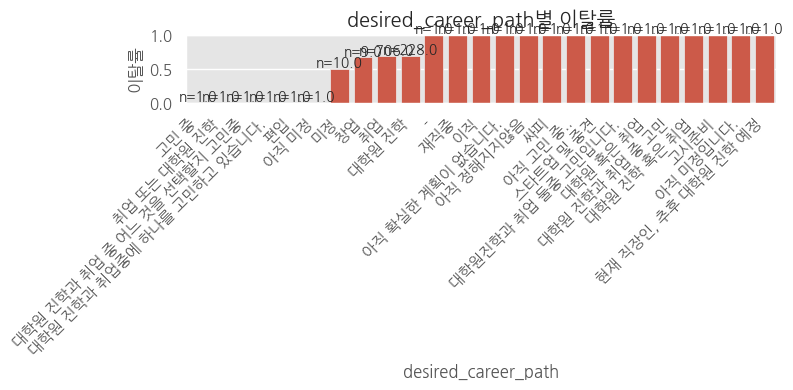

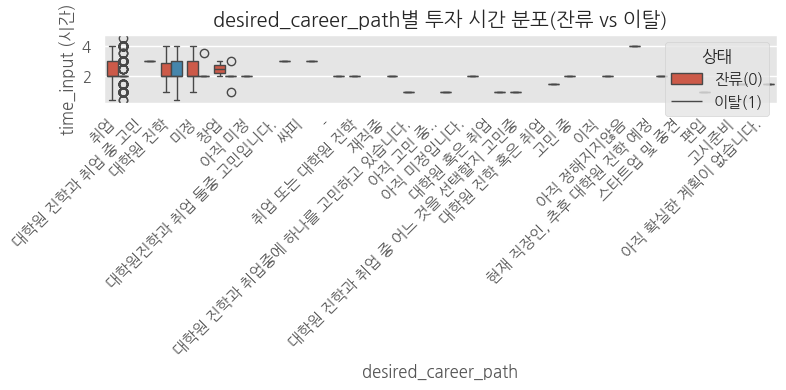

/tmp/ipykernel_6636/4273639836.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


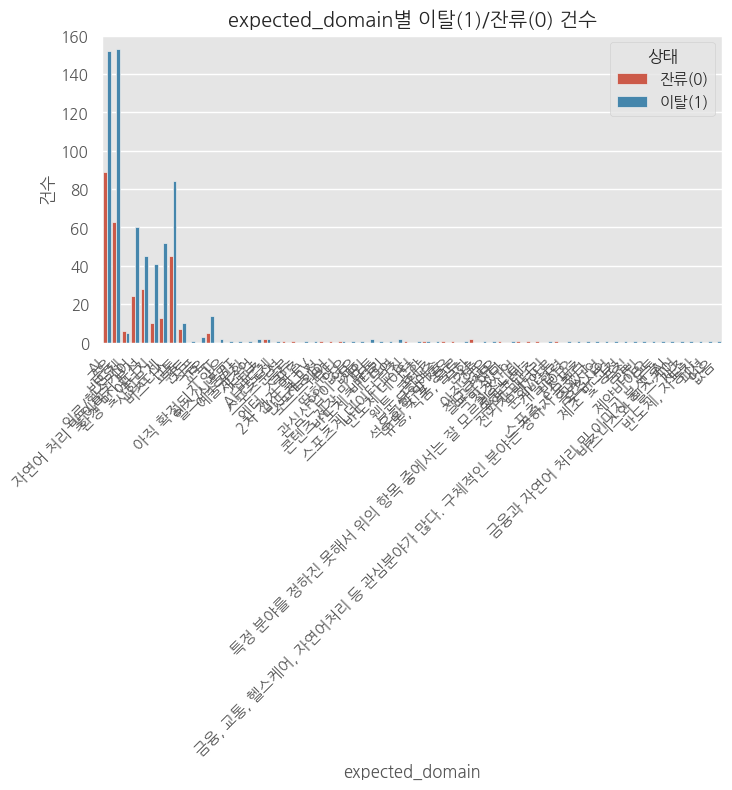

/tmp/ipykernel_6636/4273639836.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


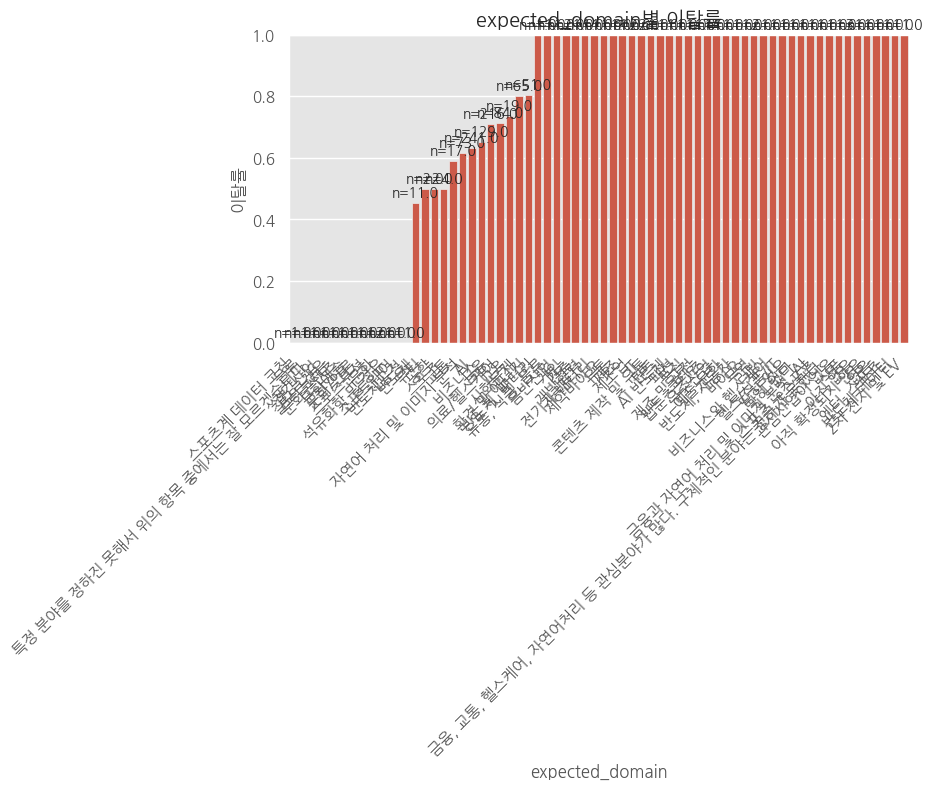

/tmp/ipykernel_6636/4273639836.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


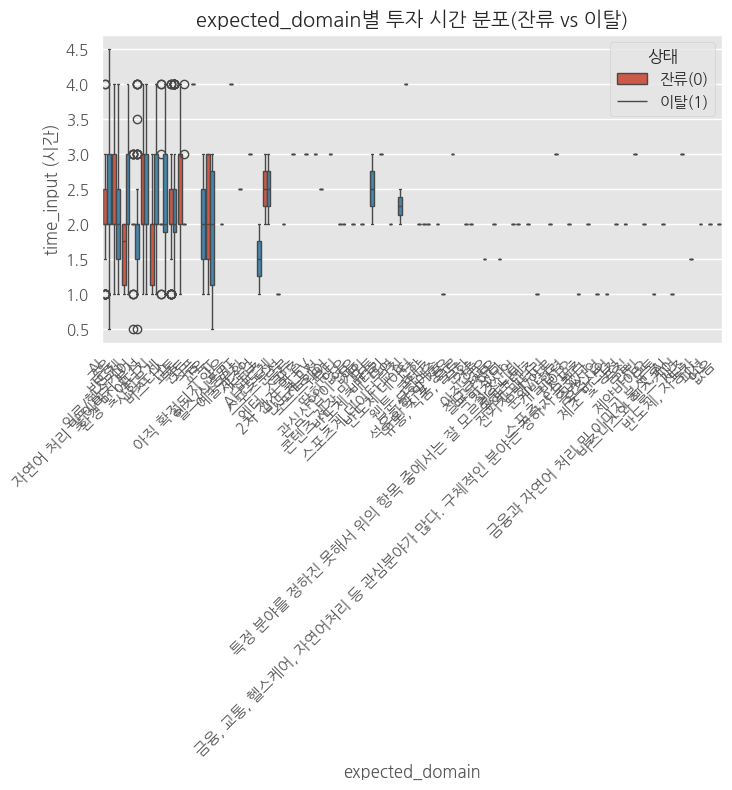

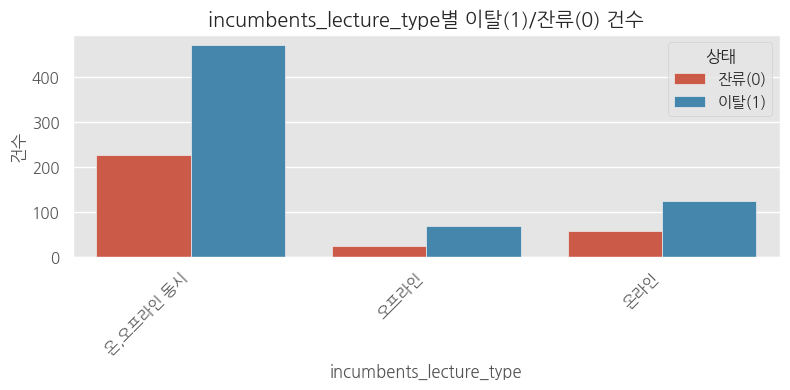

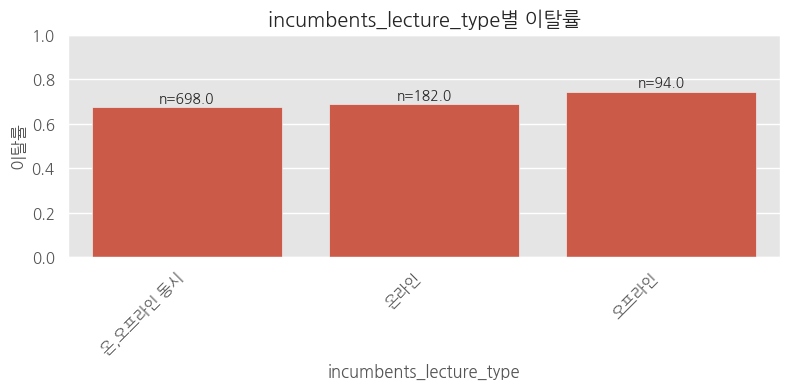

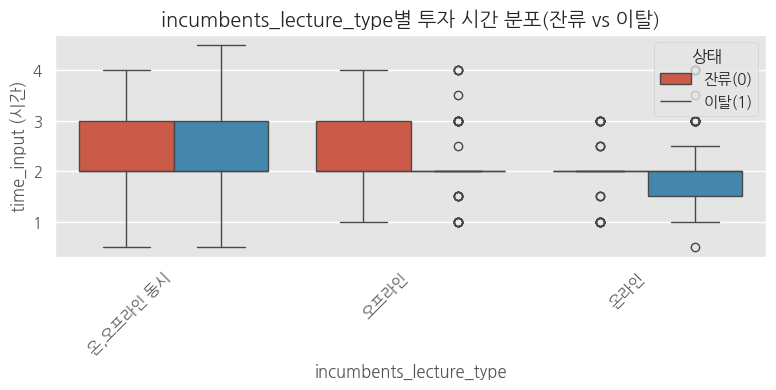

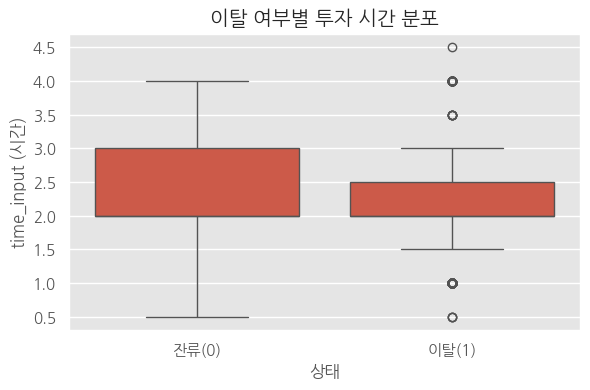

In [72]:
# 2) 분석 대상 컬럼 정의
continuous_feat = "time_input"   # 가설⑦: 투자 시간
categorical_feats = [
    "job",                       
    "major type",                
    "completed_semester",        
    "major_data",                
    "whyBDA",                    
    "incumbents_lecture_scale",  
    "incumbents_lecture",        
    "desired_career_path",       
    "expected_domain",           
    "incumbents_lecture_type"    
]


# # 4) IQR 이상치 필터링 (원하면 주석 처리)
# Q1 = df[continuous_feat].quantile(0.25)
# Q3 = df[continuous_feat].quantile(0.75)
# IQR = Q3 - Q1
# lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
# df = df[(df[continuous_feat] >= lower) & (df[continuous_feat] <= upper)]

# 5) 범주형별 이탈자/잔류 수(countplot) & 이탈률(barplot)
for feat in categorical_feats:
    plt.figure(figsize=(8, 4))
    # (A) countplot: 카테고리별 이탈(1)/잔류(0) 건수
    sns.countplot(data=df, x=feat, hue="withdrawal")
    plt.title(f"{feat}별 이탈(1)/잔류(0) 건수")
    plt.xlabel(feat)
    plt.ylabel("건수")
    plt.legend(["잔류(0)", "이탈(1)"], title="상태")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    # (B) barplot: 카테고리별 이탈률
    stats = df.groupby(feat)["withdrawal"].agg(rate="mean", n="count").sort_values("rate")
    ax = sns.barplot(x=stats.index.astype(str), y="rate", data=stats)
    for i, (_, row) in enumerate(stats.iterrows()):
        ax.text(i, row.rate + 0.02, f"n={row.n}", ha="center")
    plt.title(f"{feat}별 이탈률")
    plt.xlabel(feat)
    plt.ylabel("이탈률")
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    # (C) boxplot: 카테고리별 투자 시간 분포, hue로 이탈/잔류 비교
    sns.boxplot(data=df, x=feat, y=continuous_feat, hue="withdrawal", showfliers=True)
    plt.title(f"{feat}별 투자 시간 분포(잔류 vs 이탈)")
    plt.xlabel(feat)
    plt.ylabel("time_input (시간)")
    plt.legend(["잔류(0)", "이탈(1)"], title="상태", loc="upper right")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 6) 연속형 전용: withdrawal 그룹별 투자시간 분포
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="withdrawal", y=continuous_feat, showfliers=True)
plt.title("이탈 여부별 투자 시간 분포")
plt.xlabel("상태")
plt.ylabel("time_input (시간)")
plt.xticks([0, 1], ["잔류(0)", "이탈(1)"])
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap  # 긴 레이블 줄바꿈용


# 2) 분석 대상 컬럼 정의
continuous_feat = "time_input"   # 가설⑦: 투자 시간
categorical_feats = [
    "job",
    "major type",
    "completed_semester",
    "major_data",
    "whyBDA",
    "incumbents_lecture_scale",
    "incumbents_lecture",
    "desired_career_path",
    "expected_domain",
    "incumbents_lecture_type"
]

# 3) 결측치 제거
df = df[[continuous_feat] + categorical_feats + ["withdrawal"]].dropna()

# 4) (선택) IQR 이상치 필터링
# Q1 = df[continuous_feat].quantile(0.25)
# Q3 = df[continuous_feat].quantile(0.75)
# IQR = Q3 - Q1
# lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
# df = df[(df[continuous_feat] >= lower) & (df[continuous_feat] <= upper)]

# 줄바꿈 폭 설정
wrap_width = 10

# 5) 범주형별 이탈자/잔류 수(countplot), 이탈률(barplot), 투자시간 분포(boxplot)
for feat in categorical_feats:
    # (A) countplot: 카테고리별 이탈(1)/잔류(0) 건수
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=feat, hue="withdrawal")
    plt.title(f"{feat}별 이탈(1)/잔류(0) 건수")
    plt.xlabel(feat)
    plt.ylabel("건수")
    plt.legend(["잔류(0)", "이탈(1)"], title="상태")

    # x축 레이블 줄바꿈 & 회전
    labels = [textwrap.fill(lbl.get_text(), wrap_width) for lbl in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # (B) barplot: 카테고리별 이탈률
    stats = df.groupby(feat)["withdrawal"] \
              .agg(rate="mean", n="count") \
              .sort_values("rate")
    wrapped_idx = [textwrap.fill(str(lbl), wrap_width) for lbl in stats.index]

    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x=wrapped_idx, y="rate", data=stats)
    for i, (_, row) in enumerate(stats.iterrows()):
        ax.text(i, row.rate + 0.02, f"n={row.n}", ha="center")
    plt.title(f"{feat}별 이탈률")
    plt.xlabel(feat)
    plt.ylabel("이탈률")
    plt.ylim(0, 1)
    ax.set_xticklabels(wrapped_idx, rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # (C) boxplot: 카테고리별 투자 시간 분포, hue로 이탈/잔류 비교
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(data=df, x=feat, y=continuous_feat, hue="withdrawal", showfliers=True)
    plt.title(f"{feat}별 투자 시간 분포 (잔류 vs 이탈)")
    plt.xlabel(feat)
    plt.ylabel("time_input (시간)")
    plt.legend(["잔류(0)", "이탈(1)"], title="상태", loc="upper right")

    # x축 레이블 줄바꿈 & 회전
    labels = [textwrap.fill(lbl.get_text(), wrap_width) for lbl in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 6) 연속형 전용: withdrawal 그룹별 투자시간 분포
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=df, x="withdrawal", y=continuous_feat, showfliers=True)
ax.set_xticklabels(["잔류(0)", "이탈(1)"])
plt.title("이탈 여부별 투자 시간 분포")
plt.xlabel("상태")
plt.ylabel("time_input (시간)")
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/combined.csv'

/tmp/ipykernel_6636/3743469643.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["잔류(0)", "이탈(1)"])
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:70: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:70: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  plt.tight_layout()
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:70: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:70: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from current font.
  plt.tight_layout()
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:70: UserWarning: Glyp

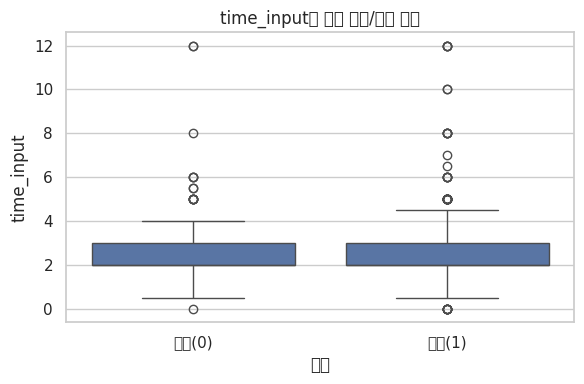

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  plt.tight_layout()
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarnin

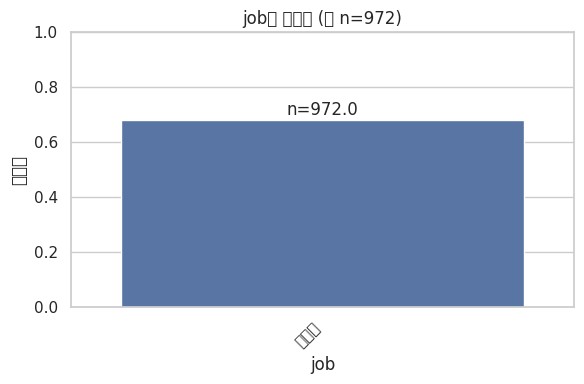

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 51060 (\N{HANGUL SYLLA

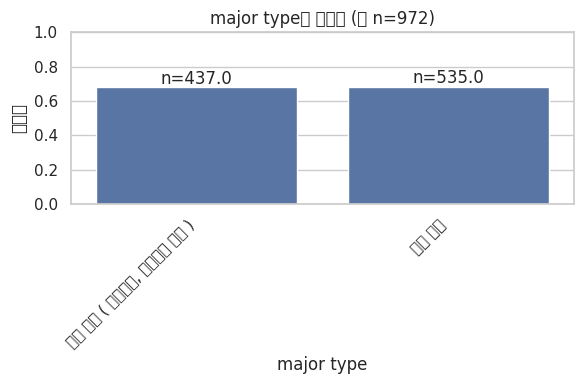

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE H

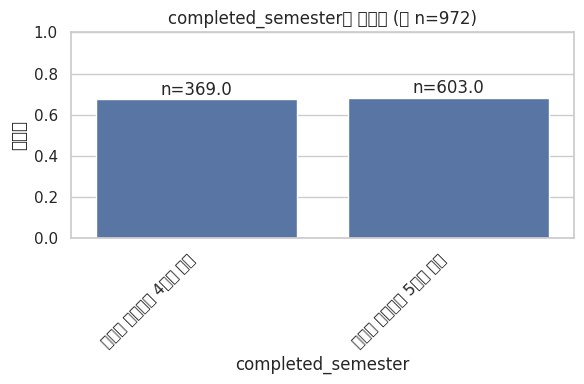

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  plt.tight_layout()
fi

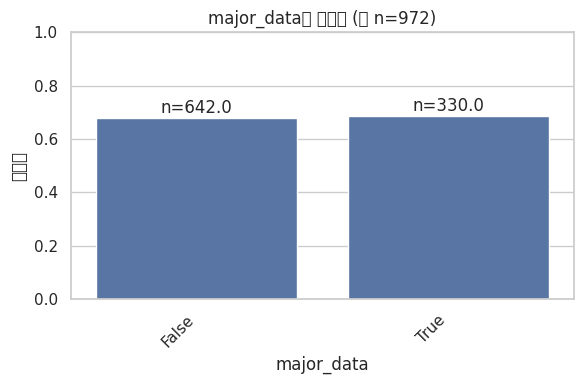

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 53372 (\N{HANGUL SYLLABLE KEUM}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 52964 (\N{HANGUL SYLLAB

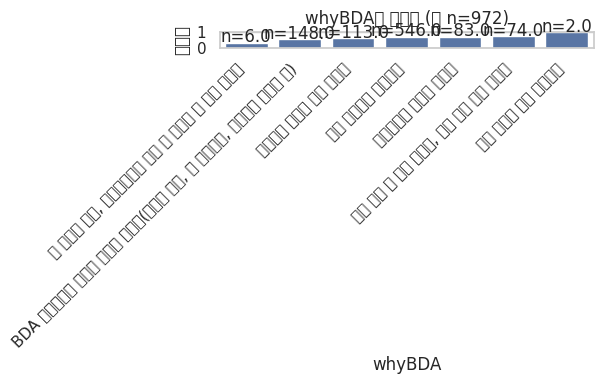

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 45320 (\N{HANGUL SYLLAB

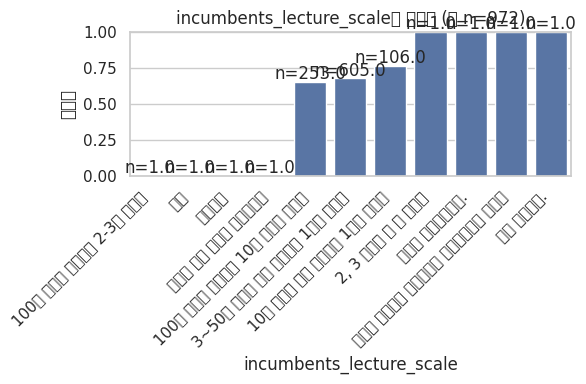

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 46307 (\N{HANGUL SYLLA

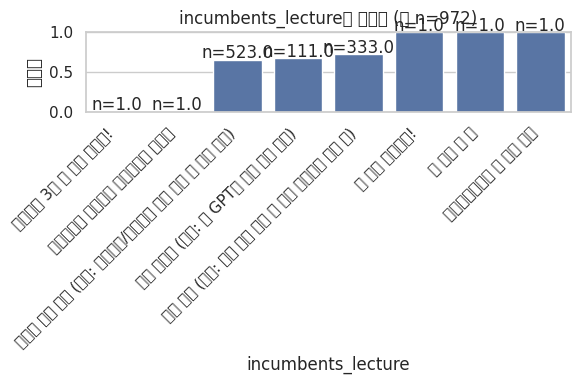

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:

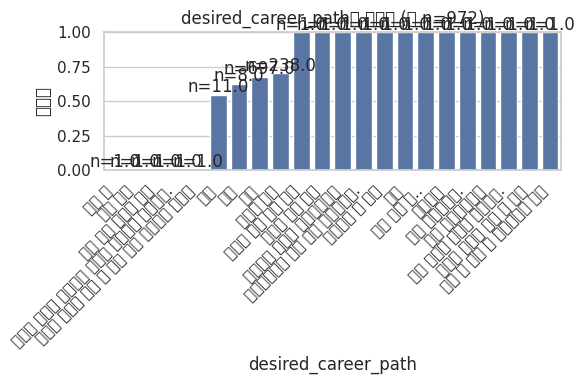

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from current font.
  plt.tight_layout()
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 50616 (\N{HANGUL SYLLABLE EON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 47200 (\N{HANGUL SYLLABLE RON}) missing from current font.
  plt.tight_layout()
findfont: Font family 'Malgun Go

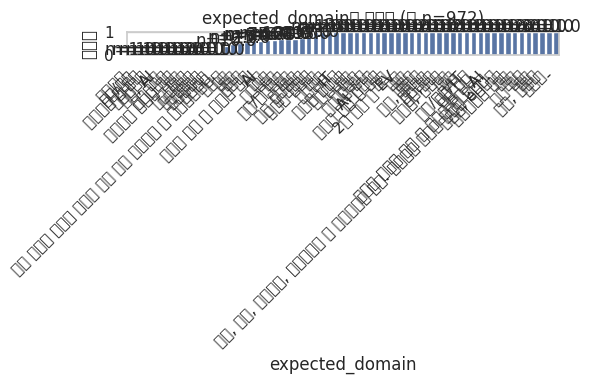

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_6636/3743469643.py:56: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE S

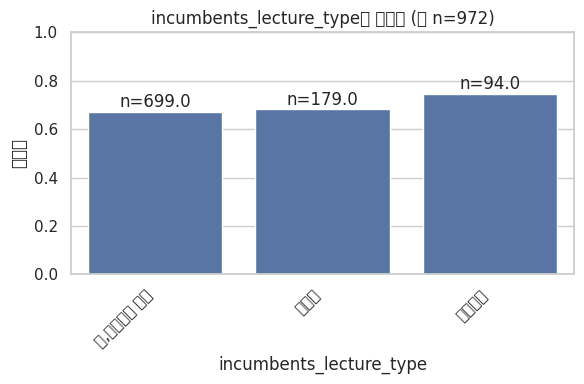

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
#    - combined.csv: 전처리 완료된 데이터 (train.csv → combined.csv)
df = pd.read_csv("train.csv")

# 2. 분석에 사용할 컬럼 정의 및 결측치 제거
features = {
    # 가설 1: 직업별 투자시간 차이 → 연속형
    "continuous": ["time_input"],
    # 가설 2~6,8: 범주형 변수별 이탈률 비교
    "categorical": [
        "job",                   # 가설① 직업
        "major type",            # 가설② 전공자/비전공자
        "completed_semester",    # 가설② 수강 학기
        "major_data",            # 가설③ 학구열 여부
        "whyBDA",                # 가설④ 강의 목적
        "incumbents_lecture_scale",  # 가설④ 강의 규모
        "incumbents_lecture",        # 가설④ 현직자 여부
        "desired_career_path",       # 가설⑤ 희망 진로 그룹
        "expected_domain",           # 가설⑥ 희망 직무 숙련도
        "incumbents_lecture_type"    # 가설⑧ 오프라인/온라인 여부
    ]
}
# 'withdrawal' 컬럼도 필요하므로 함께 포함
all_cols = features["continuous"] + features["categorical"] + ["withdrawal"]
# 결측치가 있는 행 제거
df = df[all_cols].dropna()

# 3. 시각화 스타일 설정
sns.set(style="whitegrid")
plt.rc("font", family="Malgun Gothic")  # 한글 폰트 설정 (Windows 기준)
plt.rcParams["axes.unicode_minus"] = False  # 음수 마이너스 깨짐 방지

# 4. 범주형 변수별 이탈률 막대그래프 함수
def plot_withdrawal_rate(feature):
    """
    feature별 이탈률(bar chart)과 그룹별 샘플 수를 출력
    """
    # 그룹별 이탈률(rate)과 샘플 수(n) 계산
    stats = df.groupby(feature)["withdrawal"].agg(rate="mean", n="count").sort_values("rate")
    # 차트 그리기
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=stats.index.astype(str), y="rate", data=stats)
    # 각 막대 위에 n값 표시
    for idx, (_, row) in enumerate(stats.iterrows()):
        ax.text(idx, row.rate + 0.02, f"n={row.n}", ha="center")
    # 제목 및 레이블
    plt.title(f"{feature}별 이탈률 (총 n={stats['n'].sum()})")
    plt.xlabel(feature)
    plt.ylabel("이탈률")
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 5. 연속형 변수별 이탈/잔류 박스플롯 함수
def plot_box_by_withdrawal(feature):
    """
    withdrawal(0/1) 그룹으로 나누어 feature 분포를 박스플롯으로 비교
    """
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x="withdrawal", y=feature, data=df, showfliers=True)
    ax.set_xticklabels(["잔류(0)", "이탈(1)"])
    plt.title(f"{feature}에 따른 이탈/잔류 분포")
    plt.xlabel("그룹")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# 6. 가설별 시각화 실행
# 6-1. 연속형: 투자 시간
for feat in features["continuous"]:
    plot_box_by_withdrawal(feat)

# 6-2. 범주형: 가설 ②~⑥,⑧
for feat in features["categorical"]:
    plot_withdrawal_rate(feat)


In [19]:
test.columns

Index(['major_data', 'withdrawal', 'is_double_major',
       'major_field_IT (컴퓨터 공학 포함)', 'major_field_IT (컴퓨터 공학 포함), 경영학',
       'major_field_IT (컴퓨터 공학 포함), 경제통상학',
       'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
       'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
       'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
       'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
       'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
       'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
       'major_field_기타', 'major_field_사회과학', 'major_field_사회과학, 인문학',
       'major_field_인문학', 'major_field_자연과학', 'major_field_자연과학, 사회과학',
       'job_대학생', 'job_대학원생', 'job_직장인', 'job_취준생', 'sentiment_score',
       'except_job_개발/AI/R&D', 'except_job_경영/회계', 'except_job_공공기관',
       'except_job_금융', 'except_job_기타', 'except_job_기획/전략', 'except_job_마케팅',
       'except_job_물류/무역', 'except_job_바이오', 'except_job_없음', 'ex

In [12]:
train.nationality

0       내국인
1       내국인
2       내국인
3       내국인
4       내국인
       ... 
1051    내국인
1052    내국인
1053    내국인
1054    내국인
1055    내국인
Name: nationality, Length: 1056, dtype: object

In [18]:
train.what_to_gain.value_counts()

what_to_gain
데이터 분석 역량           684
프로젝트 경험             215
공모전 경험               99
인적 네트워크              42
위 4항목 전부              1
모두                    1
공모전, 프로젝트 경험 둘 다      1
자격증 공부                1
파이썬 실력                1
Name: count, dtype: int64

In [ ]:
train.inflow_route.groupby(['withdrawal'])['']

KeyError: 'withdrawal'

In [ ]:
train.columns

시각화 진행 --> 진행하면서 이상치 같은거 어떻게 제거 -> 전처리 과정에서 필요한 데이터 가설 설정

라벨 임베딩으로 진행하지 않았음. 순서나 크기가 있다..? 라고 생각하기엔 애매하다고 생각했음.

1. 직업에 따라서 투자하는 시간이 다를 것이다. / job
2. 전공자와 비전공자는 차이가 있을 것이다. / major type / completed_semester
3. 학구열에 따른 이탈율이 있을 것이다. / major_data, is_dulble
4. 아는 만큼 배우자 하는 강의가 다를 것이다. / 아예 처음 배우면 -> c언어를 배우고 싶어요. | 조금이라도 안다면 머신러닝,딥러닝을 배우고 싶어요.  incumbents_lecture_scale, whyBDA, incumbents_lecture 
5. 나아가고자 하는 방향에 따라서 이탈률은 다를 것이다. / Career Group
6. 미래의 원하는 직업에 희망하는 숙련도에 따라서 이탈률이 다를 것이다. / expected_domain 
7. 투자하고자 하는 시간에 따라서 이탈률 차이가 있을 거 같다. / input_time
8. 오프라인이 좀더 이탈률이 적을거 같다/ incumbents_lecture_type



'major type', 'major1_1', 'major1_2', 'major_data', 'job',

"""

추가로 지운거
nationality -> 외국인 4개라서
inflow_route -> 인스타그램
onedayclass_topic

"""

Index(['ID', 'major type', 'major1_1', 'major1_2', 'major_data', 'job',
       're_registration', 'nationality', 'inflow_route', 'whyBDA',
       'what_to_gain', 'hope_for_group', 'major_field', 'desired_career_path',
       'completed_semester', 'project_type', 'time_input', 'desired_job',
       'certificate_acquisition', 'desired_certificate',
       'certificate_study_period', 'desired_job_except_data',
       'incumbents_level', 'incumbents_lecture', 'incumbents_company_level',
       'incumbents_lecture_type', 'incumbents_lecture_scale',
       'incumbents_lecture_scale_reason', 'interested_company',
       'expected_domain', 'onedayclass_topic', 'withdrawal'],
      dtype='object')

In [8]:
train.major_data

0       False
1       False
2        True
3        True
4       False
        ...  
1051    False
1052     True
1053    False
1054    False
1055    False
Name: major_data, Length: 1056, dtype: bool

In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1056 non-null   object 
 1   generation                       1056 non-null   int64  
 2   school1                          1056 non-null   object 
 3   major type                       1049 non-null   object 
 4   major1_1                         1051 non-null   object 
 5   major1_2                         493 non-null    object 
 6   major_data                       1056 non-null   bool   
 7   job                              1056 non-null   object 
 8   class1                           1056 non-null   int64  
 9   class2                           101 non-null    float64
 10  class3                           2 non-null      float64
 11  class4                           1 non-null      float64
 12  re_registration     

In [77]:
train

ID  generation  \
0     TRAIN_0000           8   
1     TRAIN_0001           8   
2     TRAIN_0002           8   
3     TRAIN_0003           8   
4     TRAIN_0004           8   
...          ...         ...   
1051  TRAIN_1051           8   
1052  TRAIN_1052           8   
1053  TRAIN_1053           8   
1054  TRAIN_1054           8   
1055  TRAIN_1055           8   

                                                school1  \
0     3e0057be3ecde495d1d6aab0bdc3092cce94440a6a4f68...   
1     c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...   
2     1ed9296bd2a05ea36fabb5171a003b7320bb21a53d6135...   
3     5ec50ef5a0c0416652f8d67a89ef4c02eb0c6a61b5d0a8...   
4     c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...   
...                                                 ...   
1051  3e0057be3ecde495d1d6aab0bdc3092cce94440a6a4f68...   
1052  e48a4a96d49a77abaebbe5ea399f1b98d31d7075b11844...   
1053  b6abc82e31329cea19b6cce7783b27a3a90637c403db8e...   
1054  1ed9296bd2a05ea36fabb5171a003b7320bb21a53d6135...   
1055  f9b3fde8c9af1daccfab54aa9c3d803bbac0ccf04a7080...   

                   major type       major1_1       major1_2  major_data  job  \
0                       단일 전공  IT(컴퓨터 공학 포함)            NaN       False  대학생   
1     복수 전공 ( 다중전공, 이중전공 포함 )  IT(컴퓨터 공학 포함)  IT(컴퓨터 공학 포함)       False  대학생   
2                       단일 전공  IT(컴퓨터 공학 포함)            NaN        True  대학생   
3                       단일 전공  IT(컴퓨터 공학 포함)            NaN        True  대학생   
4     복수 전공 ( 다중전공, 이중전공 포함 )  IT(컴퓨터 공학 포함)  IT(컴퓨터 공학 포함)       False  대학생   
...                       ...            ...            ...         ...  ...   
1051  복수 전공 ( 다중전공, 이중전공 포함 )          경제통상학  IT(컴퓨터 공학 포함)       False  대학생   
1052                    단일 전공  IT(컴퓨터 공학 포함)            NaN        True  대학생   
1053  복수 전공 ( 다중전공, 이중전공 포함 )            경영학            인문학       False  대학생   
1054                    단일 전공           사회과학            NaN       False  대학생   
1055  복수 전공 ( 다중전공, 이중전공 포함 )           사회과학           자연과학       False  대학생   

      class1  class2  ...   incumbents_company_level  incumbents_lecture_type  \
0          4     NaN  ...  국내 대기업 IT 계열 (금융, 제조 ...)                온,오프라인 동시   
1          4     NaN  ...     국내 빅테크 IT 계열 (네카쿠라배당토)                온,오프라인 동시   
2          4     NaN  ...  국내 대기업 IT 계열 (금융, 제조 ...)                온,오프라인 동시   
3          7     NaN  ...     국내 빅테크 IT 계열 (네카쿠라배당토)                온,오프라인 동시   
4          7     NaN  ...  국내 대기업 IT 계열 (금융, 제조 ...)                     오프라인   
...      ...     ...  ...                        ...                      ...   
1051       1     NaN  ...  국내 대기업 IT 계열 (금융, 제조 ...)                온,오프라인 동시   
1052       7     NaN  ...  국내 대기업 IT 계열 (금융, 제조 ...)                온,오프라인 동시   
1053       1     NaN  ...  국내 대기업 IT 계열 (금융, 제조 ...)                      온라인   
1054       4     NaN  ...     국내 빅테크 IT 계열 (네카쿠라배당토)                온,오프라인 동시   
1055       8     NaN  ...  국내 대기업 IT 계열 (금융, 제조 ...)                온,오프라인 동시   

       incumbents_lecture_scale  \
0     3~50명 내외의 강의 리스너와 1명의 현직자   
1       10명 내외의 강의 리스너와 1명의 현직자   
2     3~50명 내외의 강의 리스너와 1명의 현직자   
3     3~50명 내외의 강의 리스너와 1명의 현직자   
4     100명 이상의 리스너와 10명 이상의 현직자   
...                         ...   
1051  3~50명 내외의 강의 리스너와 1명의 현직자   
1052  3~50명 내외의 강의 리스너와 1명의 현직자   
1053  3~50명 내외의 강의 리스너와 1명의 현직자   
1054  3~50명 내외의 강의 리스너와 1명의 현직자   
1055  3~50명 내외의 강의 리스너와 1명의 현직자   

                        incumbents_lecture_scale_reason   interested_company  \
0                            인원이 너무 많지 않아야 편하게 들을 수 있어서            삼성이나 하이닉스   
1                            인원이 적어야 집중할 수 있고 질문 하기 쉽다.                  네이버   
2              너무 소수인원은 조금 부담스럽고 너무 많은 인원은 집중도가 떨어질거같아서             스포츠분석 기업   
3                      너무 많은 인원이 있을 경우 집중도가 떨어질 거 같습니다.                   토스   
4                                  많은 현직자분들의 이야기를 듣고싶어서              네이버 카카오   
...                                                 ...                  ...   
1051 

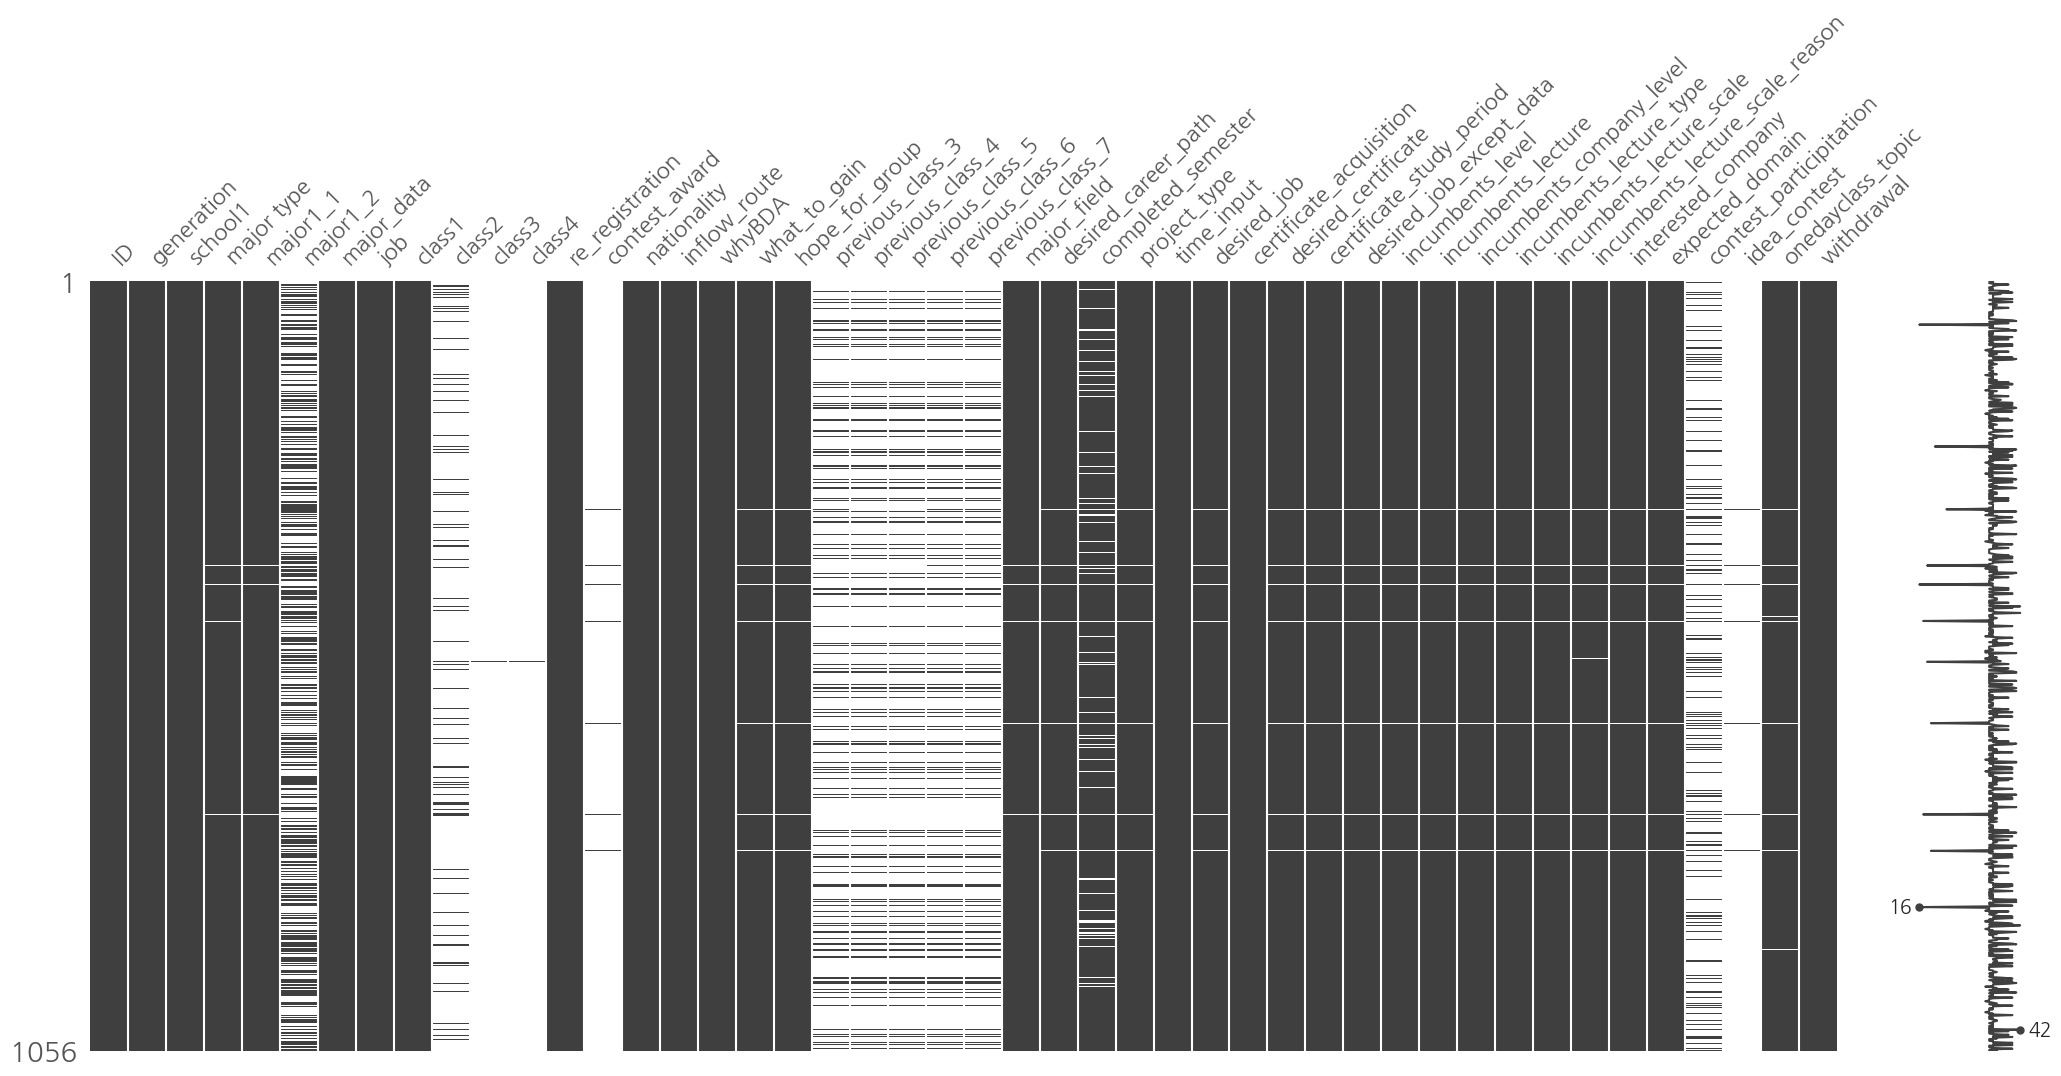

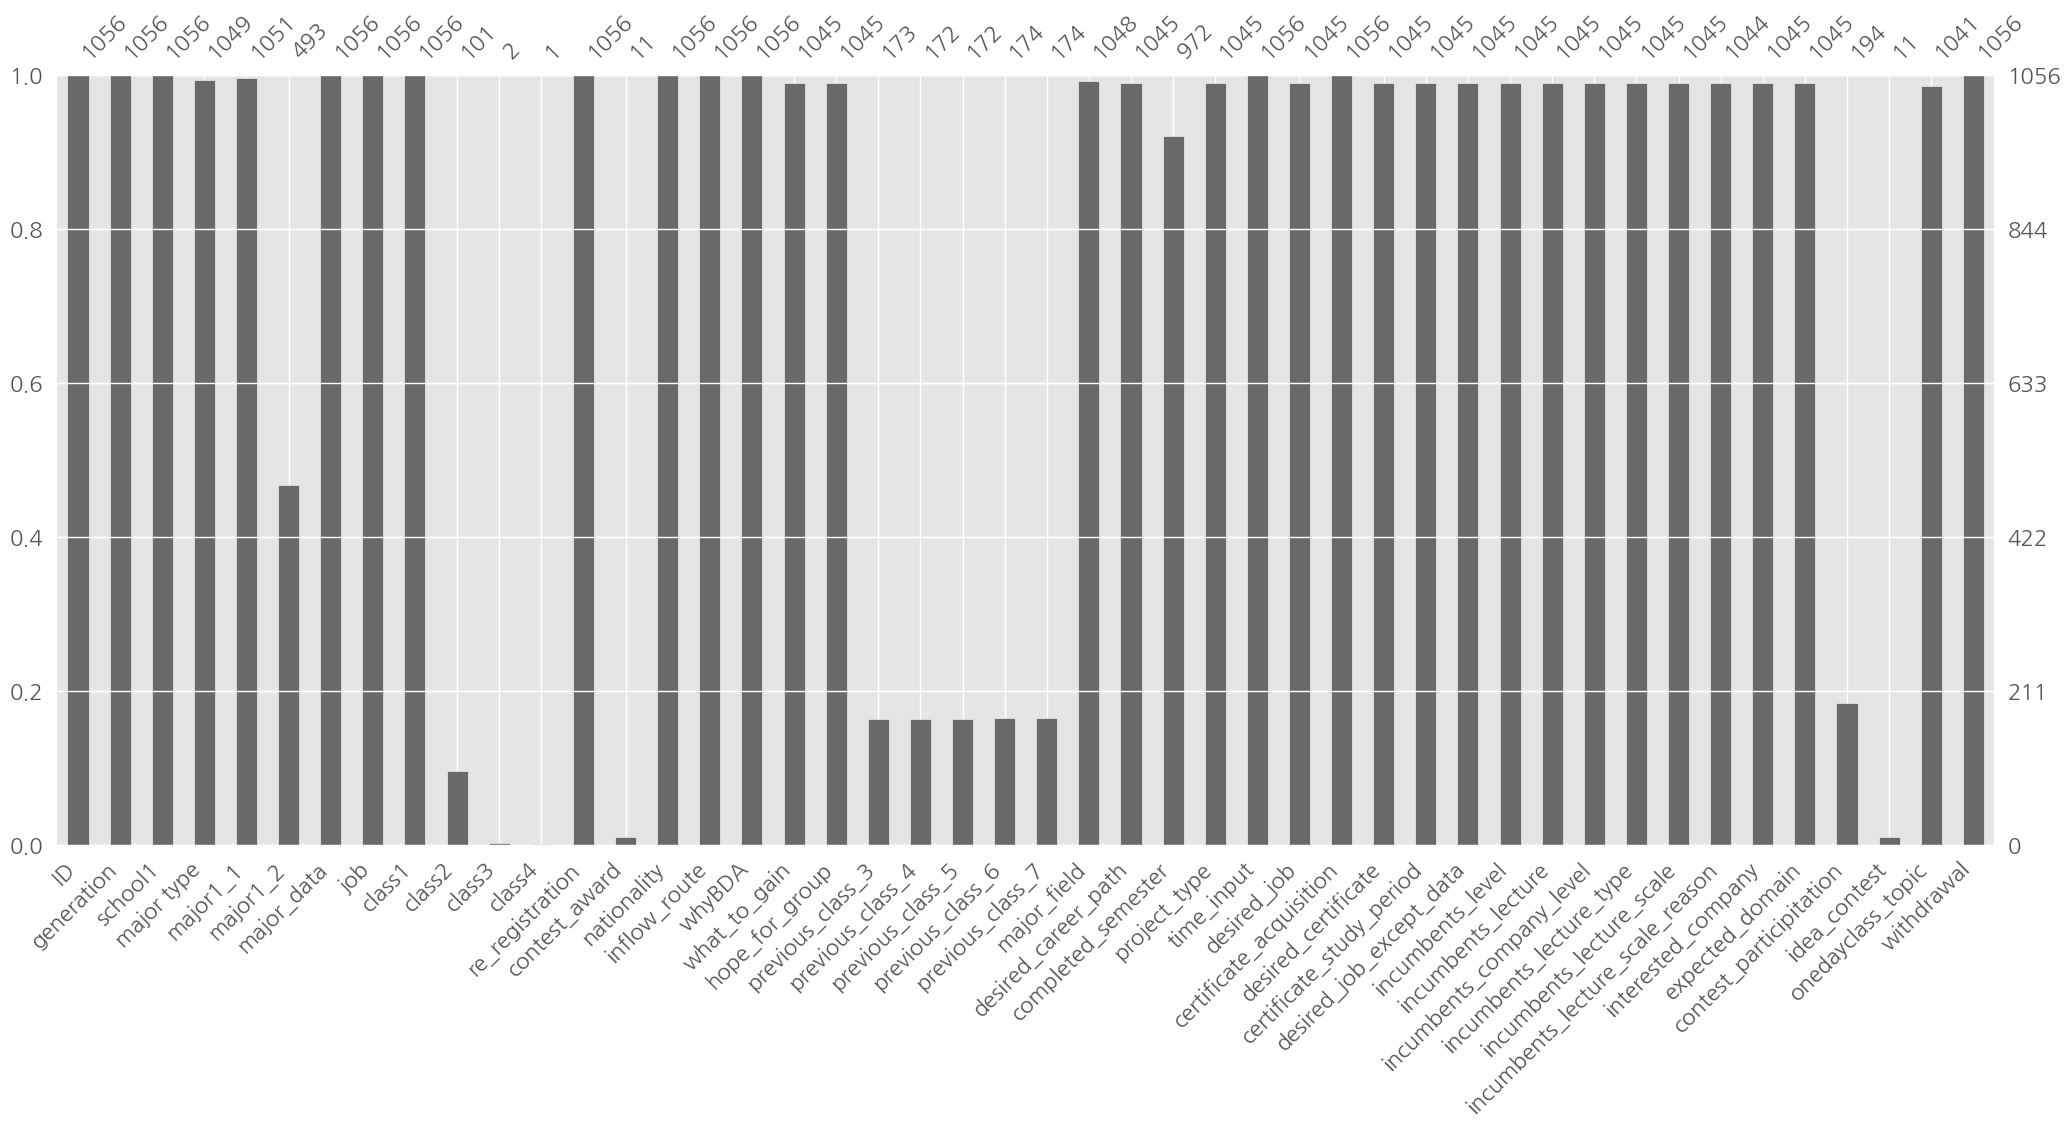

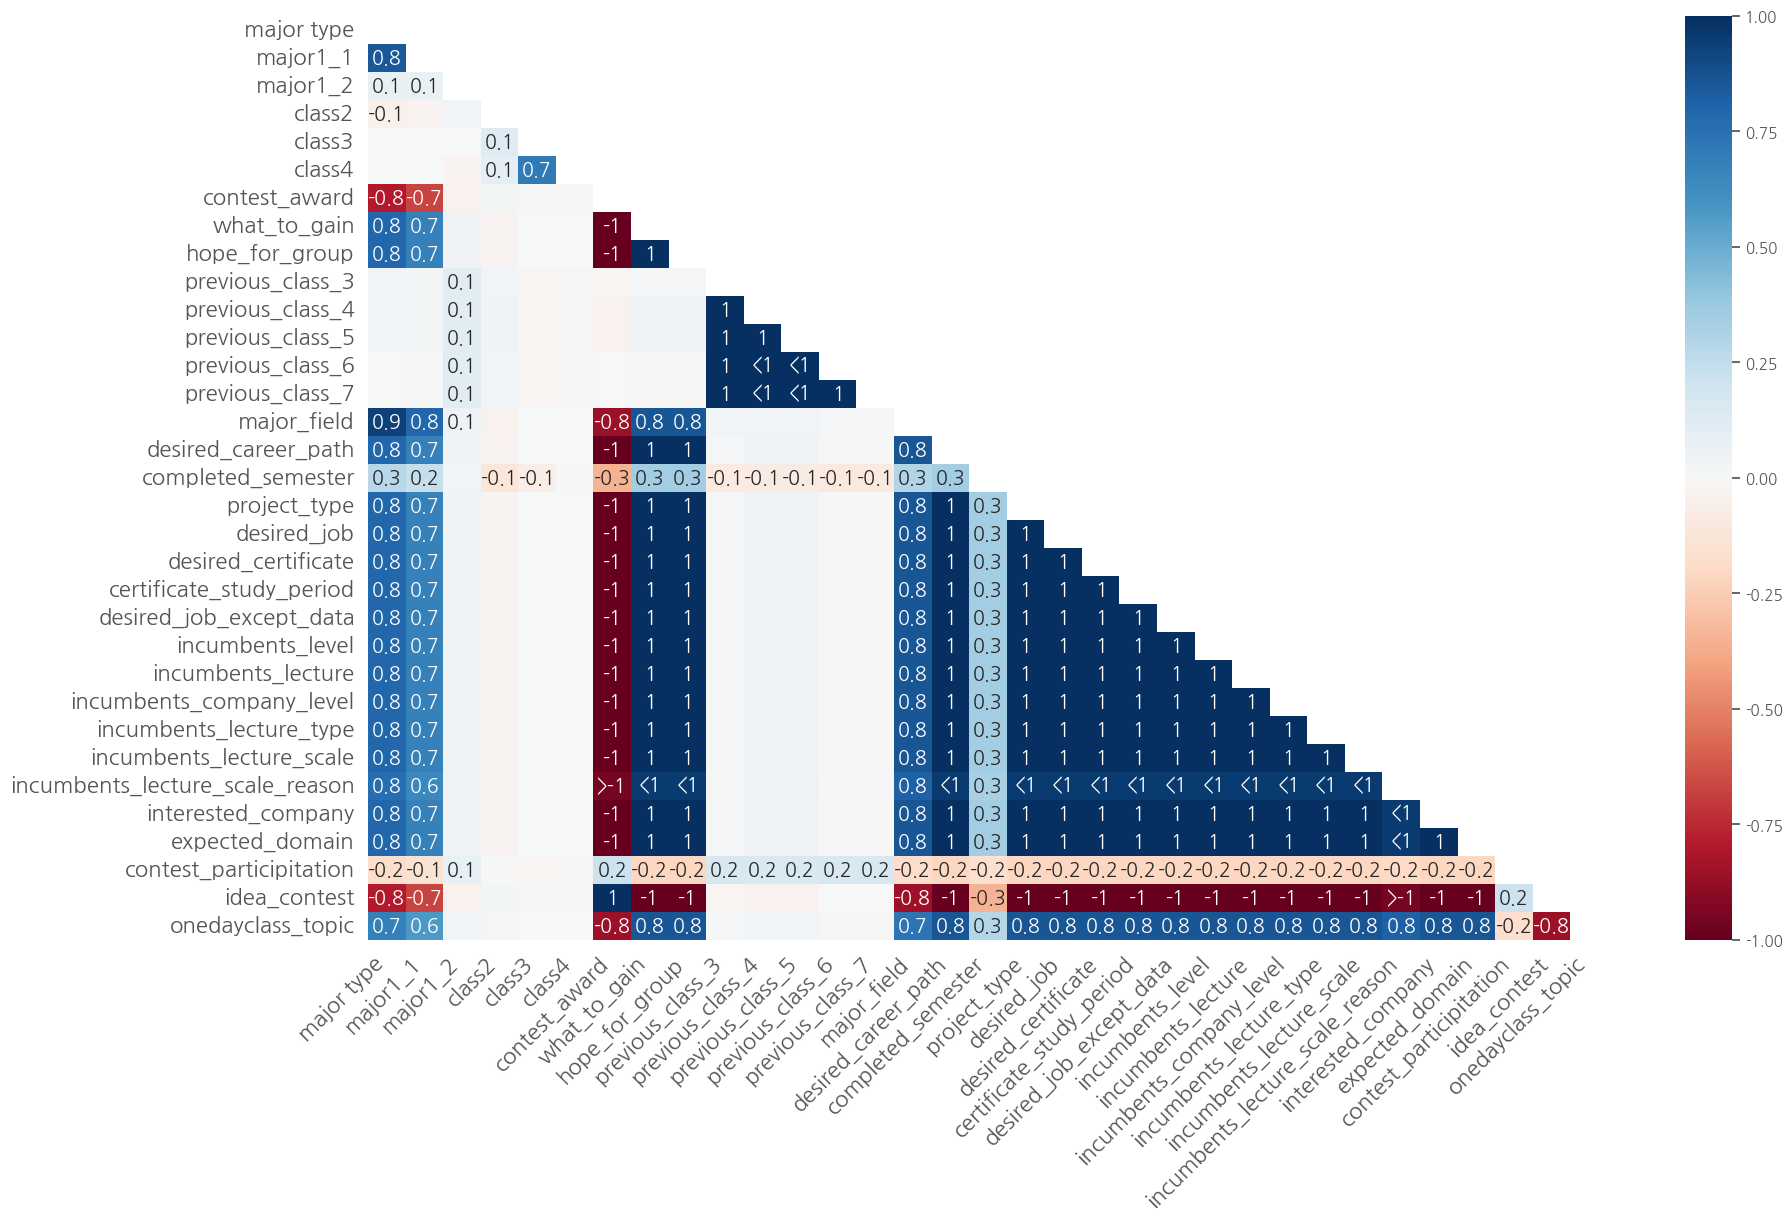

In [78]:
import missingno as msno
import matplotlib.pyplot as plt

# 전체 결측치 matrix 시각화
msno.matrix(train_df)
plt.show()

# 결측치 비율이 높은 순으로 barplot
msno.bar(train_df)
plt.show()

# 결측치 상관 관계 히트맵
msno.heatmap(train_df)
plt.show()


In [20]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [5]:
train.contest_award                      

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1051    NaN
1052    NaN
1053    NaN
1054    NaN
1055    NaN
Name: contest_award, Length: 1056, dtype: object

In [6]:
train.isnull().sum()

ID                                    0
generation                            0
school1                               0
major type                            7
major1_1                              5
major1_2                            563
major_data                            0
job                                   0
class1                                0
class2                              955
class3                             1054
class4                             1055
re_registration                       0
contest_award                      1045
nationality                           0
inflow_route                          0
whyBDA                                0
what_to_gain                         11
hope_for_group                       11
previous_class_3                    883
previous_class_4                    884
previous_class_5                    884
previous_class_6                    882
previous_class_7                    882
major_field                           8


In [7]:
train_df = train.copy()

# 결측치 기반으로 필요 없는 것 
- generation -> 분반
- school1  -> 암호화 되있어서 사용 안됨
- idea_contest   -> 하고 싶은 대회 컨셉 (결측치가 너무 많음 1023개)                     
- previous_class_3 ~7 -> 분반 (수강 클래스가)
- class 3 ~ 7  -> 분반
- contest_award,contest_participitation  -> 대다수 데이터 X     
- inflow_route -> 유입경로

In [3]:
test_df = test.copy()

In [ ]:
# 결측치 기반으로 필요 없는 것 
- generation -> 분반
- school1  -> 암호화 되있어서 사용 안됨
- idea_contest   -> 하고 싶은 대회 컨셉 (결측치가 너무 많음 1023개)                     
- previous_class_3 ~7 -> 분반 (수강 클래스가)
- class 3 ~ 7  -> 분반
- contest_award,contest_participitation  -> 대다수 데이터 X     
- inflow_route -> 유입경로

columns_to_drop = [
    'generation',
    'school1',
    'idea_contest',
    'previous_class_3', 'previous_class_4', 'previous_class_5', 'previous_class_6', 'previous_class_7',
    'class1', 'class2', 'class3', 'class4',
    'contest_award', 'contest_participitation'
]

# 해당 컬럼 삭제
train_df.drop(columns=columns_to_drop,inplace=True)
test_df.drop(columns=columns_to_drop,inplace=True)

In [11]:
train_df.columns

Index(['ID', 'major type', 'major1_1', 'major1_2', 'major_data', 'job',
       're_registration', 'nationality', 'inflow_route', 'whyBDA',
       'what_to_gain', 'hope_for_group', 'major_field', 'desired_career_path',
       'completed_semester', 'project_type', 'time_input', 'desired_job',
       'certificate_acquisition', 'desired_certificate',
       'certificate_study_period', 'desired_job_except_data',
       'incumbents_level', 'incumbents_lecture', 'incumbents_company_level',
       'incumbents_lecture_type', 'incumbents_lecture_scale',
       'incumbents_lecture_scale_reason', 'interested_company',
       'expected_domain', 'onedayclass_topic', 'withdrawal'],
      dtype='object')

In [10]:
train_df['incumbents_lecture_scale_reason'].isnull().sum()

np.int64(12)

In [11]:
train_df.major_field

0              공학 (컴퓨터 공학 제외)
1              IT (컴퓨터 공학 포함)
2              IT (컴퓨터 공학 포함)
3                        자연과학
4         IT (컴퓨터 공학 포함), 인문학
                ...          
1051    IT (컴퓨터 공학 포함), 경제통상학
1052           IT (컴퓨터 공학 포함)
1053                경영학, 사회과학
1054                     사회과학
1055                경영학, 사회과학
Name: major_field, Length: 1056, dtype: object

In [12]:
train_df.job.unique()

array(['대학생', '취준생', '직장인', '대학원생'], dtype=object)

# 순서대로 인코딩 진행
전공 관련 데이터

In [13]:
train_df.withdrawal.value_counts(normalize=True)

withdrawal
1    0.691288
0    0.308712
Name: proportion, dtype: float64

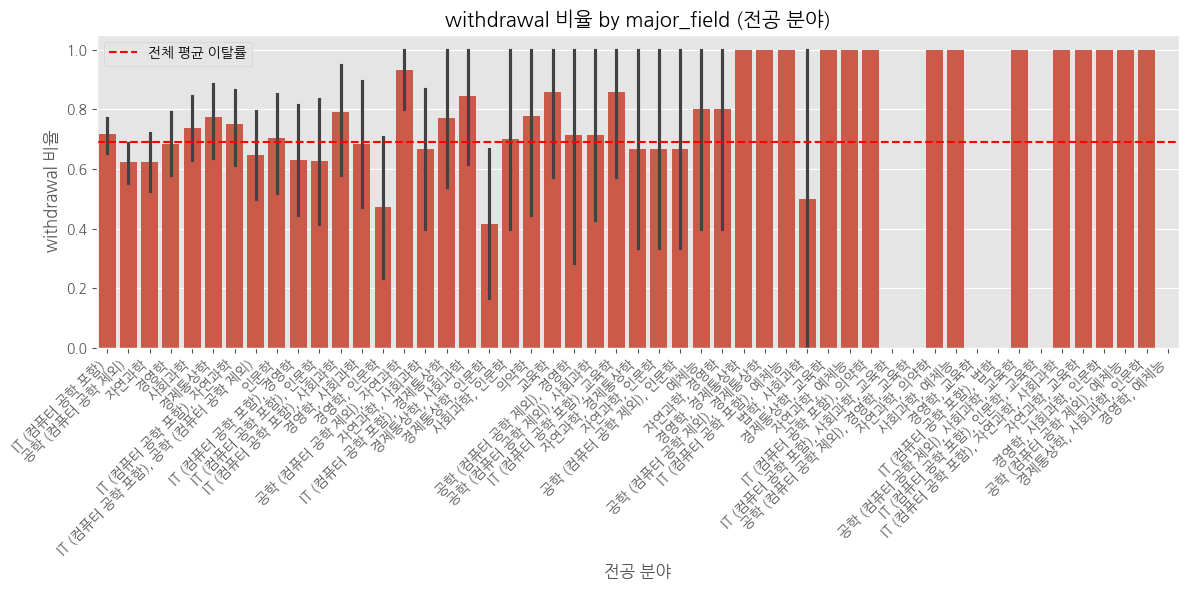

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 6))
order = train_df['major_field'].value_counts().index  # 빈도순 정렬


sns.barplot(data=train_df, x='major_field', y='withdrawal', order=order)
plt.xticks(rotation=45, ha='right')
plt.title("withdrawal 비율 by major_field (전공 분야)")
plt.ylabel("withdrawal 비율")
plt.xlabel("전공 분야")
plt.axhline(0.69, color='red', linestyle='--', label='전체 평균 이탈률')
plt.legend()
plt.tight_layout()
plt.show()

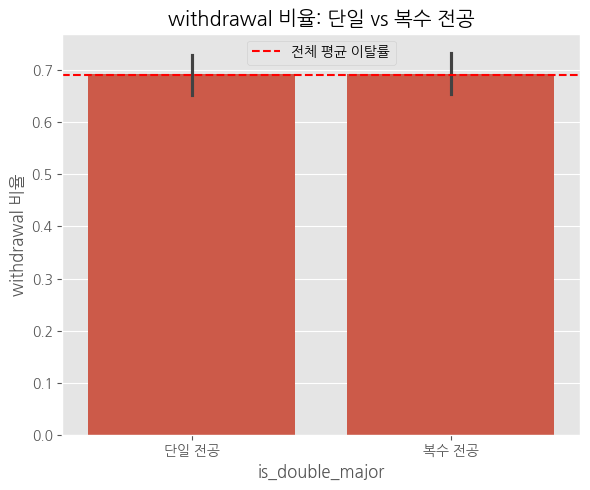

In [15]:
# 먼저 복수 전공 여부 컬럼 생성
train_df['is_double_major'] = train_df['major1_2'].notna().astype(int) # notna() -> 누락값 확인 없 -> f

plt.figure(figsize=(6, 5))
sns.barplot(data=train_df, x='is_double_major', y='withdrawal')
plt.xticks([0, 1], ['단일 전공', '복수 전공'])
plt.title("withdrawal 비율: 단일 vs 복수 전공")
plt.ylabel("withdrawal 비율")
plt.axhline(0.69, color='red', linestyle='--', label='전체 평균 이탈률')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
summary = train_df.groupby(['major_field', 'is_double_major'])['withdrawal'].agg(['count', 'mean']).reset_index()
summary.sort_values(by='count', ascending=False)

major_field  is_double_major  count      mean
0             IT (컴퓨터 공학 포함)                0    161  0.701863
36            공학 (컴퓨터 공학 제외)                0    142  0.612676
61                      자연과학                0     67  0.671642
20                       경영학                0     59  0.711864
18      IT (컴퓨터 공학 포함), 자연과학                1     42  0.761905
..                       ...              ...    ...       ...
44       공학 (컴퓨터 공학 제외), 예체능                1      1  1.000000
40  공학 (컴퓨터 공학 제외), 경영학, 교육학                1      1  0.000000
58                       의약학                1      1  1.000000
65                 자연과학, 교육학                1      1  1.000000
68                 자연과학, 의약학                0      1  1.000000

[70 rows x 4 columns]

In [17]:
train_df['major type'].unique()

array(['단일 전공', '복수 전공 ( 다중전공, 이중전공 포함 )', nan], dtype=object)

In [18]:
train_df['major_field'].value_counts()

major_field
IT (컴퓨터 공학 포함)                    202
공학 (컴퓨터 공학 제외)                    183
자연과학                               93
경영학                                76
사회과학                               65
경제통상학                              44
IT (컴퓨터 공학 포함), 자연과학               44
IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)     34
인문학                                27
IT (컴퓨터 공학 포함), 경영학                27
IT (컴퓨터 공학 포함), 인문학                24
IT (컴퓨터 공학 포함), 사회과학               19
경영학, 사회과학                          19
경영학, 인문학                           17
공학 (컴퓨터 공학 제외), 자연과학               15
자연과학, 사회과학                         15
IT (컴퓨터 공학 포함), 경제통상학              13
경제통상학, 사회과학                        13
경제통상학, 인문학                         12
사회과학, 인문학                          10
의약학                                 9
교육학                                 7
공학 (컴퓨터 공학 제외), 경영학                 7
공학 (컴퓨터 공학 제외), 사회과학                7
IT (컴퓨터 공학 포함), 교육학                 7
자연과학, 경제통상학                         6


In [19]:
train_df.is_double_major

0       0
1       1
2       0
3       0
4       1
       ..
1051    1
1052    0
1053    1
1054    0
1055    1
Name: is_double_major, Length: 1056, dtype: int64

In [20]:
import pandas as pd
train_df['is_double_major'] = train_df['major type'].apply(lambda x: 1 if '복수' in str(x) else 0)

# 2. major_field에서 10개 미만인 항목을 '기타'로 묶기
field_counts = train_df['major_field'].value_counts()
rare_fields = field_counts[field_counts < 10].index
train_df['major_field_cleaned'] = train_df['major_field'].replace(rare_fields, '기타')

# 3. One-hot 인코딩 (전공 대분류)
major_field_ohe = pd.get_dummies(train_df['major_field_cleaned'], prefix='major_field')

# 4. 전처리된 전공 관련 피처 통합
train_df = pd.concat([train_df, major_field_ohe], axis=1)

# 5. 전처리 후 불필요한 컬럼 제거 (선택)
train_df.drop(columns=['major1_1', 'major1_2', 'major_field', 'major_field_cleaned'], inplace=True)

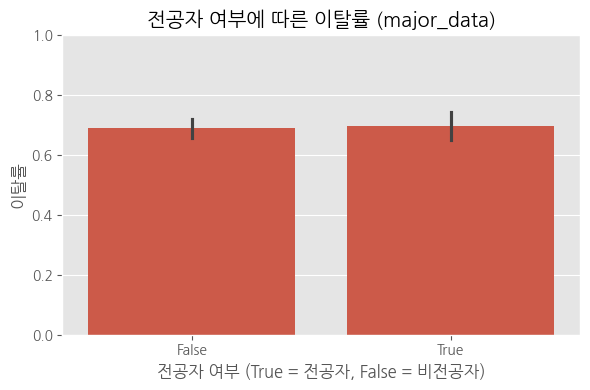

In [21]:
plt.figure(figsize=(6, 4))
sns.barplot(data=train_df, x='major_data', y='withdrawal')
plt.title("전공자 여부에 따른 이탈률 (major_data)")
plt.xlabel("전공자 여부 (True = 전공자, False = 비전공자)")
plt.ylabel("이탈률")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [6]:
train.columns

Index(['ID', 'generation', 'school1', 'major type', 'major1_1', 'major1_2',
       'major_data', 'job', 'class1', 'class2', 'class3', 'class4',
       're_registration', 'contest_award', 'nationality', 'inflow_route',
       'whyBDA', 'what_to_gain', 'hope_for_group', 'previous_class_3',
       'previous_class_4', 'previous_class_5', 'previous_class_6',
       'previous_class_7', 'major_field', 'desired_career_path',
       'completed_semester', 'project_type', 'time_input', 'desired_job',
       'certificate_acquisition', 'desired_certificate',
       'certificate_study_period', 'desired_job_except_data',
       'incumbents_level', 'incumbents_lecture', 'incumbents_company_level',
       'incumbents_lecture_type', 'incumbents_lecture_scale',
       'incumbents_lecture_scale_reason', 'interested_company',
       'expected_domain', 'contest_participitation', 'idea_contest',
       'onedayclass_topic', 'withdrawal'],
      dtype='object')

In [22]:
# 전공 관련 끝

job
대학생     985
취준생      43
직장인      14
대학원생     14
Name: count, dtype: int64


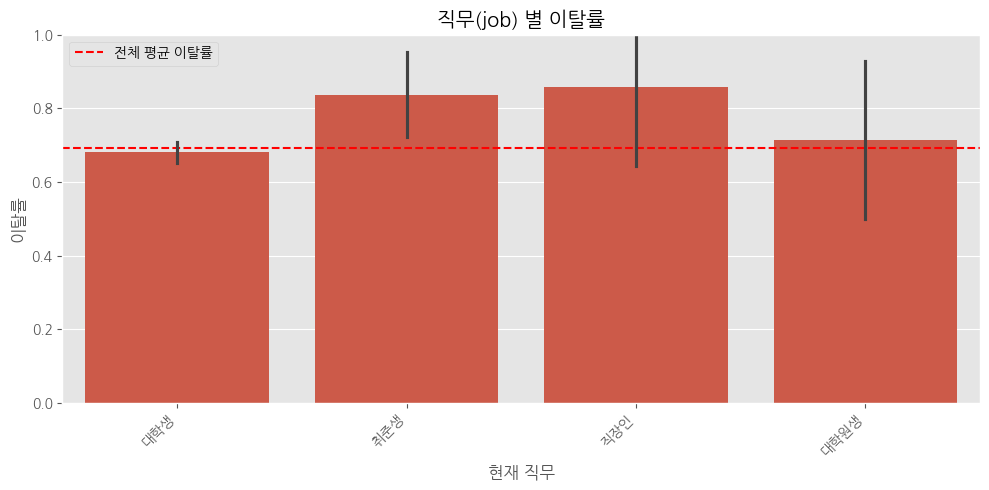

In [5]:
# 직업 -> 꽤 이탈률이 차이가 남 -> 원핫으로 진행

import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
print(train.job.value_counts())

# Step 1: 'job' 컬럼 이탈률 시각화
plt.figure(figsize=(10, 5))
job_order = train['job'].value_counts().index  # 빈도순 정렬
plt.axhline(train['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
sns.barplot(data=train, x='job', y='withdrawal', order=job_order)
plt.xticks(rotation=45, ha='right')
plt.title("직무(job) 별 이탈률")
plt.ylabel("이탈률")
plt.xlabel("현재 직무")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [24]:
job_ohe = pd.get_dummies(train_df['job'], prefix='job')
train_df = pd.concat([train_df, job_ohe], axis=1)
train_df.drop(columns=['job'], inplace=True)

In [25]:
# 전체 이탈률
overall_rate = train_df['withdrawal'].mean()

# re_registration 별 이탈률
by_re = train_df.groupby('re_registration')['withdrawal'].mean()

print("전체 이탈률:", overall_rate)
print(by_re)


전체 이탈률: 0.6912878787878788
re_registration
아니요    0.636467
예      0.971098
Name: withdrawal, dtype: float64


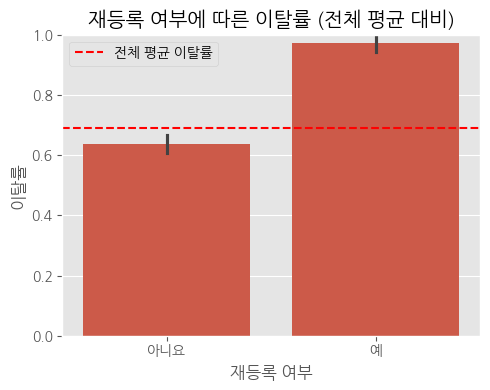

In [26]:
# 재등록 여부 시각화 (이탈률 + 전체 평균 기준선 추가)
plt.figure(figsize=(5, 4))
sns.barplot(data=train_df, x='re_registration', y='withdrawal')
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title("재등록 여부에 따른 이탈률 (전체 평균 대비)")
plt.xlabel("재등록 여부")
plt.ylabel("이탈률")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
train_df.re_registration.value_counts(normalize=True) # 학기당 새로운 학회원을 모집할 때 재등록 여부

re_registration
아니요    0.836174
예      0.163826
Name: proportion, dtype: float64

In [28]:
# 외국인 비율 4개 --> 삭제 
train_df[train_df.nationality == "외국인"]

ID               major type  major_data re_registration  \
178  TRAIN_0178                    단일 전공       False             아니요   
362  TRAIN_0362                    단일 전공        True             아니요   
694  TRAIN_0694                    단일 전공        True             아니요   
855  TRAIN_0855  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   

    nationality inflow_route  \
178         외국인        에브리타임   
362         외국인        에브리타임   
694         외국인        에브리타임   
855         외국인        인스타그램   

                                                whyBDA what_to_gain  \
178                                       혼자 공부하기 어려워서    데이터 분석 역량   
362                                       혼자 공부하기 어려워서      프로젝트 경험   
694  BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)      프로젝트 경험   
855                                       혼자 공부하기 어려워서    데이터 분석 역량   

               hope_for_group desired_career_path  ... major_field_기타  \
178  아니요. 개인적으로 학회 활동을 하고 싶어요              대학원 진학  ...           True   
362        네. 오프라인으로 참여하고 싶어요              대학원 진학  ...          False   
694         네. 온라인으로 참여하고 싶어요                  취업  ...          False   
855        네. 오프라인으로 참여하고 싶어요                  취업  ...          False   

    major_field_사회과학  major_field_사회과학, 인문학 major_field_인문학 major_field_자연과학  \
178            False                  False           False            False   
362            False                  False           False            False   
694            False                  False           False            False   
855            False                  False           False            False   

    major_field_자연과학, 사회과학 job_대학생 job_대학원생 job_직장인 job_취준생  
178                  False    True    False   False   False  
362                  False    True    False   False   False  
694                  False   False     True   False   False  
855                  False    True    False   False   False  

[4 rows x 54 columns]

In [29]:
train_df.shape

(1056, 54)

In [30]:
train_df = train_df[train_df['nationality'] != '외국인'].reset_index(drop=True) # 외국인 컬럼 제거
train_df.drop(columns=['nationality'], inplace=True) # 내국인도 필요 x

In [31]:
# 1. whyBDA 항목 개수 보기
why_counts = train_df['whyBDA'].value_counts()
why_counts

whyBDA
혼자 공부하기 어려워서                                         585
BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)    172
현직자의 강의를 듣고 싶어서                                      124
시간적으로 부담이 없어서                                         85
학회 가입 시 코딩 테스트, 면접 등을 보지 않아서                          77
큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서                     7
이전 기수에 매우 만족해서                                         2
Name: count, dtype: int64

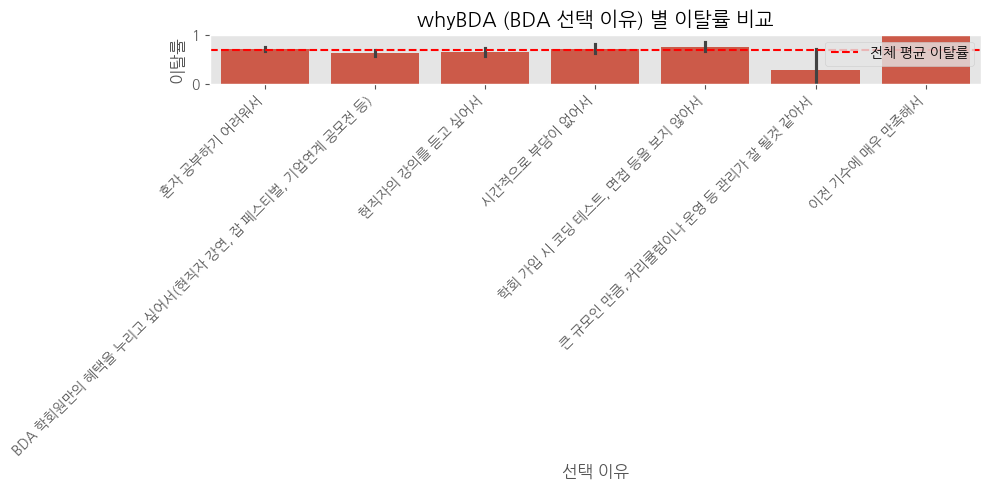

In [32]:
# 2. whyBDA 항목별 이탈률 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=train_df, x='whyBDA', y='withdrawal', order=why_counts.index)
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.xticks(rotation=45, ha='right')
plt.title("whyBDA (BDA 선택 이유) 별 이탈률 비교")
plt.ylabel("이탈률")
plt.xlabel("선택 이유")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
train_df.certificate_acquisition

0             없음
1             없음
2             없음
3        컴퓨터활용능력
4           SQLD
          ...   
1047          없음
1048      정보처리기사
1049          없음
1050    구글 애널리스트
1051          없음
Name: certificate_acquisition, Length: 1052, dtype: object

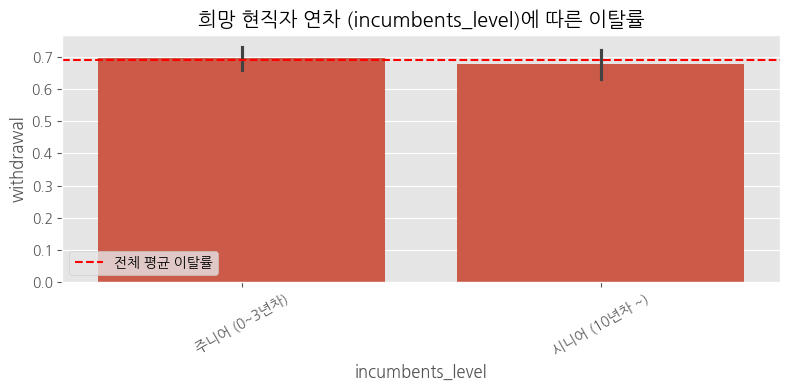

In [41]:
processed_df=train_df.copy()

# 다음 5개 항목 처리
import matplotlib.pyplot as plt
import seaborn as sns

"""
certificate_acquisition : 취득한 자격증
desired_certificate : 취득을 희망하는 자격증
certificate_study_period : 원하는 자격증 스터디 기간
"""

# 6. certificate_acquisition → 결측치 많고 종류 다양 → 삭제
train_df.drop(columns=['certificate_acquisition'], inplace=True)

# 7-8. desired_certificate, certificate_study_period → 결측치 많고 희망성 응답 → 삭제
train_df.drop(columns=['desired_certificate', 'certificate_study_period'], inplace=True)

# 10. incumbents_level → 이탈률 시각화 먼저
plt.figure(figsize=(8, 4))
sns.barplot(data=processed_df, x='incumbents_level', y='withdrawal')
plt.xticks(rotation=30)
plt.axhline(processed_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title("희망 현직자 연차 (incumbents_level)에 따른 이탈률")
plt.tight_layout()
plt.legend()
plt.show()

# 10. incumbents_level → 원핫 인코딩        
level_ohe = pd.get_dummies(processed_df['incumbents_level'], prefix='incumbent_level')
processed_df = pd.concat([processed_df, level_ohe], axis=1)
processed_df.drop(columns=['incumbents_level'], inplace=True)

# 일부 결과 확인

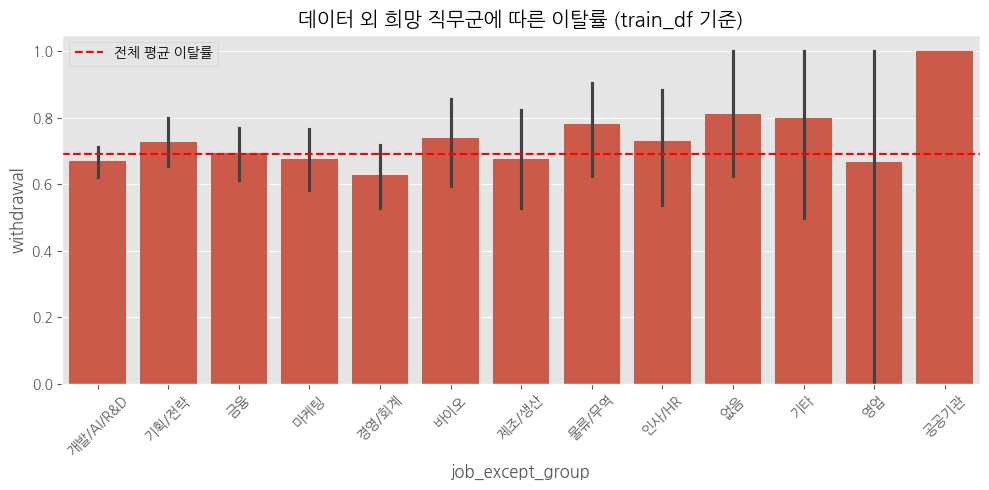

In [40]:
# 동일한 처리를 train_df 기준으로 다시 적용

# 결측치 처리
train_df['desired_job_except_data'] = train_df['desired_job_except_data'].fillna('없음')

# 그룹핑 함수 정의
def group_desired_job(text):
    if any(keyword in text for keyword in ['AI', '개발', '보안', 'R&D']):
        return '개발/AI/R&D'
    elif any(keyword in text for keyword in ['기획', '전략']):
        return '기획/전략'
    elif any(keyword in text for keyword in ['마케팅', '광고', 'MD']):
        return '마케팅'
    elif any(keyword in text for keyword in ['금융', '보험', '퀀트']):
        return '금융'
    elif any(keyword in text for keyword in ['경영', '회계', '세무']):
        return '경영/회계'
    elif any(keyword in text for keyword in ['제조', '생산']):
        return '제조/생산'
    elif any(keyword in text for keyword in ['바이오', '바이오인포매틱스']):
        return '바이오'
    elif any(keyword in text for keyword in ['물류', '무역']):
        return '물류/무역'
    elif any(keyword in text for keyword in ['인사', 'HR']):
        return '인사/HR'
    elif any(keyword in text for keyword in ['영업']):
        return '영업'
    elif any(keyword in text for keyword in ['공공기관']):
        return '공공기관'
    elif text.strip() in ['없음', '-', '모르겠음']:
        return '없음'
    else:
        return '기타'

# 적용
train_df['job_except_group'] = train_df['desired_job_except_data'].apply(group_desired_job)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=train_df, x='job_except_group', y='withdrawal',
            order=train_df['job_except_group'].value_counts().index)
plt.xticks(rotation=45)
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title("데이터 외 희망 직무군에 따른 이탈률 (train_df 기준)")
plt.tight_layout()
plt.legend()
plt.show()

# 원핫 인코딩
job_except_ohe = pd.get_dummies(train_df['job_except_group'], prefix='except_job')
train_df = pd.concat([train_df, job_except_ohe], axis=1)
train_df.drop(columns=['desired_job_except_data', 'job_except_group'], inplace=True)



In [ ]:
train.desired_job_except_data

In [45]:
train_df.shape

(1052, 63)

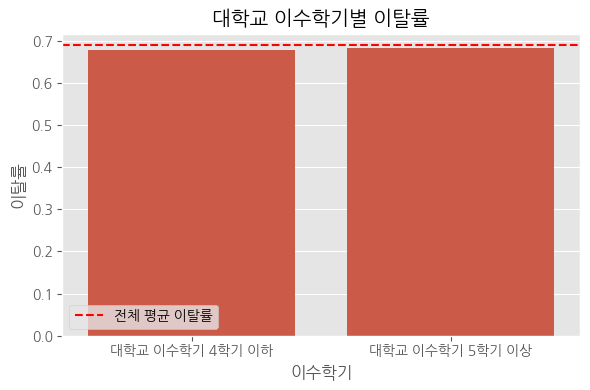

In [57]:
# 이탈률 시각화용 데이터프레임 생성
semester_rate_df = (
    train_df.groupby('completed_semester')['withdrawal']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'withdrawal_rate', 'count': 'count'})
    .reset_index()
)

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=semester_rate_df, x='completed_semester', y='withdrawal_rate')
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title("대학교 이수학기별 이탈률")
plt.ylabel("이탈률")
plt.xlabel("이수학기")
plt.tight_layout()
plt.legend()
plt.show()


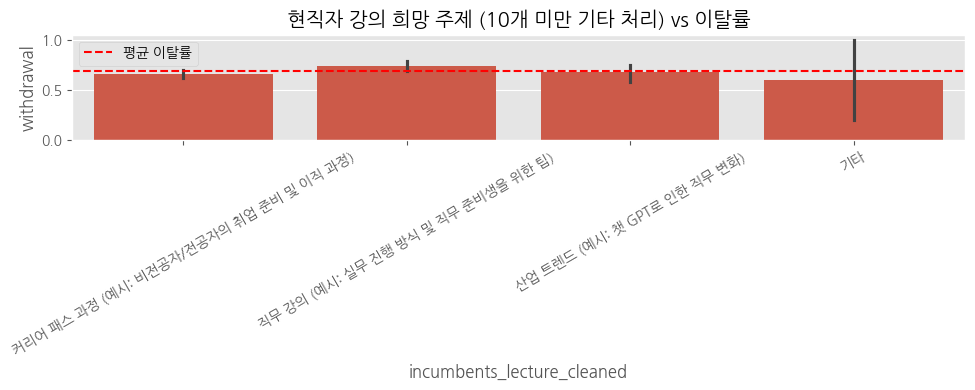

In [63]:
# 1. 각 값별 빈도수 확인
lecture_counts = train_df['incumbents_lecture'].value_counts()

# 2. 기준: 10개 미만은 '기타'로 묶기
rare_lecture = lecture_counts[lecture_counts < 10].index
train_df['incumbents_lecture_cleaned'] = train_df['incumbents_lecture'].replace(rare_lecture, '기타')

# 3. 시각화로 확인
plt.figure(figsize=(10, 4))
sns.barplot(
    data=train_df,
    x='incumbents_lecture_cleaned',
    y='withdrawal',
    order=train_df['incumbents_lecture_cleaned'].value_counts().index
)
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='평균 이탈률')
plt.xticks(rotation=30)
plt.title("현직자 강의 희망 주제 (10개 미만 기타 처리) vs 이탈률")
plt.tight_layout()
plt.legend()
plt.show()


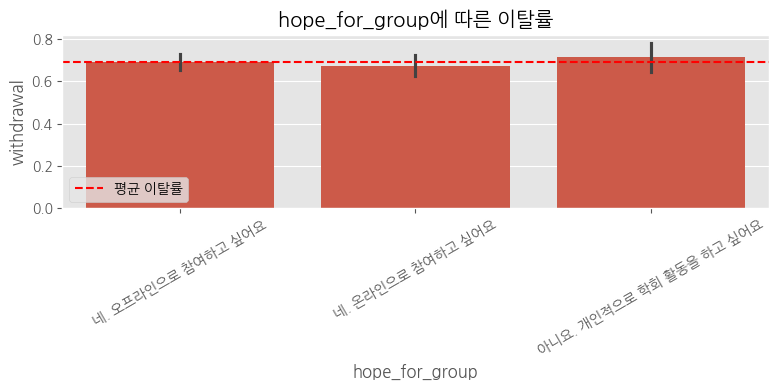

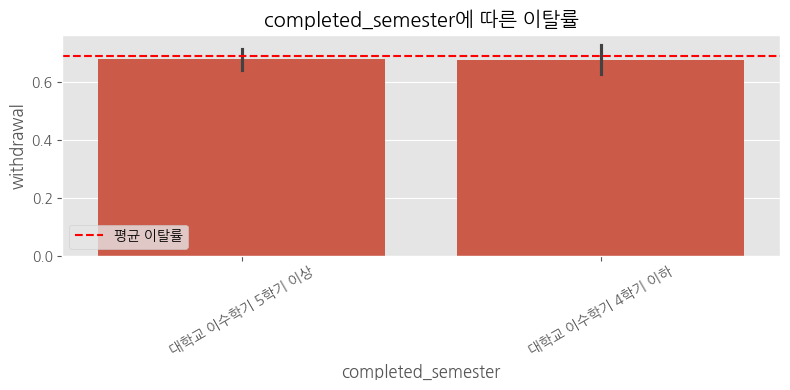

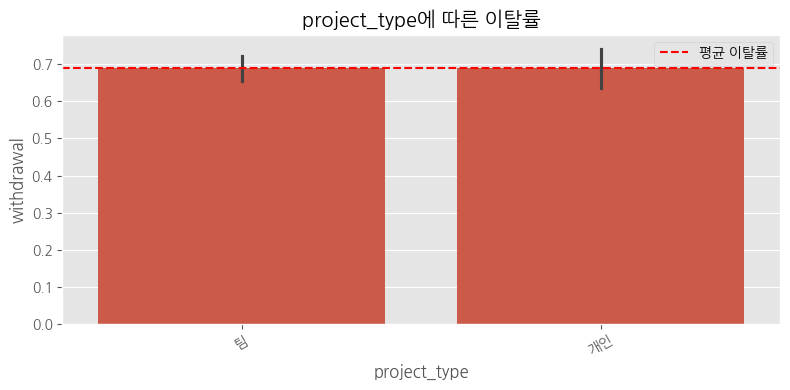

In [88]:
# 시각화 + 원핫 인코딩 처리

columns_to_process = ['hope_for_group', 'completed_semester', 'project_type']
prefixes = ['group', 'semester', 'project']

# 시각화 먼저
for col in columns_to_process:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=train_df, x=col, y='withdrawal', order=train_df[col].value_counts().index)
    plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='평균 이탈률')
    plt.title(f"{col}에 따른 이탈률")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.legend()
    plt.show()

# 전처리 (원핫 인코딩)
for col, prefix in zip(columns_to_process, prefixes):
    dummies = pd.get_dummies(train_df[col], prefix=prefix)
    train_df = pd.concat([train_df, dummies], axis=1)
    train_df.drop(columns=[col], inplace=True)


In [87]:
train_df.project_type.value_counts()

project_type
팀     751
개인    290
Name: count, dtype: int64

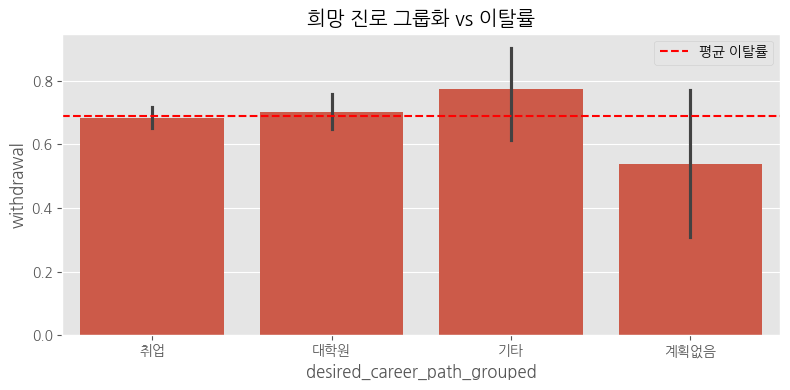

desired_career_path_grouped
취업      752
대학원     256
기타       31
계획없음     13
Name: count, dtype: int64

In [ ]:
import pandas as pd


# desired_career_path 그룹 분류 함수 정의
def classify_career(text):
    if pd.isna(text):
        return '기타'
    if any(word in text for word in ['대학원']):
        return '대학원'
    if any(word in text for word in ['취업', '취업준비', '취업예정']):
        return '취업'
    if any(word in text for word in ['계획없음', '모르겠음', '미정']):
        return '계획없음'
    return '기타'

# 적용
train_df['desired_career_path_grouped'] = train_df['desired_career_path'].apply(classify_career)

# 이탈률 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(data=train_df, x='desired_career_path_grouped', y='withdrawal', order=train_df['desired_career_path_grouped'].value_counts().index)
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='평균 이탈률')
plt.title("희망 진로 그룹화 vs 이탈률")
plt.tight_layout()
plt.legend()
plt.show()

# 확인
train_df['desired_career_path_grouped'].value_counts()


In [83]:
# desired_career_path_grouped 컬럼 원핫 인코딩
career_ohe = pd.get_dummies(train_df['desired_career_path_grouped'], prefix='career_group')

# 병합 후 불필요한 컬럼 제거
train_df = pd.concat([train_df, career_ohe], axis=1)
train_df.drop(columns=['desired_career_path', 'desired_career_path_grouped'], inplace=True)

# 결과 미리보기
train_df.head(3)

ID               major type  major_data re_registration  \
0  TRAIN_0000                    단일 전공       False             아니요   
1  TRAIN_0001  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   
2  TRAIN_0002                    단일 전공        True             아니요   

  inflow_route                                             whyBDA  \
0        에브리타임  BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)   
1        에브리타임                                       혼자 공부하기 어려워서   
2        에브리타임                                       혼자 공부하기 어려워서   

  what_to_gain      hope_for_group completed_semester project_type  ...  \
0      프로젝트 경험  네. 오프라인으로 참여하고 싶어요    대학교 이수학기 4학기 이하            팀  ...   
1      프로젝트 경험  네. 오프라인으로 참여하고 싶어요    대학교 이수학기 5학기 이상            팀  ...   
2    데이터 분석 역량  네. 오프라인으로 참여하고 싶어요    대학교 이수학기 4학기 이하            팀  ...   

   except_job_바이오 except_job_없음 except_job_영업 except_job_인사/HR  \
0           False         False         False            False   
1           False         False         False            False   
2           False         False         False            False   

  except_job_제조/생산               incumbents_lecture_cleaned career_group_계획없음  \
0            False  커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)             False   
1            False      직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)             False   
2            False  커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)             False   

  career_group_기타 career_group_대학원 career_group_취업  
0           False            False            True  
1           False            False            True  
2           False            False            True  

[3 rows x 67 columns]

In [89]:
train_df.shape

(1052, 71)

In [78]:
train_df.shape

(1052, 64)

In [69]:
train_df.project_type.value_counts()

project_type
팀     751
개인    290
Name: count, dtype: int64

In [64]:
train_df.hope_for_group

0       네. 오프라인으로 참여하고 싶어요
1       네. 오프라인으로 참여하고 싶어요
2       네. 오프라인으로 참여하고 싶어요
3        네. 온라인으로 참여하고 싶어요
4       네. 오프라인으로 참여하고 싶어요
               ...        
1047     네. 온라인으로 참여하고 싶어요
1048     네. 온라인으로 참여하고 싶어요
1049    네. 오프라인으로 참여하고 싶어요
1050     네. 온라인으로 참여하고 싶어요
1051    네. 오프라인으로 참여하고 싶어요
Name: hope_for_group, Length: 1052, dtype: object

In [58]:
# inflow_route,completed_semester,time_input

NameError: name 'inflow_route' is not defined

In [95]:
train_df.columns

Index(['ID', 'major type', 'major_data', 're_registration', 'inflow_route',
       'whyBDA', 'what_to_gain', 'time_input', 'desired_job',
       'incumbents_level', 'incumbents_lecture', 'incumbents_company_level',
       'incumbents_lecture_type', 'incumbents_lecture_scale',
       'incumbents_lecture_scale_reason', 'interested_company',
       'expected_domain', 'onedayclass_topic', 'withdrawal', 'is_double_major',
       'major_field_IT (컴퓨터 공학 포함)', 'major_field_IT (컴퓨터 공학 포함), 경영학',
       'major_field_IT (컴퓨터 공학 포함), 경제통상학',
       'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
       'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
       'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
       'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
       'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
       'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
       'major_field_기타', 'major_field_사회과학', 'major_field_사회

In [90]:
train_df.isnull().sum()

ID                                0
major type                        7
major_data                        0
re_registration                   0
inflow_route                      0
                                 ..
group_아니요. 개인적으로 학회 활동을 하고 싶어요    0
semester_대학교 이수학기 4학기 이하          0
semester_대학교 이수학기 5학기 이상          0
project_개인                        0
project_팀                         0
Length: 71, dtype: int64

In [ ]:
# 기존 컬럼 복구 및 새로운 기준 설정을 위한 사전 처리
train_df['time_input'] = processed_df['time_input']  # 원본에서 복원

# 1. 3단계로 나누기 (0~4, 4~8, 8시간 초과)
def categorize_time(hour):
    try:
        h = float(hour)
        if h <= 4:
            return "0~4시간"
        elif h <= 8:
            return "4~8시간"
        else:
            return "8시간 초과"
    except:
        return "기타"

train_df['time_category'] = train_df['time_input'].apply(categorize_time)

# 2. 시각화: 카테고리별 이탈률
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(data=train_df, x='time_category', y='withdrawal')
plt.title("BDA 투입 시간대별 이탈률")
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.tight_layout()
plt.legend()
plt.show()

# 3. 원핫 인코딩
time_ohe = pd.get_dummies(train_df['time_category'], prefix='time')
train_df = pd.concat([train_df, time_ohe], axis=1)

# 불필요 컬럼 제거
train_df.drop(columns=['time_input', 'time_category'], inplace=True)

KeyError: 'time_input'

In [97]:
train_df.time_input

0       4.5
1       2.0
2       3.0
3       2.0
4       1.5
       ... 
1047    2.0
1048    2.0
1049    3.0
1050    7.0
1051    2.0
Name: time_input, Length: 1052, dtype: float64

In [105]:
train_df.drop(columns={"inflow_route"},inplace=True)

In [116]:
train_df.columns

Index(['ID', 'major type', 'major_data', 're_registration', 'whyBDA',
       'what_to_gain', 'desired_job', 'incumbents_lecture',
       'incumbents_company_level', 'incumbents_lecture_type',
       'incumbents_lecture_scale', 'incumbents_lecture_scale_reason',
       'interested_company', 'expected_domain', 'onedayclass_topic',
       'withdrawal', 'is_double_major', 'major_field_IT (컴퓨터 공학 포함)',
       'major_field_IT (컴퓨터 공학 포함), 경영학', 'major_field_IT (컴퓨터 공학 포함), 경제통상학',
       'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
       'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
       'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
       'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
       'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
       'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
       'major_field_기타', 'major_field_사회과학', 'major_field_사회과학, 인문학',
       'major_field_인문학', 'major_field_자연과학', '

In [117]:
train_df.whyBDA.value_counts()
학회 가입 시 코딩 테스트, 면접 등을 보지 않아서  + BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)
혼자 공부하기 어려워서 + 큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서 + 이전 기수에 매우 만족해서
현직자의 강의를 듣고 싶어서 


whyBDA
혼자 공부하기 어려워서                                         585
BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)    172
현직자의 강의를 듣고 싶어서                                      124
시간적으로 부담이 없어서                                         85
학회 가입 시 코딩 테스트, 면접 등을 보지 않아서                          77
큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서                     7
이전 기수에 매우 만족해서                                         2
Name: count, dtype: int64

In [118]:
train_df.what_to_gain.value_counts()
데이터 분석 역량 이거랑 인적 네트워크랑 나머지 묶어주고

what_to_gain
데이터 분석 역량           682
프로젝트 경험             213
공모전 경험               99
인적 네트워크              42
위 4항목 전부              1
모두                    1
공모전, 프로젝트 경험 둘 다      1
자격증 공부                1
파이썬 실력                1
Name: count, dtype: int64

In [121]:
train_df.desired_job.unique()

array(['데이터 엔지니어', '인공지능 전문가', '데이터 분석가', '자연과학계열 연구자, 데이터 분석가',
       '데이터 사이언티스트', '아직은 직무에 관해서 확실하게 정하지않아서 학회수업과 전공들으면서 생각해볼 예정입니다.',
       '아직 미정', '소프트웨어 개발자', '자연과학계열 연구자', '계리사', '경영컨설턴트', '마케터',
       '퀀트 리서처/에널리스트', '잘 모르겠다', '해외영업', 'PM/서비스 기획자', '사회과학계열 연구자',
       'DB관리자', '영업', nan, 'SCM', '파이낸셜 애널리틱스', '컨설팅', '확실하지 않아요',
       'UX/UI 디자이너', '아직 정하지 못함', '문화유산연구원', '경영 데이터', '전산직', '반도체 엔지니어',
       '아직 고민 중', '공정기술 엔지니어', '고민중', '레이더와 관련된 데이터 분석가', 'MD', '미정',
       '반도체공정엔지니어', '아직 확고하게 결정한 건 없지만 은행에서 일하고 싶습니다.', '퍼포먼스 마케터', '퀀트',
       '기계공학 엔지니어', '금융공기업 A매치 전산직렬', '아직 고민 중이니다',
       '삼성전자 평가및분석 엔지니어 (PE팀)',
       '아직 잘 모르겠다. DE, DA에 가까운 것 같으나, 현업에서 어느정도의 차이가 있는지 모르겠음.', '회계사',
       '대학교 입학사정관', '오퍼레이션 분야', '품질관리', '화학공학 엔지니어', '아직 모름',
       '환경안전관리 또는 설계', 'HR', '펀드매니저', 'HR 애널리틱스', 'Scm 직무', 'scm 담당자',
       '웹디자인', '머신러닝을 도입한 품질관리 업계에서의 종사', '고민', '교통관련 직무', '편성', '설비',
       '모르겠다', '아직 못 정함', '데이터분석가, PM', '인사직무',
       '인공지능 전문가를 목표로 하나 현재 ux 쪽 

In [130]:
import numpy as np

# 복사본 생성
# processed_df = train_df.copy()

# -------------------------
# 1. whyBDA 그룹화
# -------------------------

def simplify_whyBDA(x):
    if '코딩 테스트' in x or '잡 페스티벌' in x:
        return '혜택 목적'
    elif '혼자 공부' in x or '커리큘럼' in x or '만족' in x:
        return '혼자 어려움/기수 추천'
    elif '현직자' in x:
        return '현직자 강의'
    else:
        return '기타'

train_df['whyBDA_grouped'] = train_df['whyBDA'].fillna('기타').apply(simplify_whyBDA)

# -------------------------
# 2. what_to_gain 그룹화
# -------------------------

def simplify_gain(x):
    if pd.isnull(x):
        return '기타'
    elif '데이터 분석' in x:
        return '데이터 분석 역량'
    elif '인적' in x or '사람' in x:
        return '인적 네트워크'
    else:
        return '기타'

train_df['what_to_gain_grouped'] = train_df['what_to_gain'].fillna('기타').apply(simplify_gain)

# -------------------------
# 3. desired_job 그룹화
# -------------------------

def simplify_desired_job(x):
    if pd.isnull(x):
        return '기타'
    elif any(word in x for word in ['AI', '데이터', 'Data', 'NLP', '분석']):
        return '데이터/AI'
    elif any(word in x for word in ['개발', '엔지니어', 'R&D', '공정']):
        return '엔지니어/개발'
    elif any(word in x for word in ['마케터', '광고', '기획', 'UX', '디자인', '퍼포먼스']):
        return '마케팅/기획'
    elif any(word in x for word in ['HR', '인사', '회계', '경영', '세무']):
        return '경영/인사'
    elif any(word in x for word in ['금융', '펀드', '은행', '퀀트']):
        return '금융'
    elif any(word in x for word in ['모르', '아직', '미정', '잘']):
        return '미정'
    else:
        return '기타'

train_df['desired_job_grouped'] = train_df['desired_job'].fillna('기타').apply(simplify_desired_job)



In [151]:
whyBDA_ohe = pd.get_dummies(train_df['whyBDA_grouped'], prefix='whyBDA')
gain_ohe = pd.get_dummies(train_df['what_to_gain_grouped'], prefix='gain')
job_ohe = pd.get_dummies(train_df['desired_job_grouped'], prefix='job')

train_df = pd.concat([train_df, whyBDA_ohe, gain_ohe, job_ohe], axis=1)

# 5. 불필요한 컬럼 제거
train_df.drop(columns=['whyBDA', 'what_to_gain', 'desired_job',
                       'whyBDA_grouped', 'what_to_gain_grouped', 'desired_job_grouped',
                       'incumbents_lecture', 'onedayclass_topic'], inplace=True)

In [153]:
train_df.shape

(1052, 86)

In [ ]:
major_field_ohe = pd.get_dummies(train_df['major_field_cleaned'], prefix='major_field')


In [125]:
train_df.incumbents_lecture.value_counts()

커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)    553
직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)        363
산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)               120

아래껀 -----> 직무 강의로 넣어줘
위 항목 셋 다                                     1
가능하면 3개 다 듣고 싶어요!                            1
다 듣고 싶습니다!                                   1
커리어패스과정 및 직무 강의                              1
연구직에서 활용하는 머신러닝의 트렌드                         1


incumbents_lecture
커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)    553
직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)        363
산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)               120
위 항목 셋 다                                     1
가능하면 3개 다 듣고 싶어요!                            1
다 듣고 싶습니다!                                   1
커리어패스과정 및 직무 강의                              1
연구직에서 활용하는 머신러닝의 트렌드                         1
Name: count, dtype: int64

In [137]:
# 기존 결과 반영하기 위해 복사본 사용
df = train_df.copy()

# incumbents_lecture 값 정제 및 그룹화 함수
def group_lecture(value):
    if value in ['커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)']:
        return '커리어 패스 과정'
    elif value in ['직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)',
                   '위 항목 셋 다', '가능하면 3개 다 듣고 싶어요!',
                   '다 듣고 싶습니다!', '커리어패스과정 및 직무 강의']:
        return '직무 강의'
    elif value in ['산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)',
                   '연구직에서 활용하는 머신러닝의 트렌드']:
        return '산업 트렌드'
    else:
        return '기타'

train_df['incumbents_lecture_cleaned'] = train_df['incumbents_lecture'].apply(group_lecture)

# 빈도 확인
train_df['incumbents_lecture_cleaned'].value_counts()


incumbents_lecture_cleaned
커리어 패스 과정    553
직무 강의        367
산업 트렌드       121
기타            11
Name: count, dtype: int64

In [136]:
train_df.desired_job_grouped.value_counts()

desired_job_grouped
데이터/AI     665
기타         173
마케팅/기획     121
엔지니어/개발     57
미정          23
경영/인사        7
금융           6
Name: count, dtype: int64

In [138]:
# '기타' 항목을 모두 '직무 강의'로 대체
train_df['incumbents_lecture_cleaned'] = train_df['incumbents_lecture_cleaned'].replace('기타', '직무 강의')

# 변경 후 다시 확인
train_df['incumbents_lecture_cleaned'].value_counts()

incumbents_lecture_cleaned
커리어 패스 과정    553
직무 강의        378
산업 트렌드       121
Name: count, dtype: int64

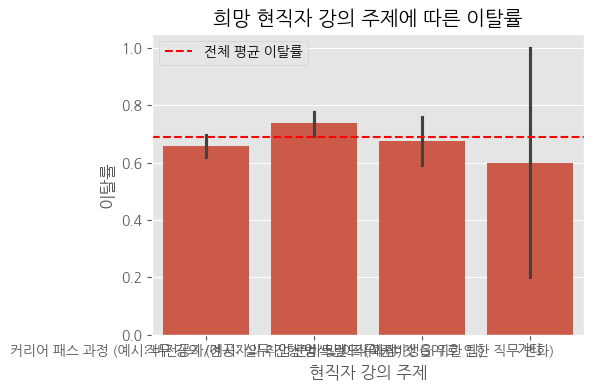

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 복사본에 반영
df['withdrawal'] = train_df['withdrawal']

# 이탈률 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='incumbents_lecture_cleaned', y='withdrawal')
plt.axhline(df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title('희망 현직자 강의 주제에 따른 이탈률')
plt.xlabel('현직자 강의 주제')
plt.ylabel('이탈률')
plt.tight_layout()
plt.legend()
plt.show()

# 원핫 인코딩
lecture_ohe = pd.get_dummies(df['incumbents_lecture_cleaned'], prefix='lecture')
train_df = pd.concat([train_df, lecture_ohe], axis=1)
train_df['incumbents_lecture_cleaned'] = df['incumbents_lecture_cleaned']


In [114]:
train_df.incumbents_lecture.unique()

array(['커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)',
       '직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)',
       '산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)', nan, '위 항목 셋 다',
       '가능하면 3개 다 듣고 싶어요!', '다 듣고 싶습니다!', '커리어패스과정 및 직무 강의',
       '연구직에서 활용하는 머신러닝의 트렌드'], dtype=object)

In [100]:
# 2. incumbents_level → 원핫 인코딩 (이미 있음 여부 확인 후 처리)
if 'incumbents_level' in train_df.columns:
    inc_level_ohe = pd.get_dummies(train_df['incumbents_level'], prefix='incumbent_level')
    train_df = pd.concat([train_df, inc_level_ohe], axis=1)
    train_df.drop(columns=['incumbents_level'], inplace=True)

In [141]:
train_df.shape

(1052, 80)

In [142]:
train_df.desired_job_except_data.value_counts()

AttributeError: 'DataFrame' object has no attribute 'desired_job_except_data'

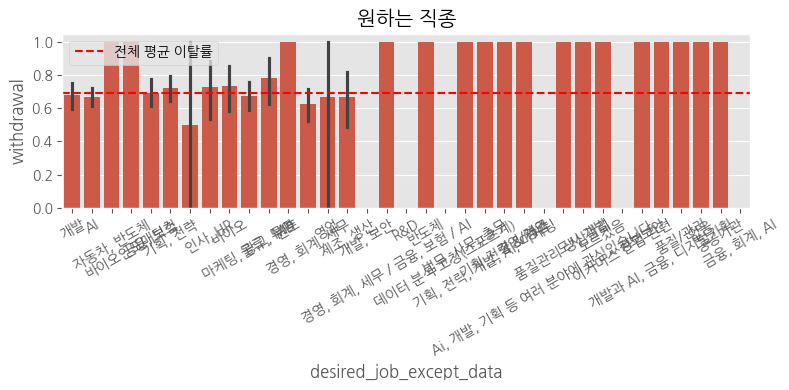

In [39]:
plt.figure(figsize=(8, 4))
sns.barplot(data=train_df, x='desired_job_except_data', y='withdrawal')
plt.xticks(rotation=30)
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title("원하는 직종")
plt.tight_layout()
plt.legend()
plt.show()

In [154]:
train_df

ID               major type  major_data re_registration  \
0     TRAIN_0000                    단일 전공       False             아니요   
1     TRAIN_0001  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   
2     TRAIN_0002                    단일 전공        True             아니요   
3     TRAIN_0003                    단일 전공        True             아니요   
4     TRAIN_0004  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   
...          ...                      ...         ...             ...   
1047  TRAIN_1051  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   
1048  TRAIN_1052                    단일 전공        True               예   
1049  TRAIN_1053  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   
1050  TRAIN_1054                    단일 전공       False             아니요   
1051  TRAIN_1055  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   

       incumbents_company_level incumbents_lecture_type  \
0     국내 대기업 IT 계열 (금융, 제조 ...)               온,오프라인 동시   
1        국내 빅테크 IT 계열 (네카쿠라배당토)               온,오프라인 동시   
2     국내 대기업 IT 계열 (금융, 제조 ...)               온,오프라인 동시   
3        국내 빅테크 IT 계열 (네카쿠라배당토)               온,오프라인 동시   
4     국내 대기업 IT 계열 (금융, 제조 ...)                    오프라인   
...                         ...                     ...   
1047  국내 대기업 IT 계열 (금융, 제조 ...)               온,오프라인 동시   
1048  국내 대기업 IT 계열 (금융, 제조 ...)               온,오프라인 동시   
1049  국내 대기업 IT 계열 (금융, 제조 ...)                     온라인   
1050     국내 빅테크 IT 계열 (네카쿠라배당토)               온,오프라인 동시   
1051  국내 대기업 IT 계열 (금융, 제조 ...)               온,오프라인 동시   

       incumbents_lecture_scale  \
0     3~50명 내외의 강의 리스너와 1명의 현직자   
1       10명 내외의 강의 리스너와 1명의 현직자   
2     3~50명 내외의 강의 리스너와 1명의 현직자   
3     3~50명 내외의 강의 리스너와 1명의 현직자   
4     100명 이상의 리스너와 10명 이상의 현직자   
...                         ...   
1047  3~50명 내외의 강의 리스너와 1명의 현직자   
1048  3~50명 내외의 강의 리스너와 1명의 현직자   
1049  3~50명 내외의 강의 리스너와 1명의 현직자   
1050  3~50명 내외의 강의 리스너와 1명의 현직자   
1051  3~50명 내외의 강의 리스너와 1명의 현직자   

                        incumbents_lecture_scale_reason   interested_company  \
0                            인원이 너무 많지 않아야 편하게 들을 수 있어서            삼성이나 하이닉스   
1                            인원이 적어야 집중할 수 있고 질문 하기 쉽다.                  네이버   
2              너무 소수인원은 조금 부담스럽고 너무 많은 인원은 집중도가 떨어질거같아서             스포츠분석 기업   
3                      너무 많은 인원이 있을 경우 집중도가 떨어질 거 같습니다.                   토스   
4                                  많은 현직자분들의 이야기를 듣고싶어서              네이버 카카오   
...                                                 ...                  ...   
1047                          1명의 현직자에게 집중하는 게 좋을 것 같아서    대기업 위주로 관심이 있습니다.   
1048                 사람이 너무 많으면 집중할 수 없고, 너무 적으면 부담스러워서                   구글   
1049    온라인은 사람이 너무 많으면 질문을 많이 할 수 없기에 적절한 규모가 필요하다고 생각                 JTBC   
1050  인원이 너무 적으면 예산이 부담될 것 같고 너무 많으면 집중이 안 될 것 같아서 중...               당근, 토스   
1051  인원이 적어야 집중하기 더 쉽지만, 너무 적은 인원을 수용할 경우 참여할 수 있는 ...  아직 자세히 생각해보지 못했습니다.   

     expected_domain  ...  gain_기타  gain_데이터 분석 역량  gain_인적 네트워크  job_경영/인사  \
0                 AI  ...     True           False         False      False   
1                 AI  ...     True           False         False      False   
2                 AI  ...    False            True         False      False   
3                 AI  ...    False            True         False      False   
4                 금융  ...     True           False         False      False   
...              ...  ...      ...             ...           ...        ...   
1047              금융  ...    False            True         False      False   
1048              금융  ...    False            True         False      False   
1049            사회문제  ...    False            True         False      False   
1050              금융  ...    False            True         False      False   
1051            비즈니스  ...     True           False         False      False   

      job_금융  job_기타  job_데이터/AI  job_마케팅/기획  job_미정  job_엔지니어/개발  
0      False   False        T

In [143]:
train_df.shape

(1052, 80)

In [ ]:
'incumbents_company_level', 'incumbents_lecture_type',
'incumbents_lecture_scale', 'incumbents_lecture_scale_reason',
'interested_company', 'expected_domain',

In [150]:
train_df.incumbents_lecture_type

0       온,오프라인 동시
1       온,오프라인 동시
2       온,오프라인 동시
3       온,오프라인 동시
4            오프라인
          ...    
1047    온,오프라인 동시
1048    온,오프라인 동시
1049          온라인
1050    온,오프라인 동시
1051    온,오프라인 동시
Name: incumbents_lecture_type, Length: 1052, dtype: object

In [166]:
train_df.drop(columns={"incumbents_lecture_scale","incumbents_company_level"},inplace=True)

In [ ]:
incumbents_lecture_type
interested_company
expected_domain

In [172]:
train_df.drop(columns={"incumbents_lecture_scale_reason"},inplace=True)

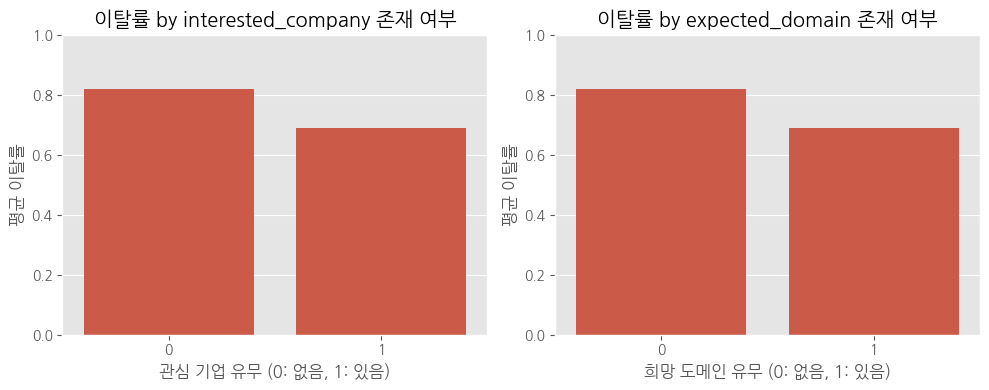

In [174]:
import pandas as pd

original_df = train_df.copy()

# 필요한 두 컬럼만 다시 불러와서 기존 train_df에 붙이기
train_df['interested_company'] = original_df['interested_company']
train_df['expected_domain'] = original_df['expected_domain']

# 결측치를 '관심없음'으로 간주하고 0, 아닌 경우 1로 변환
train_df['interested_company_bool'] = train_df['interested_company'].apply(lambda x: 0 if pd.isna(x) else 1)
train_df['expected_domain_bool'] = train_df['expected_domain'].apply(lambda x: 0 if pd.isna(x) else 1)

# 이탈 여부에 따른 평균 확인
interested_company_withdrawal = train_df.groupby('interested_company_bool')['withdrawal'].mean()
expected_domain_withdrawal = train_df.groupby('expected_domain_bool')['withdrawal'].mean()

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=interested_company_withdrawal.index, y=interested_company_withdrawal.values)
plt.title("이탈률 by interested_company 존재 여부")
plt.xlabel("관심 기업 유무 (0: 없음, 1: 있음)")
plt.ylabel("평균 이탈률")
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(x=expected_domain_withdrawal.index, y=expected_domain_withdrawal.values)
plt.title("이탈률 by expected_domain 존재 여부")
plt.xlabel("희망 도메인 유무 (0: 없음, 1: 있음)")
plt.ylabel("평균 이탈률")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


In [180]:
train_df.columns

Index(['ID', 'major type', 'major_data', 're_registration', 'withdrawal',
       'is_double_major', 'major_field_IT (컴퓨터 공학 포함)',
       'major_field_IT (컴퓨터 공학 포함), 경영학', 'major_field_IT (컴퓨터 공학 포함), 경제통상학',
       'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
       'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
       'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
       'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
       'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
       'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
       'major_field_기타', 'major_field_사회과학', 'major_field_사회과학, 인문학',
       'major_field_인문학', 'major_field_자연과학', 'major_field_자연과학, 사회과학',
       'job_대학생', 'job_대학원생', 'job_직장인', 'job_취준생', 'sentiment_score',
       'except_job_개발/AI/R&D', 'except_job_경영/회계', 'except_job_공공기관',
       'except_job_금융', 'except_job_기타', 'except_job_기획/전략', 'except_job_마케팅',
       'except_job_물류/무역',

In [182]:
import pandas as pd

# 불러온 컬럼 리스트
columns = [
    'ID', 'major type', 'major_data', 're_registration', 'withdrawal',
    'is_double_major', 'major_field_IT (컴퓨터 공학 포함)',
    'major_field_IT (컴퓨터 공학 포함), 경영학', 'major_field_IT (컴퓨터 공학 포함), 경제통상학',
    'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
    'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
    'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
    'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
    'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
    'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
    'major_field_기타', 'major_field_사회과학', 'major_field_사회과학, 인문학',
    'major_field_인문학', 'major_field_자연과학', 'major_field_자연과학, 사회과학',
    'job_대학생', 'job_대학원생', 'job_직장인', 'job_취준생', 'sentiment_score',
    'except_job_개발/AI/R&D', 'except_job_경영/회계', 'except_job_공공기관',
    'except_job_금융', 'except_job_기타', 'except_job_기획/전략', 'except_job_마케팅',
    'except_job_물류/무역', 'except_job_바이오', 'except_job_없음', 'except_job_영업',
    'except_job_인사/HR', 'except_job_제조/생산', 'incumbents_lecture_cleaned',
    'career_group_계획없음', 'career_group_기타', 'career_group_대학원',
    'career_group_취업', 'group_네. 오프라인으로 참여하고 싶어요',
    'group_네. 온라인으로 참여하고 싶어요', 'group_아니요. 개인적으로 학회 활동을 하고 싶어요',
    'semester_대학교 이수학기 4학기 이하', 'semester_대학교 이수학기 5학기 이상', 'project_개인',
    'project_팀', 'time_0~4시간', 'time_4~8시간', 'time_8시간 초과',
    'incumbent_level_시니어 (10년차 ~)', 'incumbent_level_주니어 (0~3년차)',
    'lecture_기타', 'lecture_산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)',
    'lecture_직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)',
    'lecture_커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)', 'whyBDA_기타',
    'whyBDA_현직자 강의', 'whyBDA_혜택 목적', 'whyBDA_혼자 어려움/기수 추천', 'gain_기타',
    'gain_데이터 분석 역량', 'gain_인적 네트워크', 'job_경영/인사', 'job_금융', 'job_기타',
    'job_데이터/AI', 'job_마케팅/기획', 'job_미정', 'job_엔지니어/개발',
    'interested_company_bool', 'expected_domain_bool', 'lecture_type_오프라인',
    'lecture_type_온,오프라인 동시', 'lecture_type_온라인'
]

# 컬럼 정제 함수
def clean_column(col):
    col = col.lower()  # 소문자
    col = col.replace(' ', '_')  # 공백 → 언더바
    col = col.replace('(', '').replace(')', '')  # 괄호 제거
    col = col.replace('/', '_').replace('~', '_')  # 슬래시와 ~도 언더바
    col = col.replace(',', '').replace('.', '')  # 쉼표, 마침표 제거
    col = col.replace('-', '_')  # 하이픈 제거
    col = col.replace('예시:', '')  # 예시 제거
    col = col.replace('__', '_')  # 언더바 중복 제거
    return col.strip('_')

# 정제된 컬럼
cleaned_columns = [clean_column(c) for c in columns]

# 결과 DataFrame으로 정리
renaming_df = pd.DataFrame({
    '원래 컬럼명': columns,
    '정제된 컬럼명': cleaned_columns
})



In [183]:
train_df.to_csv('train_ms2.csv', index=False, encoding='utf-8-sig')

In [ ]:
with 

In [178]:
# incumbents_lecture_type 원핫 인코딩
lecture_type_ohe = pd.get_dummies(train_df['incumbents_lecture_type'], prefix='lecture_type')

# 기존 데이터프레임에 추가 후 원본 컬럼 제거
train_df = pd.concat([train_df, lecture_type_ohe], axis=1)
train_df.drop(columns=['incumbents_lecture_type'], inplace=True)

# 결과 확인
train_df.columns[-5:]  # 마지막 5개 컬럼만 출력해서 확인



Index(['interested_company_bool', 'expected_domain_bool', 'lecture_type_오프라인',
       'lecture_type_온,오프라인 동시', 'lecture_type_온라인'],
      dtype='object')

In [177]:
train_df.drop(columns={"interested_company","expected_domain"},inplace=True)

In [ ]:
train.incumbents_level

0        주니어 (0~3년차)
1        주니어 (0~3년차)
2       시니어 (10년차 ~)
3        주니어 (0~3년차)
4        주니어 (0~3년차)
            ...     
1051     주니어 (0~3년차)
1052    시니어 (10년차 ~)
1053     주니어 (0~3년차)
1054     주니어 (0~3년차)
1055     주니어 (0~3년차)
Name: incumbents_level, Length: 1056, dtype: object

In [41]:
train_df

ID               major type  major_data re_registration  \
0     TRAIN_0000                    단일 전공       False             아니요   
1     TRAIN_0001  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   
2     TRAIN_0002                    단일 전공        True             아니요   
3     TRAIN_0003                    단일 전공        True             아니요   
4     TRAIN_0004  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   
...          ...                      ...         ...             ...   
1047  TRAIN_1051  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   
1048  TRAIN_1052                    단일 전공        True               예   
1049  TRAIN_1053  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   
1050  TRAIN_1054                    단일 전공       False             아니요   
1051  TRAIN_1055  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요   

       inflow_route                                             whyBDA  \
0             에브리타임  BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)   
1             에브리타임                                       혼자 공부하기 어려워서   
2             에브리타임                                       혼자 공부하기 어려워서   
3             에브리타임                                    현직자의 강의를 듣고 싶어서   
4             에브리타임                                       혼자 공부하기 어려워서   
...             ...                                                ...   
1047          에브리타임                                       혼자 공부하기 어려워서   
1048  기존 학회원 또는 운영진                                       혼자 공부하기 어려워서   
1049          에브리타임                                       혼자 공부하기 어려워서   
1050          에브리타임  BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)   
1051          에브리타임  BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)   

     what_to_gain      hope_for_group desired_career_path completed_semester  \
0         프로젝트 경험  네. 오프라인으로 참여하고 싶어요                  취업    대학교 이수학기 4학기 이하   
1         프로젝트 경험  네. 오프라인으로 참여하고 싶어요                  취업    대학교 이수학기 5학기 이상   
2       데이터 분석 역량  네. 오프라인으로 참여하고 싶어요                  취업    대학교 이수학기 4학기 이하   
3       데이터 분석 역량   네. 온라인으로 참여하고 싶어요                  취업    대학교 이수학기 5학기 이상   
4          공모전 경험  네. 오프라인으로 참여하고 싶어요                  취업    대학교 이수학기 5학기 이상   
...           ...                 ...                 ...                ...   
1047    데이터 분석 역량   네. 온라인으로 참여하고 싶어요                  취업    대학교 이수학기 4학기 이하   
1048    데이터 분석 역량   네. 온라인으로 참여하고 싶어요              대학원 진학    대학교 이수학기 5학기 이상   
1049    데이터 분석 역량  네. 오프라인으로 참여하고 싶어요                  취업    대학교 이수학기 5학기 이상   
1050    데이터 분석 역량   네. 온라인으로 참여하고 싶어요                  취업    대학교 이수학기 5학기 이상   
1051       공모전 경험  네. 오프라인으로 참여하고 싶어요                  취업    대학교 이수학기 4학기 이하   

      ... major_field_사회과학  major_field_사회과학, 인문학 major_field_인문학  \
0     ...            False                  False           False   
1     ...            False                  False           False   
2     ...            False                  False           False   
3     ...            False                  False           False   
4     ...            False                  False           False   
...   ...              ...                    ...             ...   
1047  ...            False                  False           False   
1048  ...            False                  False           False   
1049  ...            False                  False           False   
1050  ...             True                  False           False   
1051  ...            False                  False           False   

     major_field_자연과학 major_field_자연과학, 사회과학 job_대학생 job_대학원생 job_직장인 job_취준생  \
0               False                  False    True    False   False   False   
1               False                  False    True    False   False   False   
2               False                  False    True    False   False   False   
3                True                  False    True    False   False   False   
4               False                  False    True 

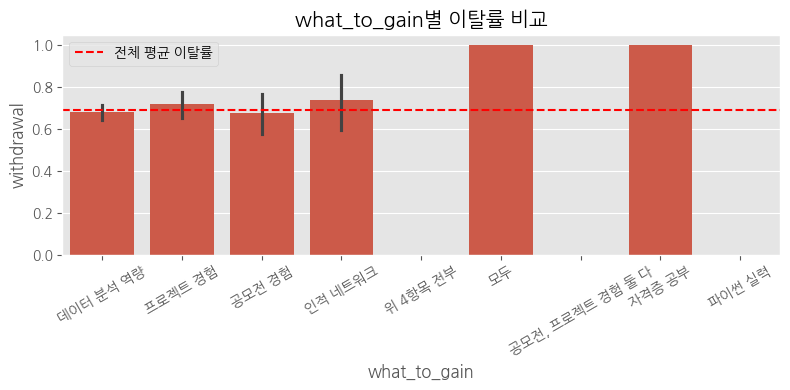

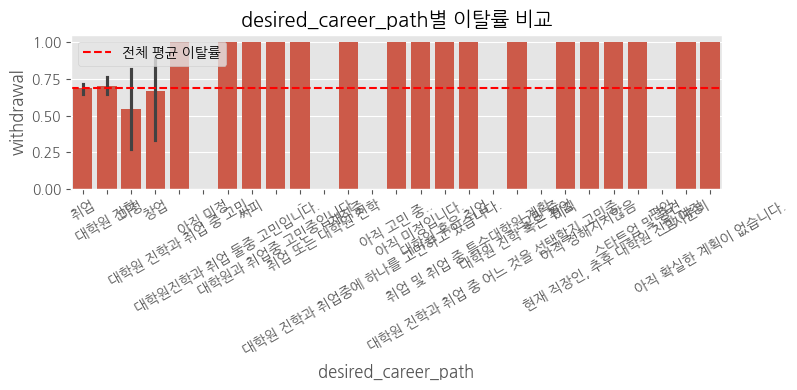

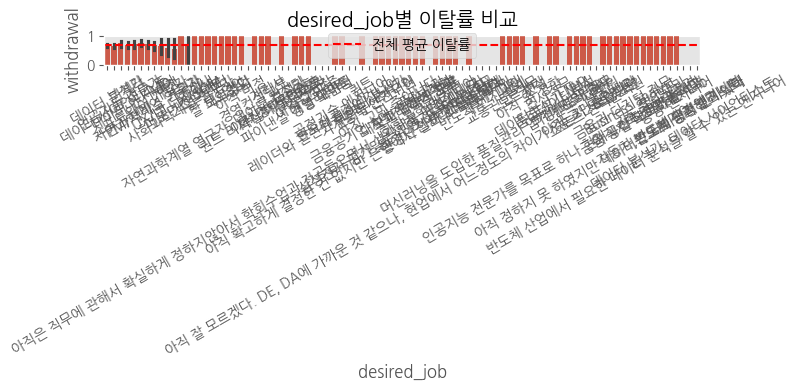

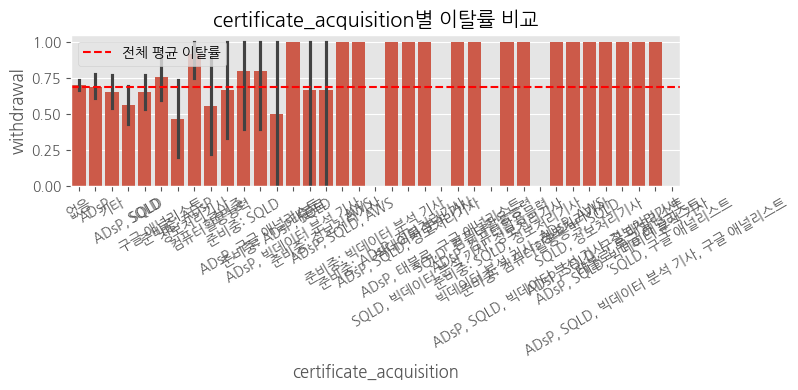

/tmp/ipykernel_5732/460533477.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


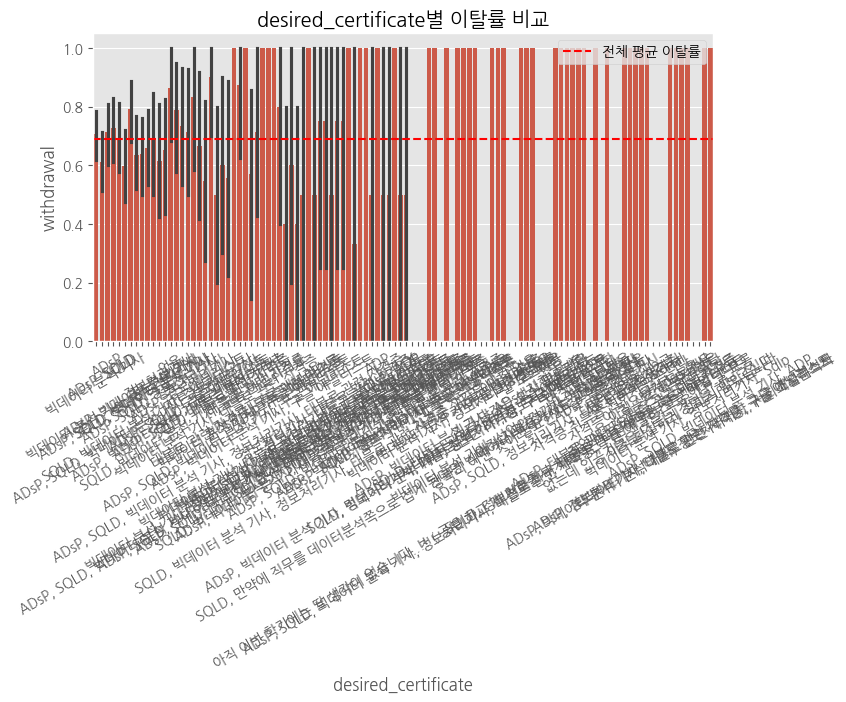

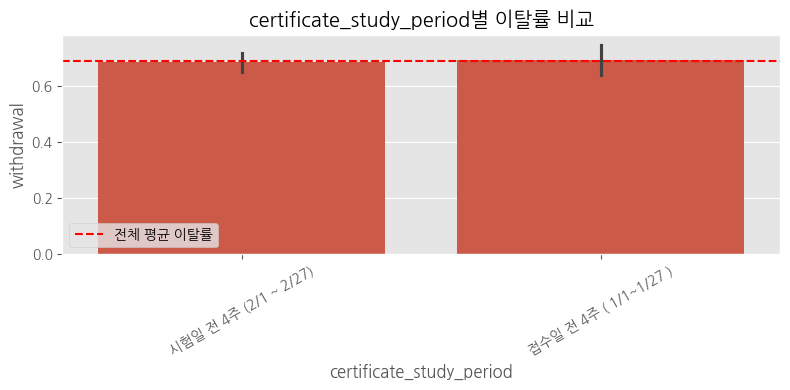

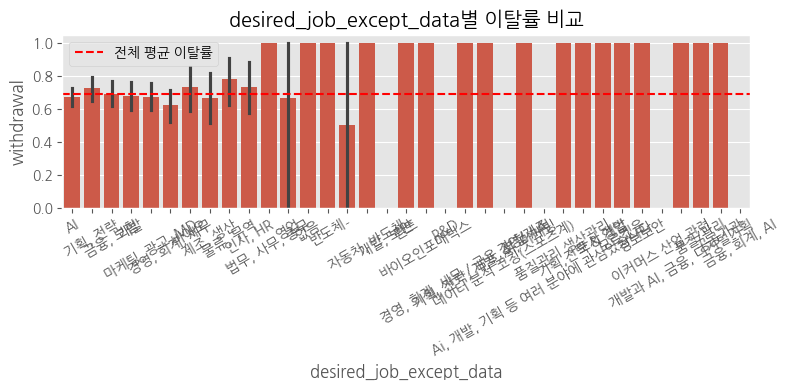

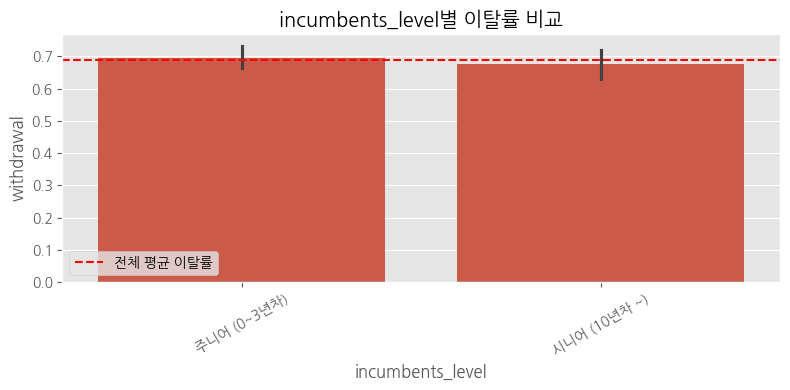

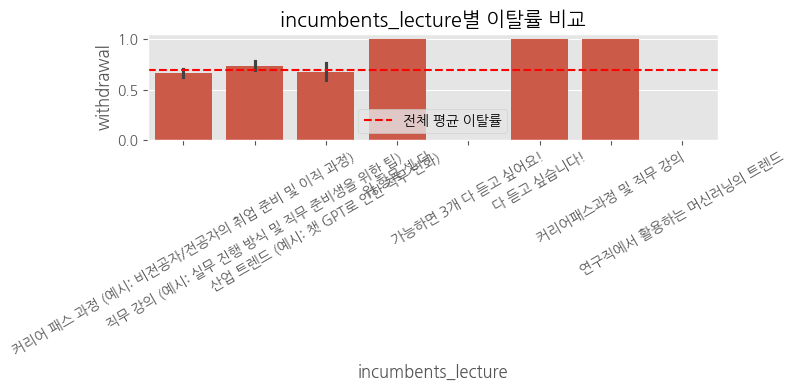

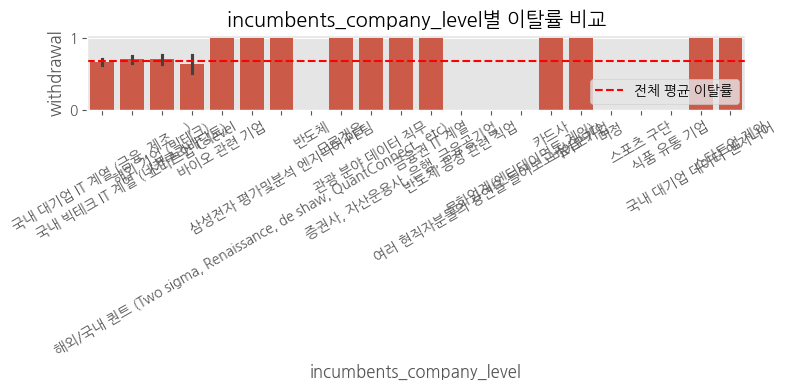

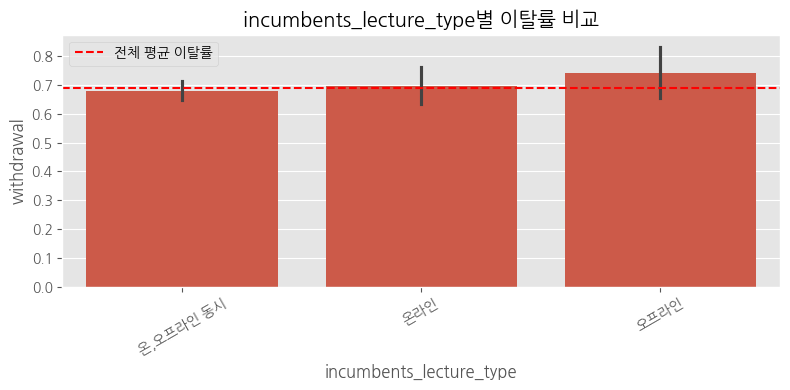

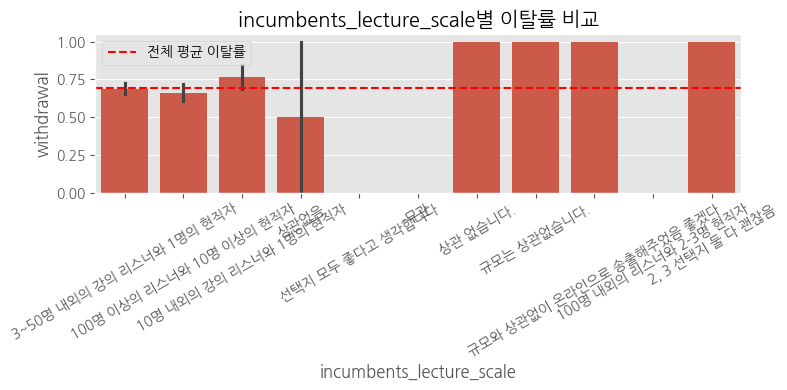

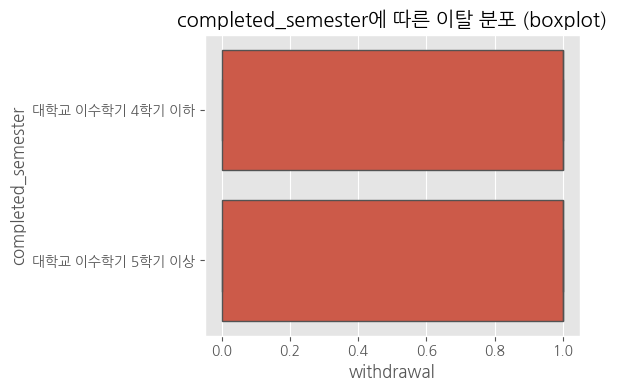

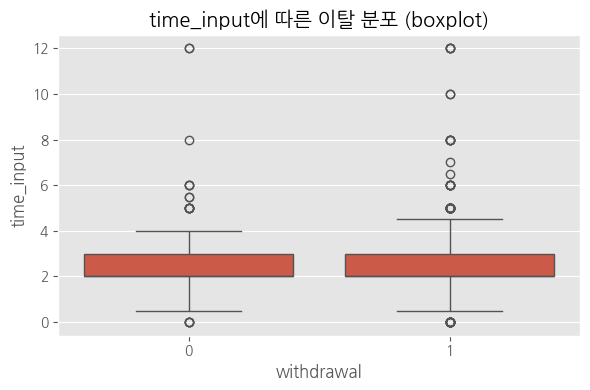

In [34]:
# 시각화용 데이터 (원본과 같은 구조로)
viz_df = train_df.copy()

# 시각화 함수 정의
def plot_bar_with_churn(df, column, figsize=(8, 4), rotate=30):
    plt.figure(figsize=figsize)
    order = df[column].value_counts().index
    sns.barplot(data=df, x=column, y='withdrawal', order=order)
    plt.axhline(df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
    plt.xticks(rotation=rotate)
    plt.title(f"{column}별 이탈률 비교")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 시각화 실행 (텍스트/범주형 위주)
plot_bar_with_churn(viz_df, 'what_to_gain')
plot_bar_with_churn(viz_df, 'desired_career_path')
plot_bar_with_churn(viz_df, 'desired_job')
plot_bar_with_churn(viz_df, 'certificate_acquisition')
plot_bar_with_churn(viz_df, 'desired_certificate')
plot_bar_with_churn(viz_df, 'certificate_study_period')
plot_bar_with_churn(viz_df, 'desired_job_except_data')
plot_bar_with_churn(viz_df, 'incumbents_level')
plot_bar_with_churn(viz_df, 'incumbents_lecture')
plot_bar_with_churn(viz_df, 'incumbents_company_level')
plot_bar_with_churn(viz_df, 'incumbents_lecture_type')
plot_bar_with_churn(viz_df, 'incumbents_lecture_scale')

# 수치형 변수 이탈률 boxplot 시각화
def plot_box_with_churn(df, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='withdrawal', y=column)
    plt.title(f"{column}에 따른 이탈 분포 (boxplot)")
    plt.tight_layout()
    plt.show()

plot_box_with_churn(viz_df, 'completed_semester')
plot_box_with_churn(viz_df, 'time_input')


what_to_gain : BDA에서 얻고싶은 것
desired_career_path : 희망 진로
completed_semester : 대학교 이수학기
time_input 
desired_job 


certificate_acquisition : 취득한 자격증
desired_certificate : 취득을 희망하는 자격증
certificate_study_period : 원하는 자격증 스터디 기간
--> 의미가 있을까?

desired_job_except_data : 데이터 외 희망 직무  의미 있을거같고

incumbents_level : 어느 정도 연차의 현직자를 원하는지
--> 의미?

incumbents_lecture : 어떤 주제의 현직자 강의를 원하는지
--> 수준 볼 수 있어서 의미 있을거 같음 
incumbents_company_level : 강연 현직자가 어느정도 규모의 회사를 다니는 사람이었으면 좋겠는지
--> 의미?

incumbents_lecture_type : 온, 오프라인 중 원하는 현직자 강연 형태
-> 오프라인이 더 이탈자가 적을거 같은 느낌 
incumbents_lecture_scale : 원하는 현직자 강의 규모
-> 작을 수록 이탈자가 더 적을거 같은 느낌

# 감정분석

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="WhitePeak/bert-base-cased-Korean-sentiment")

def analyze_sentiment(text):
    if text.strip() == "":
        return 0
    try:
        result = classifier(text[:512])[0]
        return result['score'] if result['label'] == 'LABEL_1' else -result['score']
    except:
        return 0

train_df['sentiment_score'] = train_df['incumbents_lecture_scale_reason'].fillna("").apply(analyze_sentiment)


Device set to use cpu


In [213]:
train_df['major type']

0                         단일 전공
1       복수 전공 ( 다중전공, 이중전공 포함 )
2                         단일 전공
3                         단일 전공
4       복수 전공 ( 다중전공, 이중전공 포함 )
                 ...           
1047    복수 전공 ( 다중전공, 이중전공 포함 )
1048                      단일 전공
1049    복수 전공 ( 다중전공, 이중전공 포함 )
1050                      단일 전공
1051    복수 전공 ( 다중전공, 이중전공 포함 )
Name: major type, Length: 1052, dtype: object

In [215]:
# 1. major type 결측값 → '고졸'로 대체
train_df['major type'] = train_df['major type'].fillna('고졸')

# 2. major type 값이 '고졸', '단일전공', '복수전공'만 존재하도록 제한 (혹시 이상치 있으면 기타 처리 가능)
valid_major_types = ['고졸', '단일전공', '복수전공']
train_df['major type'] = train_df['major type'].apply(lambda x: x if x in valid_major_types else '기타')

# 3. major type 원핫 인코딩
major_type_ohe = pd.get_dummies(train_df['major type'], prefix='major_type')
train_df = pd.concat([train_df, major_type_ohe], axis=1)

# 4. re_registration을 원핫 인코딩
re_reg_ohe = pd.get_dummies(train_df['re_registration'], prefix='re_registration')
train_df = pd.concat([train_df, re_reg_ohe], axis=1)

# 5. 원본 컬럼 제거 (선택)
train_df.drop(columns=['major type', 're_registration'], inplace=True)


In [211]:
train_df.iloc[464,2] = False

In [37]:
train_df[train_df.sentiment_score > 0].sentiment_score.count()

np.int64(669)

In [214]:
train_df.re_registration.unique()

array(['아니요', '예'], dtype=object)

In [134]:
train_df[train_df.nationality == "외국인"]

ID               major type       major1_1 major1_2  major_data  \
178  TRAIN_0178                    단일 전공            인문학      NaN       False   
362  TRAIN_0362                    단일 전공  IT(컴퓨터 공학 포함)      NaN        True   
694  TRAIN_0694                    단일 전공           자연과학      NaN        True   
855  TRAIN_0855  복수 전공 ( 다중전공, 이중전공 포함 )          경제통상학     자연과학       False   

      job re_registration nationality inflow_route  \
178   대학생             아니요         외국인        에브리타임   
362   대학생             아니요         외국인        에브리타임   
694  대학원생             아니요         외국인        에브리타임   
855   대학생             아니요         외국인        인스타그램   

                                                whyBDA  ...  \
178                                       혼자 공부하기 어려워서  ...   
362                                       혼자 공부하기 어려워서  ...   
694  BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)  ...   
855                                       혼자 공부하기 어려워서  ...   

                          incumbents_lecture   incumbents_company_level  \
178  커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)                해외 기업 (빅테크)   
362             산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)                해외 기업 (빅테크)   
694  커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)  국내 대기업 IT 계열 (금융, 제조 ...)   
855      직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)     국내 빅테크 IT 계열 (네카쿠라배당토)   

    incumbents_lecture_type   incumbents_lecture_scale  \
178                     온라인  3~50명 내외의 강의 리스너와 1명의 현직자   
362               온,오프라인 동시  3~50명 내외의 강의 리스너와 1명의 현직자   
694               온,오프라인 동시  100명 이상의 리스너와 10명 이상의 현직자   
855               온,오프라인 동시    10명 내외의 강의 리스너와 1명의 현직자   

                       incumbents_lecture_scale_reason  \
178                                      진행이 잘 될 것 같아서   
362                 인원이 너무 적으면 부담스럽고 많으면 집중이 안 될거 같아서요   
694  리스너 인원은 장소만 잘 제공되면 되는 것 같고 다양한 분야의 현직자를 만나고 정보...   
855                                  인원이 적어야 집중할 수 있어서   

           interested_company  expected_domain onedayclass_topic withdrawal  \
178                        구글             비즈니스         아직 모르겠습니다          1   
362  데이터 사이언티스트/분석가, 인공지능 연구자          의료/헬스케어             통계 이론          1   
694   신용평가사, 카드사, sk하이닉스, 네이버               금융               C언어          1   
855                 구글, 골드만삭스               금융        금융관련 데이터분석          1   

    sentiment_score  
178        0.971208  
362       -0.986533  
694        0.926829  
855       -0.701395  

[4 rows x 33 columns]

In [ ]:
train_df.select_dtypes(include="object")[:6].head(3)

In [185]:
import pandas as pd

In [186]:
df = pd.read_csv("train_ms2.csv")

In [190]:
pd.get_dummies(df['re_registration'], prefix=prefix)
df.drop(columns={"re_registration"})

0       아니요
1       아니요
2       아니요
3       아니요
4       아니요
       ... 
1047    아니요
1048      예
1049    아니요
1050    아니요
1051    아니요
Name: re_registration, Length: 1052, dtype: object

In [199]:
df

major type  major_data re_registration  withdrawal  \
0                       단일 전공       False             아니요           1   
1     복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요           1   
2                       단일 전공        True             아니요           1   
3                       단일 전공        True             아니요           0   
4     복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요           1   
...                       ...         ...             ...         ...   
1047  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요           1   
1048                    단일 전공        True               예           1   
1049  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요           0   
1050                    단일 전공       False             아니요           1   
1051  복수 전공 ( 다중전공, 이중전공 포함 )       False             아니요           1   

      is_double_major  major_field_IT (컴퓨터 공학 포함)  \
0                   0                       False   
1                   1                        True   
2                   0                        True   
3                   0                       False   
4                   1                       False   
...               ...                         ...   
1047                1                       False   
1048                0                        True   
1049                1                       False   
1050                0                       False   
1051                1                       False   

      major_field_IT (컴퓨터 공학 포함), 경영학  major_field_IT (컴퓨터 공학 포함), 경제통상학  \
0                               False                              False   
1                               False                              False   
2                               False                              False   
3                               False                              False   
4                               False                              False   
...                               ...                                ...   
1047                            False                               True   
1048                            False                              False   
1049                            False                              False   
1050                            False                              False   
1051                            False                              False   

      major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
1047                                       False   
1048                                       False   
1049                                       False   
1050                                       False   
1051                                       False   

      major_field_IT (컴퓨터 공학 포함), 사회과학  ...  job_기타  job_데이터/AI  job_마케팅/기획  \
0                                False  ...   False        True       False   
1                                False  ...    True       False       False   
2                                False  ...   False        True       False   
3                                False  ...   False        True       False   
4                                False  ...   False        True       False   
...                                ...  ...     ...         ...         ...   
1047                             False  ...   False        True       False   
1048                             False  ...   False        True       False   
1049                             False  ...   False        True       False   
1050                             False  ...   False        True       False   
1051                             False  ...   False       False        True   

      job_미정  job_

In [204]:
df.isnull().sum().to_list()

[7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [200]:
df['major type'].value_counts()

major type
단일 전공                      580
복수 전공 ( 다중전공, 이중전공 포함 )    465
Name: count, dtype: int64

In [198]:
df.drop(columns={"ID"},inplace=True)

In [ ]:
desired_career_path
major1_1,2
major_field
time_input
incumbents_lecture
incumbents_lecture_type
job 

In [21]:
col = train.whyBDA.unique()
col

array(['BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)',
       '혼자 공부하기 어려워서', '현직자의 강의를 듣고 싶어서', '학회 가입 시 코딩 테스트, 면접 등을 보지 않아서',
       '시간적으로 부담이 없어서', '이전 기수에 매우 만족해서',
       '큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서'], dtype=object)

In [222]:
train_df.drop(columns={"incumbents_lecture_cleaned"},inplace=True)

In [221]:
train_df.columns

Index(['major_data', 'withdrawal', 'is_double_major',
       'major_field_IT (컴퓨터 공학 포함)', 'major_field_IT (컴퓨터 공학 포함), 경영학',
       'major_field_IT (컴퓨터 공학 포함), 경제통상학',
       'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
       'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
       'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
       'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
       'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
       'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
       'major_field_기타', 'major_field_사회과학', 'major_field_사회과학, 인문학',
       'major_field_인문학', 'major_field_자연과학', 'major_field_자연과학, 사회과학',
       'job_대학생', 'job_대학원생', 'job_직장인', 'job_취준생', 'sentiment_score',
       'except_job_개발/AI/R&D', 'except_job_경영/회계', 'except_job_공공기관',
       'except_job_금융', 'except_job_기타', 'except_job_기획/전략', 'except_job_마케팅',
       'except_job_물류/무역', 'except_job_바이오', 'except_job_없음', 'ex

In [224]:
train_df.select_dtypes(include="object")


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1052 rows x 0 columns]

In [225]:
train_df.to_csv('train_ms_.csv', index=False, encoding='utf-8-sig')

In [ ]:
def classify_topic(text):
    if pd.isna(text):
        return "기타"
    if any(kw in text for kw in ['기초', '입문', '초보', '처음',"모른다"]):
        return "기초"
    elif any(kw in text for kw in ['현직자', '취업', '포트폴리오', '회사']):
        return "직무"
    elif any(kw in text for kw in ['모델링', 'SQL', '알고리즘', '데이터']):
        return "기술"
    elif any(kw in text for kw in ['응용', '심화', '실전', '프로젝트']):
        return "고급"
    else:
        return "기타"

train_test=train_df.copy()
train_test['topic_group'] = train_test['onedayclass_topic'].apply(classify_topic)


In [113]:
pd.crosstab(train_test['topic_group'], train_test['withdrawal'], normalize='index')


withdrawal          0         1
topic_group                    
고급           0.386364  0.613636
기술           0.330709  0.669291
기초           0.336898  0.663102
기타           0.291545  0.708455
직무           0.333333  0.666667

In [ ]:
from xgboost import XGBClassifier, plot_importance
model = XGBClassifier()
model.fit(X_train, y_train)
plot_importance(model)

In [12]:
pip install pytorch-tabnet

Note: you may need to restart the kernel to use updated packages.


In [ ]:
train.

In [13]:
!pip install pytorch-tabnet
!pip install autogluon.tabular
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [autogluon.tabular]autogluon.tabular]


In [17]:
# deep_tabular_models.ipynb

# ✅ 딥러닝 기반 Tabular 모델 4종 비교 (train.csv 기준)
# - TabNet
# - FT-Transformer (AutoGluon)
# - NODE
# - DNN (with embedding)

# ⚠️ 설치 라이브러리
# !pip install pytorch-tabnet
# !pip install autogluon.tabular
# !pip install category_encoders

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score

# 1. 데이터 로드
train_df = pd.read_csv("train.csv")
target_col = "withdrawal"

# ------------------------------
# 2. 데이터 전처리
# ------------------------------

# 수치형 / 범주형 분리
num_cols = train_df.select_dtypes(include=[np.number, bool]).columns.tolist()
cat_cols = train_df.select_dtypes(include=["object", "category"]).columns.tolist()

num_cols.remove(target_col) if target_col in num_cols else None

X = train_df.drop(columns=[target_col])
y = train_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# ------------------------------
# 4. FT-Transformer (AutoGluon)
# ------------------------------

from autogluon.tabular import TabularPredictor

ag_train = X_train.copy()
ag_train[target_col] = y_train

predictor = TabularPredictor(label=target_col).fit(ag_train, verbosity=0)

ag_preds = predictor.predict(X_test)

print("\n[AutoGluon (FT-Transformer) Results]")
print("Accuracy:", accuracy_score(y_test, ag_preds))
print("F1 Score:", f1_score(y_test, ag_preds))
print("Recall:", recall_score(y_test, ag_preds))

# ------------------------------
# 5. NODE (유사 구조, 트리형 DNN)
# ------------------------------

# 대체 구조로 LightGBM + NeuralNet hybrid 가능 (옵션)
# 실제 NODE 구현은 러시아 Yandex 오픈소스 참조 필요



No path specified. Models will be saved in: "AutogluonModels/ag-20250710_080214"
		`import lightgbm` failed. A quick tip is to install via `pip install autogluon.tabular[lightgbm]==1.3.1`.
		`import lightgbm` failed. A quick tip is to install via `pip install autogluon.tabular[lightgbm]==1.3.1`.
		`import catboost` failed. A quick tip is to install via `pip install autogluon.tabular[catboost]==1.3.1`.
		Import fastai failed. A quick tip is to install via `pip install autogluon.tabular[fastai]==1.3.1`. 
		`import lightgbm` failed. A quick tip is to install via `pip install autogluon.tabular[lightgbm]==1.3.1`.



[AutoGluon (FT-Transformer) Results]
Accuracy: 0.6933962264150944
F1 Score: 0.8071216617210683
Recall: 0.9251700680272109
